# Stock Price Prediction - from Daily to Hour

We will apply your skills in data analytics and machine learning to predict the future price of three publicly traded companies' stocks.

Because I familiar with the A-share, the target stocks are 贵州茅台 (600519), 獐子岛(002069), and 沪深300 (000300).

I will collect historical stock data, preprocess and clean the data, explore the data using data visualization tools, build a predictive model using machine learning algorithms, and evaluate the model's performance. 

I will then use your model to predict the future prices of the three stocks and test it with the latest/real-time stock dataset.

**Tasks Example:**

1. Collect historical stock data (or any forms of data, e.g., text social media, that might help prediction) from a public database, such as Tushare, Wind, Alpha Vantage, Yahoo Finance, or Google Finance, for the given companies, which might include daily opening and closing prices, volume, and any other relevant metrics. Preprocess and clean the data to remove any missing values or outliers, if necessary.
2. Explore the data using data visualization tools to identify patterns or trends.
3. Build a predictive model using machine learning algorithms such as linear regression, random forests, or neural networks.
4. Evaluate the performance of the model using metrics such as mean squared error.
5. Test the model on a separate dataset to see how well it generalizes to new data.
6. Use your model to predict the future prices of the three stocks and test it with the latest/real-time stock dataset.

Criteria:

Your project will be evaluated based on the following criteria:

Analysis: 1. Data collection and preprocessing: Did you collect and preprocess the data effectively? 2. Data exploration: Did you explore the data using data visualization tools to identify patterns or trends? 3. Predictive model: Did you build an effective predictive model using machine learning algorithms? 4. Model evaluation: Did you evaluate the performance of the model using appropriate metrics? 5. Generalization: Did you test the model on a separate dataset to see how well it generalizes to new data? 6. Stock price prediction: Did you use your model to predict the future prices of the three stocks and test it with the latest/real-time stock dataset?

Performance:  The performance (evaluated by MSE for every hour, i.e., 9am, 10am, 11am, etc.) tested on 13 Nov will be taken as one of the indicators.

After completing the project, you will submit your Jupyter notebook containing your code, analysis, and predictions. Your code should be sufficiently detailed and well-documented so that someone else can follow and run it on their computer. You should include methods in your code that can fetch the latest/real-time stock dataset so that your model can be tested with up-to-date data. Good luck!


## 1. Collect Historical <font color='red'>Daily</font> Stock Data to <font color='red'>Get START TIME POINT</font> 

**Target: By analyzing stock data at a longer time frequency, identifying a specific point in time is obtained, where the subsequent stock price trends for three stocks exhibit relatively stable characteristics.**

Collect historical daily stock data from a public database - Tushare, for the THREE companies 贵州茅台 (600519), 獐子岛(002069), and 沪深300 (000300), which include daily opening and closing prices, volume, low and high proces.

In [1]:
import tushare as ts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rcParams
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
from matplotlib.font_manager import *
from pyecharts.charts import Map,Line
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

### 1.1  Import Daily Stock Information for Maotai and Zhangzidao Using Tushare

In [2]:
ts.set_token('f49d439aabb26b41db333fb9d06912bf73cd4fcf855117673d6c2687')# JIANG Zhuoyang's token
pro = ts.pro_api()
#stocks = pro.query('stock_basic', exchange='', list_status='L', fields='ts_code,symbol,name,area,industry,list_date')

In [3]:
import time as t

# Importing Kweichow Moutai (茅台) stock data from 2007-11-09 to 2023-11-09
output_file = '.\\Daily\\MT_600519_20071109-20231109.xlsx'
if not os.path.exists(output_file):
    daily_df_600519_origin = pro.query('daily', ts_code='600519.SH', start_date='20071109', end_date='20231109')
    daily_df_600519_origin.to_excel(output_file, index=False)
    t.sleep(60)
else:
    input_file = '.\\Daily\\MT_600519_20071109-20231109.xlsx'
    daily_df_600519_origin = pd.read_excel(input_file)
print("Kweichow Moutai stock data from 2007-11-09 to 2023-11-09 imported")

# Importing Zhangzidao (獐子岛) stock data from 2007-11-09 to 2023-11-09
output_file = '.\\Daily\\ZZD_002069_20071109-20231109.xlsx'
if not os.path.exists(output_file):
    daily_df_002069_origin = pro.query('daily', ts_code='002069.SZ', start_date='20071109', end_date='20231109')
    daily_df_002069_origin.to_excel(output_file, index=False)
else:
    input_file = '.\\Daily\\ZZD_002069_20071109-20231109.xlsx'
    daily_df_002069_origin = pd.read_excel(input_file)
print("Zhangzidao stock data from 2007-11-09 to 2023-11-09 imported")


Kweichow Moutai stock data from 2007-11-09 to 2023-11-09 imported
Zhangzidao stock data from 2007-11-09 to 2023-11-09 imported


### 1.2 Import Daily Stock Information for Shanghai and Shenzhen 300 Index Using JoinQuant

Please use Jupyter Environmwnt in **joinquant** to run the code below（https://www.joinquant.com/research）

```python
import pandas as pd
daily_df_000300 = get_price('000300.XSHG', start_date='2018-11-09', frequency='30m', fields=['open', 'close', 'high', 'low', 'volume', 'money', 'open_interest'], skip_paused=False, fq='none')
output_file = 'HS_000300_20181109-20231109.xlsx'
daily_df_000300.to_excel(output_file)
```

Then download the HS_000300_20071109-20231109.xlsx to our own jupyter environment¶

In [4]:
# Importing Shanghai and Shenzhen 300 Index (沪深300) stock data from 2007-11-09 to 2023-11-09
output_file = '.\\Daily\\HS_000300_20071109-20231109.xlsx'
if not os.path.exists(output_file):
    print("Please use Jupyter Environment in JoinQuant to run the code below (https://www.joinquant.com/research)")
    # daily_df_000300_origin = get_price('000300.XSHG', start_date='2007-11-09', end_date='2023-11-09', frequency='daily', fields=['open', 'close', 'low', 'high', 'volume', 'money', 'factor', 'high_limit','low_limit', 'avg', 'pre_close', 'paused','open_interest'], skip_paused=False, fq='none')
    # daily_df_000300_origin.to_excel(output_file, index=False)
else:
    input_file = '.\\Daily\\HS_000300_20071109-20231109.xlsx'
    daily_df_000300_origin = pd.read_excel(input_file)
print("Shanghai and Shenzhen 300 Index stock data from 2007-11-09 to 2023-11-09 imported")

Shanghai and Shenzhen 300 Index stock data from 2007-11-09 to 2023-11-09 imported


### 1.3 Daily Data Processing

In [5]:
# Copying original dataframes for further processing
daily_df_600519 = daily_df_600519_origin.copy()
daily_df_002069 = daily_df_002069_origin.copy()
daily_df_000300 = daily_df_000300_origin.copy()

# Handling column names from the Tushare data table:
# Removing 'ts_code' column
daily_df_600519.drop(columns=['ts_code'], inplace=True)
daily_df_002069.drop(columns=['ts_code'], inplace=True)

# Sorting in ascending order by date
daily_df_600519 = daily_df_600519[::-1].reset_index(drop=True)
daily_df_002069 = daily_df_002069[::-1].reset_index(drop=True)

# Handling column names from the JoinQuant data table:
# Renaming columns
daily_df_000300.rename(columns={'Unnamed: 0': 'trade_date', 'money': 'amount', 'volume': 'vol'}, inplace=True)

# Dropping inconsistent columns
columns_to_drop = ['factor', 'high_limit', 'low_limit', 'avg', 'paused', 'open_interest']
daily_df_000300.drop(columns=columns_to_drop, inplace=True)

# Generating 'change' column
daily_df_000300['change'] = daily_df_000300['pre_close'] - daily_df_000300['close']

# Generating 'pct_chg' column
daily_df_000300['pct_chg'] = (daily_df_000300['change'] / daily_df_000300['pre_close']) * 100

# Reordering columns
new_order = ['trade_date', 'open', 'high', 'low', 'close', 'pre_close', 'change', 'pct_chg', 'vol', 'amount']
daily_df_000300 = daily_df_000300[new_order]

# Removing missing values
daily_df_600519.dropna(inplace=True)
daily_df_002069.dropna(inplace=True)
daily_df_000300.dropna(inplace=True)

# Data transformation, for example, converting the 'trade_date' column to datetime format
daily_df_600519['trade_date'] = pd.to_datetime(daily_df_600519['trade_date'], format='%Y%m%d')
daily_df_002069['trade_date'] = pd.to_datetime(daily_df_002069['trade_date'], format='%Y%m%d')
daily_df_000300['trade_date'] = pd.to_datetime(daily_df_000300['trade_date'], format='%Y%m%d')

### 1.4 Trends:

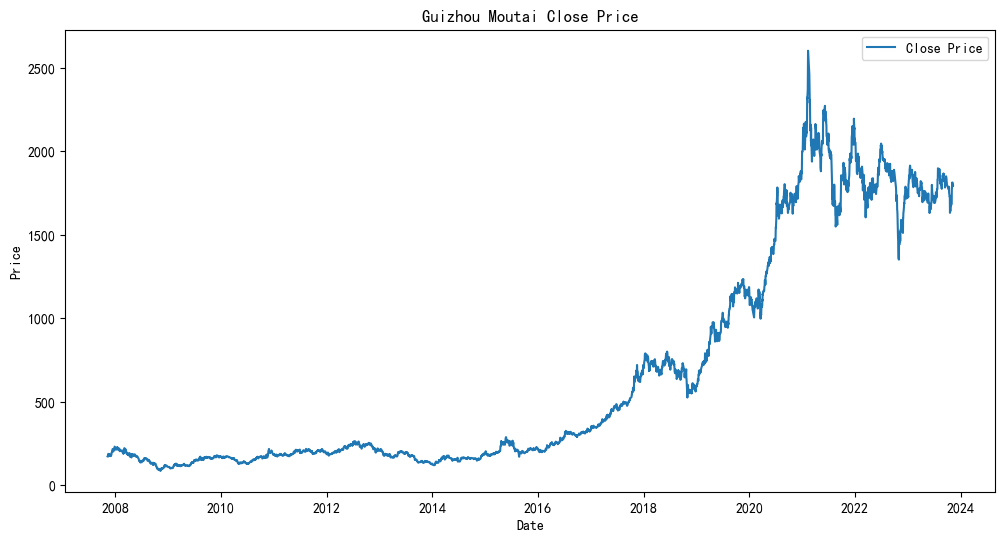

In [6]:
# Plotting Kweichow Moutai stock price trend
plt.figure(figsize=(12, 6))
plt.plot(daily_df_600519['trade_date'], daily_df_600519['close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Guizhou Moutai Close Price')
plt.legend()
plt.show()

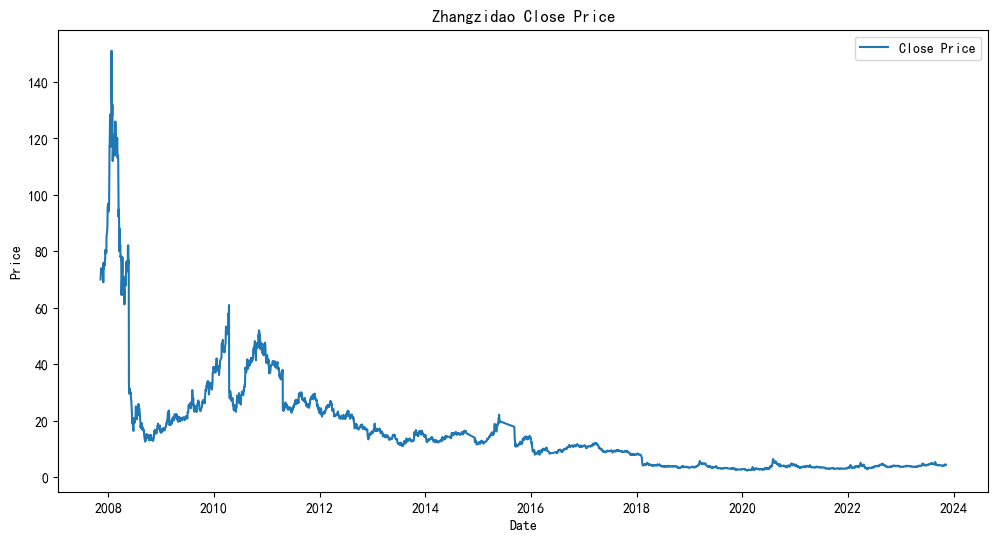

In [7]:
# Plotting Zhangzidao stock price trend
plt.figure(figsize=(12, 6))
plt.plot(daily_df_002069['trade_date'], daily_df_002069['close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Zhangzidao Close Price')
plt.legend()
plt.show()

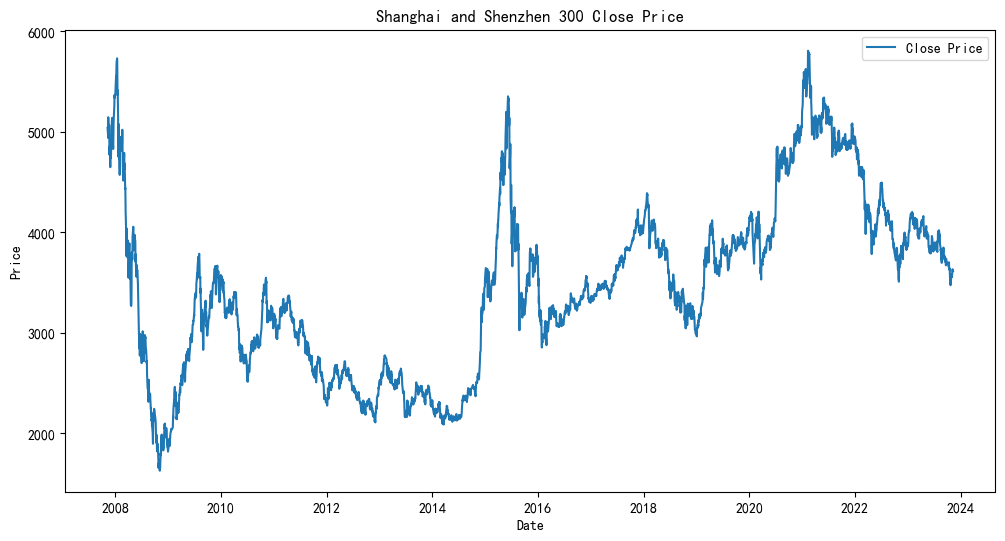

In [8]:
# Plotting Shanghai and Shenzhen 300 Index stock price trend
plt.figure(figsize=(12, 6))
plt.plot(daily_df_000300['trade_date'], daily_df_000300['close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Shanghai and Shenzhen 300 Close Price')
plt.legend()
plt.show()

 <span style="font-size: 20px; color: blue;">**Overall, it can be observed that the general trend of stock prices after 2018 is relatively consistent. Therefore, we choose data from after 2018 and construct the training set with an hourly frequency.**</span>

## 2. Collect Historical <font color='red'>Hourly</font> Stock Data to <font color='red'>Do Prediction</font> 
Collect historical Hourly stock data from a public database - Tushare, for the THREE companies 贵州茅台 (600519), 獐子岛(002069), and 沪深300 (000300), which include daily opening and closing prices, volume, low and high proces.

Please use Jupyter Environmwnt in **joinquant** to run the code below（https://www.joinquant.com/research）

```python
import pandas as pd
hourly_df_600519 = get_price('600519.XSHG', start_date='2018-01-01', end_date='2023-11-10', frequency='30m', fields=['open', 'close', 'high', 'low', 'volume', 'money', 'open_interest'], skip_paused=False, fq='none')
output_file_600519 = 'MT_600519_20180101-20231110.xlsx'
hourly_df_600519.to_excel(output_file_600519)

hourly_df_002069 = get_price('002069.XSHE', start_date='2018-01-01', end_date='2023-11-10', frequency='30m', fields=['open', 'close', 'high', 'low', 'volume', 'money', 'open_interest'], skip_paused=False, fq='none')
output_file_002069 = 'ZZD_002069_20180101-20231110.xlsx'
hourly_df_002069.to_excel(output_file_002069)

hourly_df_000300 = get_price('000300.XSHG', start_date='2018-01-01', end_date='2023-11-10', frequency='30m', fields=['open', 'close', 'high', 'low', 'volume', 'money', 'open_interest'], skip_paused=False, fq='none')
output_file_000300 = 'HS_000300_20180101-20231110.xlsx'
hourly_df_000300.to_excel(output_file_000300)
```

Then download the HS_000300_20071109-20231109.xlsx to our own jupyter environment

In [9]:
# Importing Shanghai and Shenzhen 300 Index (沪深300) stock data from 2007-11-09 to 2023-11-12
if not os.path.exists(output_file):
    print("Please use Jupyter Environment in JoinQuant to run the code below (https://www.joinquant.com/research)")
    # import pandas as pd
    # hourly_df_600519 = get_price('600519.XSHG', start_date='2018-01-01', end_date='2023-11-12', frequency='30m', fields=['open', 'close', 'high', 'low', 'volume', 'money', 'open_interest'], skip_paused=False, fq='none')
    # output_file_600519 = 'MT_600519_20180101-20231110.xlsx'
    # hourly_df_600519.to_excel(output_file_600519)

    # hourly_df_002069 = get_price('002069.XSHE', start_date='2018-01-01', end_date='2023-11-12', frequency='30m', fields=['open', 'close', 'high', 'low', 'volume', 'money', 'open_interest'], skip_paused=False, fq='none')
    # output_file_002069 = 'ZZD_002069_20180101-20231110.xlsx'
    # hourly_df_002069.to_excel(output_file_002069)

    # hourly_df_000300 = get_price('000300.XSHG', start_date='2018-01-01', end_date='2023-11-12', frequency='30m', fields=['open', 'close', 'high', 'low', 'volume', 'money', 'open_interest'], skip_paused=False, fq='none')
    # output_file_000300 = 'HS_000300_20180101-20231110.xlsx'
    # hourly_df_000300.to_excel(output_file_000300)
else:
    # Importing Kweichow Moutai (茅台) stock data from 2018-01-01 to 2023-11-10
    input_file_600519 = '.\\Hourly\\MT_600519_20180101-20231112.xlsx'
    hourly_df_600519_origin = pd.read_excel(input_file_600519)
    # Importing Zhangzidao (獐子岛) stock data from 2018-01-01 to 2023-11-10
    input_file_002069 = '.\\Hourly\\ZZD_002069_20180101-20231112.xlsx'
    hourly_df_002069_origin = pd.read_excel(input_file_002069)
    # Importing Shanghai and Shenzhen 300 Index (沪深300) stock data from 2018-01-01 to 2023-11-10    
    input_file_000300 = '.\\Hourly\\HS_000300_20180101-20231112.xlsx'
    hourly_df_000300_origin = pd.read_excel(input_file_000300)
print("Kweichow Moutai Index stock data from 2018-01-01 to 2023-11-12 imported")
print("Zhangzidao stock data from 2018-01-01 to 2023-11-12 imported")
print("Shanghai and Shenzhen 300 Index stock data from 2018-01-01 to 2023-11-12 imported")

Kweichow Moutai Index stock data from 2018-01-01 to 2023-11-12 imported
Zhangzidao stock data from 2018-01-01 to 2023-11-12 imported
Shanghai and Shenzhen 300 Index stock data from 2018-01-01 to 2023-11-12 imported


In [10]:
hourly_df_600519_origin  # Output original Kweichow Moutai stock data

Unnamed: 0     open    close     high      low   volume  \
0     2018-01-02 10:00:00   700.00   700.00   710.16   699.88  1667591   
1     2018-01-02 10:30:00   699.87   697.91   699.88   689.89   881756   
2     2018-01-02 11:00:00   698.00   698.90   703.58   697.90   551489   
3     2018-01-02 11:30:00   699.00   699.60   700.00   697.50   260825   
4     2018-01-02 13:30:00   699.80   702.10   703.00   696.88   347286   
...                   ...      ...      ...      ...      ...      ...   
11371 2023-11-10 11:30:00  1782.62  1779.98  1784.01  1778.66   103700   
11372 2023-11-10 13:30:00  1779.00  1776.53  1781.89  1776.18   135130   
11373 2023-11-10 14:00:00  1776.53  1777.99  1781.38  1775.00   137414   
11374 2023-11-10 14:30:00  1777.58  1781.50  1781.50  1775.00   155261   
11375 2023-11-10 15:00:00  1780.63  1775.84  1780.63  1773.10   395300   

            money  open_interest  
0      1175573586            NaN  
1       613204295            NaN  
2       386340445            NaN  
3       182380043            NaN  
4       242646132            NaN  
...           ...            ...  
11371   184747026            NaN  
11372   240345377            NaN  
11373   244175365            NaN  
11374   276001351            NaN  
11375   701751317            NaN  

[11376 rows x 8 columns]

In [11]:
hourly_df_002069_origin  # Output original Zhangzidao stock data

Unnamed: 0  open  close  high   low   volume    money  \
0     2018-01-02 10:00:00  7.97   7.96  7.99  7.94   420252  3346917   
1     2018-01-02 10:30:00  7.97   8.03  8.09  7.96   597800  4800681   
2     2018-01-02 11:00:00  8.04   8.03  8.05  8.02   150000  1205585   
3     2018-01-02 11:30:00  8.04   8.01  8.04  8.01    92400   741386   
4     2018-01-02 13:30:00  8.02   8.03  8.03  8.01   139201  1117053   
...                   ...   ...    ...   ...   ...      ...      ...   
11371 2023-11-10 11:30:00  4.38   4.36  4.39  4.35   629300  2748040   
11372 2023-11-10 13:30:00  4.36   4.35  4.37  4.35   840301  3663721   
11373 2023-11-10 14:00:00  4.35   4.36  4.38  4.35   751000  3275050   
11374 2023-11-10 14:30:00  4.35   4.36  4.37  4.34  1190000  5178012   
11375 2023-11-10 15:00:00  4.35   4.34  4.36  4.34   963959  4189413   

       open_interest  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  
...              ...  
11371            NaN  
11372            NaN  
11373            NaN  
11374            NaN  
11375            NaN  

[11376 rows x 8 columns]

In [12]:
hourly_df_000300_origin  # Output original Shanghai and Shenzhen 300 Index stock data

Unnamed: 0     open    close     high      low      volume  \
0     2018-01-02 10:00:00  4045.21  4071.32  4075.29  4045.21  3545644000   
1     2018-01-02 10:30:00  4071.26  4076.86  4077.28  4058.58  2239624000   
2     2018-01-02 11:00:00  4076.69  4077.60  4082.69  4072.71  1651667200   
3     2018-01-02 11:30:00  4077.44  4080.23  4084.43  4074.78  1537234400   
4     2018-01-02 13:30:00  4080.42  4084.31  4084.68  4078.28  1446279200   
...                   ...      ...      ...      ...      ...         ...   
11371 2023-11-10 11:30:00  3584.06  3587.88  3589.89  3583.94   760231900   
11372 2023-11-10 13:30:00  3587.88  3582.83  3590.48  3582.00   946405100   
11373 2023-11-10 14:00:00  3582.19  3586.29  3588.00  3579.44   776960700   
11374 2023-11-10 14:30:00  3586.59  3591.99  3591.99  3583.01   804223200   
11375 2023-11-10 15:00:00  3592.14  3586.49  3592.62  3585.60  1286363000   

             money  open_interest  
0      42689531904            NaN  
1      27702784000            NaN  
2      19907026944            NaN  
3      17163051008            NaN  
4      16736313344            NaN  
...            ...            ...  
11371  12299527900            NaN  
11372  16231652100            NaN  
11373  12858368200            NaN  
11374  13220256500            NaN  
11375  20840397600            NaN  

[11376 rows x 8 columns]

## 3. Preprocess and clean the data


In [13]:
# Copying original dataframes for further processing
hourly_df_600519 = hourly_df_600519_origin.copy()
hourly_df_002069 = hourly_df_002069_origin.copy()
hourly_df_000300 = hourly_df_000300_origin.copy()

### 3.1 Standardize and Rename Column Names

In [14]:
def standardize(hourly_df):
    # Renaming columns
    hourly_df.rename(columns={'Unnamed: 0': 'trade_date', 'money': 'amount', 'volume': 'vol'}, inplace=True)

    # Dropping inconsistent columns
    columns_to_drop = ['open_interest']
    hourly_df.drop(columns=columns_to_drop, inplace=True)

    # Generating 'pre_close' and 'change' column
    hourly_df['pre_close'] = hourly_df['close'].shift(1)
    hourly_df['change'] = hourly_df['pre_close'] - hourly_df['close']

    # Generating 'pct_chg' column
    hourly_df['pct_chg'] = (hourly_df['change'] / hourly_df['pre_close']) * 100

    # Reordering columns
    new_order = ['trade_date', 'open', 'high', 'low', 'close', 'pre_close', 'change', 'pct_chg', 'vol', 'amount']
    hourly_df = hourly_df[new_order]
    
    return hourly_df

In [15]:
# Standardize Column
hourly_df_600519 = standardize(hourly_df_600519)
hourly_df_002069 = standardize(hourly_df_002069)
hourly_df_000300 = standardize(hourly_df_000300)

### 3.2 Handling Missing Values and Standardizing Data Formats

In [16]:
# Removing missing values
hourly_df_600519.dropna(inplace=True)
hourly_df_002069.dropna(inplace=True)
hourly_df_000300.dropna(inplace=True)

# Data transformation, for example, converting the 'trade_date' column to datetime format
hourly_df_600519['trade_date'] = pd.to_datetime(hourly_df_600519['trade_date'], format='%Y%m%d')
hourly_df_002069['trade_date'] = pd.to_datetime(hourly_df_002069['trade_date'], format='%Y%m%d')
hourly_df_000300['trade_date'] = pd.to_datetime(hourly_df_000300['trade_date'], format='%Y%m%d')

In [17]:
hourly_df_600519.head(24) # Output Kweichow Moutai processed data

trade_date    open    high     low   close  pre_close  change  \
1  2018-01-02 10:30:00  699.87  699.88  689.89  697.91     700.00    2.09   
2  2018-01-02 11:00:00  698.00  703.58  697.90  698.90     697.91   -0.99   
3  2018-01-02 11:30:00  699.00  700.00  697.50  699.60     698.90   -0.70   
4  2018-01-02 13:30:00  699.80  703.00  696.88  702.10     699.60   -2.50   
5  2018-01-02 14:00:00  702.90  703.60  699.04  703.15     702.10   -1.05   
6  2018-01-02 14:30:00  703.55  706.79  703.01  706.15     703.15   -3.00   
7  2018-01-02 15:00:00  706.00  706.28  703.00  703.85     706.15    2.30   
8  2018-01-03 10:00:00  701.50  706.30  699.74  703.85     703.85    0.00   
9  2018-01-03 10:30:00  703.87  715.00  703.87  710.88     703.85   -7.03   
10 2018-01-03 11:00:00  710.88  717.50  710.11  717.23     710.88   -6.35   
11 2018-01-03 11:30:00  717.23  717.40  714.00  716.88     717.23    0.35   
12 2018-01-03 13:30:00  716.99  719.16  714.30  718.60     716.88   -1.72   
13 2018-01-03 14:00:00  718.50  721.40  715.01  716.00     718.60    2.60   
14 2018-01-03 14:30:00  716.00  719.48  714.15  717.50     716.00   -1.50   
15 2018-01-03 15:00:00  717.55  718.84  714.80  715.86     717.50    1.64   
16 2018-01-04 10:00:00  721.40  734.95  719.33  730.53     715.86  -14.67   
17 2018-01-04 10:30:00  730.93  738.80  730.22  736.50     730.53   -5.97   
18 2018-01-04 11:00:00  736.50  738.80  732.23  737.50     736.50   -1.00   
19 2018-01-04 11:30:00  737.80  740.89  737.50  739.01     737.50   -1.51   
20 2018-01-04 13:30:00  740.00  740.00  736.70  739.00     739.01    0.01   
21 2018-01-04 14:00:00  739.10  743.50  738.16  738.45     739.00    0.55   
22 2018-01-04 14:30:00  738.08  740.00  736.50  737.01     738.45    1.44   
23 2018-01-04 15:00:00  737.12  739.40  735.10  737.07     737.01   -0.06   
24 2018-01-05 10:00:00  741.00  746.03  736.22  743.00     737.07   -5.93   

     pct_chg      vol      amount  
1   0.298571   881756   613204295  
2  -0.141852   551489   386340445  
3  -0.100157   260825   182380043  
4  -0.357347   347286   242646132  
5  -0.149551   309706   217502914  
6  -0.426651   406203   286391745  
7   0.325710   536392   378368396  
8   0.000000   661624   465486880  
9  -0.998792   754398   535706547  
10 -0.893259   587917   418894427  
11  0.048799   615120   440455765  
12 -0.239929   574017   411443221  
13  0.361815   871990   626725377  
14 -0.209497   501629   359694412  
15  0.228571   635246   455116974  
16 -2.049283  1932694  1407647190  
17 -0.817215  1306635   961077131  
18 -0.135777   611986   450572245  
19 -0.204746   753444   557074675  
20  0.001353   469240   346622186  
21  0.074425   945688   701263918  
22  0.195003   571015   421364160  
23 -0.008141   629806   464268599  
24 -0.804537  1121839   832575542

In [18]:
hourly_df_002069.head(24)  # Output Zhangzidao  processed data

trade_date  open  high   low  close  pre_close  change   pct_chg  \
1  2018-01-02 10:30:00  7.97  8.09  7.96   8.03       7.96   -0.07 -0.879397   
2  2018-01-02 11:00:00  8.04  8.05  8.02   8.03       8.03    0.00  0.000000   
3  2018-01-02 11:30:00  8.04  8.04  8.01   8.01       8.03    0.02  0.249066   
4  2018-01-02 13:30:00  8.02  8.03  8.01   8.03       8.01   -0.02 -0.249688   
5  2018-01-02 14:00:00  8.03  8.03  8.02   8.02       8.03    0.01  0.124533   
6  2018-01-02 14:30:00  8.02  8.04  8.01   8.02       8.02    0.00  0.000000   
7  2018-01-02 15:00:00  8.02  8.04  8.02   8.02       8.02    0.00  0.000000   
8  2018-01-03 10:00:00  8.03  8.04  7.99   8.03       8.02   -0.01 -0.124688   
9  2018-01-03 10:30:00  8.03  8.08  8.02   8.07       8.03   -0.04 -0.498132   
10 2018-01-03 11:00:00  8.07  8.09  8.05   8.06       8.07    0.01  0.123916   
11 2018-01-03 11:30:00  8.06  8.08  8.05   8.06       8.06    0.00  0.000000   
12 2018-01-03 13:30:00  8.06  8.08  8.05   8.07       8.06   -0.01 -0.124069   
13 2018-01-03 14:00:00  8.07  8.08  8.03   8.03       8.07    0.04  0.495663   
14 2018-01-03 14:30:00  8.02  8.04  8.00   8.03       8.03    0.00  0.000000   
15 2018-01-03 15:00:00  8.03  8.04  8.02   8.03       8.03    0.00  0.000000   
16 2018-01-04 10:00:00  8.03  8.06  8.01   8.03       8.03    0.00  0.000000   
17 2018-01-04 10:30:00  8.02  8.05  8.02   8.03       8.03    0.00  0.000000   
18 2018-01-04 11:00:00  8.03  8.06  8.03   8.05       8.03   -0.02 -0.249066   
19 2018-01-04 11:30:00  8.05  8.06  8.04   8.05       8.05    0.00  0.000000   
20 2018-01-04 13:30:00  8.05  8.05  8.02   8.02       8.05    0.03  0.372671   
21 2018-01-04 14:00:00  8.02  8.04  8.01   8.03       8.02   -0.01 -0.124688   
22 2018-01-04 14:30:00  8.03  8.03  8.01   8.02       8.03    0.01  0.124533   
23 2018-01-04 15:00:00  8.02  8.04  8.01   8.03       8.02   -0.01 -0.124688   
24 2018-01-05 10:00:00  8.02  8.45  8.01   8.36       8.03   -0.33 -4.109589   

        vol    amount  
1    597800   4800681  
2    150000   1205585  
3     92400    741386  
4    139201   1117053  
5    119300    957324  
6    191799   1538325  
7    283301   2274764  
8    297900   2387048  
9    385100   3102369  
10   226100   1824866  
11   251400   2028201  
12   240501   1939017  
13   236999   1908887  
14   617050   4942127  
15   277150   2225032  
16   324300   2604522  
17   187878   1509382  
18   194300   1563746  
19   196110   1578211  
20   221790   1782064  
21   165550   1328972  
22   227350   1823506  
23   228860   1835606  
24  1802478  14857330

In [19]:
hourly_df_000300.head(24)  # Output Shanghai and Shenzhen 300 Index processed data

trade_date     open     high      low    close  pre_close  change  \
1  2018-01-02 10:30:00  4071.26  4077.28  4058.58  4076.86    4071.32   -5.54   
2  2018-01-02 11:00:00  4076.69  4082.69  4072.71  4077.60    4076.86   -0.74   
3  2018-01-02 11:30:00  4077.44  4084.43  4074.78  4080.23    4077.60   -2.63   
4  2018-01-02 13:30:00  4080.42  4084.68  4078.28  4084.31    4080.23   -4.08   
5  2018-01-02 14:00:00  4084.46  4087.57  4074.65  4074.73    4084.31    9.58   
6  2018-01-02 14:30:00  4073.83  4085.57  4070.67  4085.10    4074.73  -10.37   
7  2018-01-02 15:00:00  4085.35  4087.78  4081.58  4087.40    4085.10   -2.30   
8  2018-01-03 10:00:00  4091.46  4110.96  4088.88  4107.10    4087.40  -19.70   
9  2018-01-03 10:30:00  4107.02  4131.80  4105.82  4127.23    4107.10  -20.13   
10 2018-01-03 11:00:00  4126.63  4140.05  4125.30  4135.67    4127.23   -8.44   
11 2018-01-03 11:30:00  4135.21  4138.52  4127.58  4138.52    4135.67   -2.85   
12 2018-01-03 13:30:00  4138.37  4139.88  4124.93  4128.18    4138.52   10.34   
13 2018-01-03 14:00:00  4128.36  4128.37  4104.54  4113.09    4128.18   15.09   
14 2018-01-03 14:30:00  4112.63  4126.26  4112.47  4121.96    4113.09   -8.87   
15 2018-01-03 15:00:00  4122.55  4122.55  4104.48  4111.39    4121.96   10.57   
16 2018-01-04 10:00:00  4114.12  4120.11  4105.95  4116.40    4111.39   -5.01   
17 2018-01-04 10:30:00  4117.33  4122.58  4110.79  4121.31    4116.40   -4.91   
18 2018-01-04 11:00:00  4121.40  4126.05  4118.09  4125.89    4121.31   -4.58   
19 2018-01-04 11:30:00  4126.05  4131.85  4123.64  4130.05    4125.89   -4.16   
20 2018-01-04 13:30:00  4130.54  4135.44  4124.70  4124.70    4130.05    5.35   
21 2018-01-04 14:00:00  4125.18  4137.64  4124.38  4127.75    4124.70   -3.05   
22 2018-01-04 14:30:00  4127.17  4127.42  4116.59  4123.09    4127.75    4.66   
23 2018-01-04 15:00:00  4122.92  4129.41  4115.26  4128.81    4123.09   -5.72   
24 2018-01-05 10:00:00  4133.34  4143.45  4123.37  4138.06    4128.81   -9.25   

     pct_chg         vol       amount  
1  -0.136074  2239624000  27702784000  
2  -0.018151  1651667200  19907026944  
3  -0.064499  1537234400  17163051008  
4  -0.099994  1446279200  16736313344  
5   0.234556  1370322400  17026146304  
6  -0.254495  1191631200  15167799296  
7  -0.056302  1711141600  22009380864  
8  -0.481969  3361418900  42571852430  
9  -0.490127  2544386000  32002853732  
10 -0.204496  1895029300  25003901053  
11 -0.068913  1444836100  19178786169  
12  0.249848  1384887100  19283072319  
13  0.365536  1400103800  23752977746  
14 -0.215653  1155002700  16109614917  
15  0.256431  1995391800  27776325604  
16 -0.121857  2871481800  37237152719  
17 -0.119279  1757557500  23796855212  
18 -0.111130  1180658000  15734204535  
19 -0.100827  1054371300  15119701055  
20  0.129538  1358870000  17295139459  
21 -0.073945  1584356300  20289839892  
22  0.112894  1680045900  19998136666  
23 -0.138731  1967038600  25052526485  
24 -0.224035  2797084800  35944607744

## 4. Explore the Data and Do Feature Engineering

### 4.1 Explore Hourly Trends:

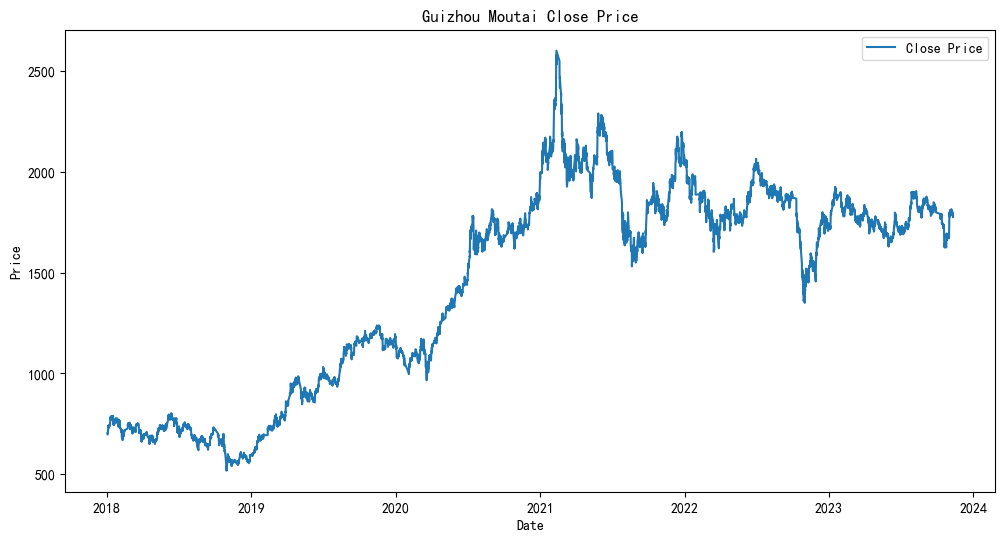

In [20]:
# Plotting Kweichow Moutai stock price hourly trend
plt.figure(figsize=(12, 6))
plt.plot(hourly_df_600519['trade_date'], hourly_df_600519['close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Guizhou Moutai Close Price')
plt.legend()
plt.show()

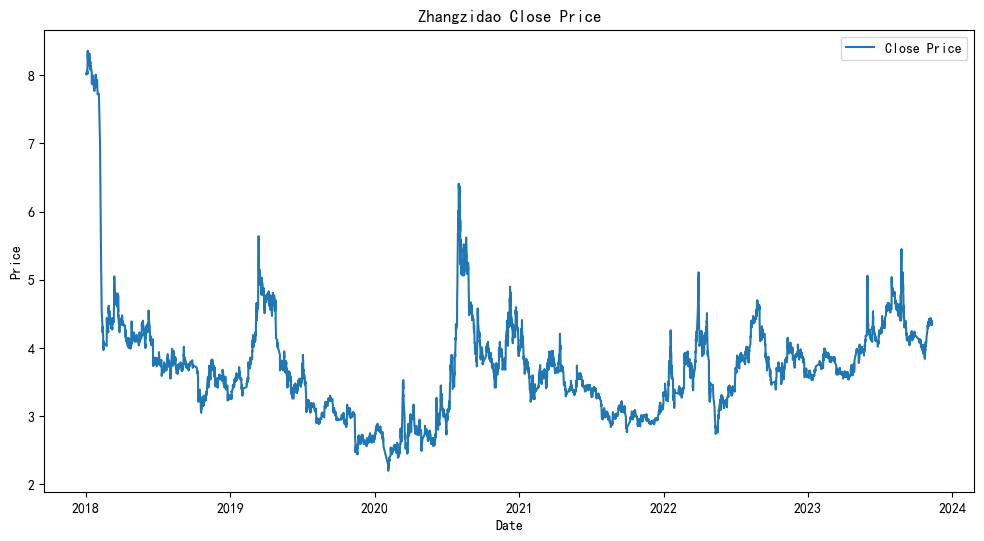

In [21]:
# Plotting Zhangzidao stock price hourly trend
plt.figure(figsize=(12, 6))
plt.plot(hourly_df_002069['trade_date'], hourly_df_002069['close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Zhangzidao Close Price')
plt.legend()
plt.show()

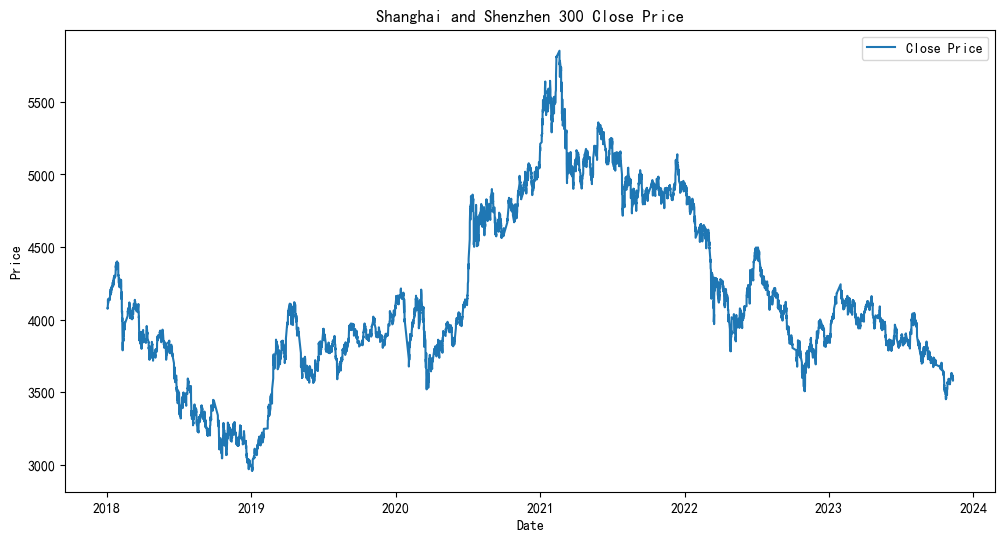

In [22]:
# Plotting Shanghai and Shenzhen 300 Index stock price hourly trend
plt.figure(figsize=(12, 6))
plt.plot(hourly_df_000300['trade_date'], hourly_df_000300['close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Shanghai and Shenzhen 300 Close Price')
plt.legend()
plt.show()

 <span style="font-size: 20px; color: blue;">**The time series characteristics of the stock price variations for three different stocks exhibit significant differences. Training separate predictive models for each is a reasonable choice.**</span>

### 4.2 Feature Engineering

Our task requirement is to predict the stock price for the morning of November 13, 2023, based on the data available until noon on November 12, 2023.

Therefore, we can abstract the task as follows: Utilize the stock price data up to a fixed point in time on "today" and before, construct a feature vector as input, and predict the stock price data on "tomorrow" at that fixed time point.

Thus, the input-output relationship for each data point differs during training and prediction:
- During training, we keep the label for each data point unchanged, assuming it represents the future stock price outcome. Therefore, we discard the features within the same data point (as we cannot know the future) and instead use data from the day before and earlier (i.e., data from 8 timestamps before or the last 8 data points) as features. We assume this data represents the current stock price features and use it to generate new features and construct the feature vector.

- During prediction, we extract the data up to and including the last day from the dataset. We keep the features of the last day unchanged, assuming they represent the current stock price features. We use these features to generate new features and construct the feature vector, which is then input into the trained model to obtain the label, representing the future estimated result.

In [23]:
# Feature Engineering and Feature Visualization
def Feature_generation_for_training(input_hourly_df):
    hourly_df = input_hourly_df.copy()
    switch_used_df = hourly_df.copy()
    # Feature engineering
    # Get Preday Basic Feature
    hourly_df['preday_close'] = switch_used_df['close'].shift(16)
    hourly_df['preday_high'] = switch_used_df['high'].shift(16)
    hourly_df['preday_low'] = switch_used_df['low'].shift(16)
    hourly_df['preday_vol'] = switch_used_df['vol'].shift(16)
    hourly_df['preday_pre_close'] = switch_used_df['pre_close'].shift(16)
    hourly_df['preday_change'] = switch_used_df['change'].shift(16)
    hourly_df['preday_pct_chg'] = switch_used_df['pct_chg'].shift(16)
    
    # Calculate Preday Moving Feature
    window_sizes = [4, 12, 24, 48, 96]
    for window_size in window_sizes:
        # Calculate average price in several size of window
        hourly_df[f'{window_size}_timesteps_preday_avg_price'] = hourly_df['preday_close'].rolling(window=window_size).mean()
        # Calculate high price in several size of window
        hourly_df[f'{window_size}_timesteps_preday_high'] = hourly_df['preday_high'].rolling(window=window_size).max()
        # Calculate low price in several size of window
        hourly_df[f'{window_size}_timesteps_preday_low'] = hourly_df['preday_low'].rolling(window=window_size).min()
        # Calculate average volume in several size of window
        hourly_df[f'{window_size}_timesteps_preday_avg_volume'] = hourly_df['preday_vol'].rolling(window=window_size).mean()
        # Calculate price momentum in several size of window
        hourly_df[f'preday_price_momentum_{window_size}_timesteps'] = hourly_df['preday_close'].pct_change(window_size)

        # Calculate RSI indicator in several size of window
        delta = hourly_df['preday_close'].diff()
        gain = delta.where(delta > 0, 0)
        loss = -delta.where(delta < 0, 0)
        avg_gain = gain.shift(1).rolling(window=window_size).mean()
        avg_loss = loss.shift(1).rolling(window=window_size).mean()
        rsi = 100 - (100 / (1 + (avg_gain / avg_loss)))
        hourly_df[f'{window_size}_timesteps_preday_rsi'] = rsi
    
        # Calculate Bollinger Bands in several size of window
        sma= hourly_df['preday_close'].rolling(window=window_size).mean()
        std = hourly_df['preday_close'].rolling(window=window_size).std()
        hourly_df[f'{window_size}_timesteps_preday_upper_band'] = sma + (2 * std)
        hourly_df[f'{window_size}_timesteps_preday_lower_band'] = sma - (2 * std)

    # Calculate seasonal features
    hourly_df['season'] = hourly_df['trade_date'].dt.quarter
    hourly_df['weekday'] = hourly_df['trade_date'].dt.weekday

    # Build feature vector
    feature_columns =  ['preday_close','preday_high','preday_low','preday_vol','preday_pre_close','preday_change','preday_pct_chg'] + \
                       [f'{window_size}_timesteps_preday_avg_price' for window_size in window_sizes] + \
                       [f'{window_size}_timesteps_preday_high' for window_size in window_sizes] + \
                       [f'{window_size}_timesteps_preday_low' for window_size in window_sizes] + \
                       [f'{window_size}_timesteps_preday_avg_volume' for window_size in window_sizes] + \
                       [f'preday_price_momentum_{window_size}_timesteps' for window_size in window_sizes] + \
                       [f'{window_size}_timesteps_preday_rsi' for window_size in window_sizes] + \
                       [f'{window_size}_timesteps_preday_upper_band' for window_size in window_sizes] + \
                       [f'{window_size}_timesteps_preday_lower_band' for window_size in window_sizes] + \
                       ['season', 'weekday']
    
    # Drop missing values
    hourly_df.dropna(inplace=True)
    feature_vector = hourly_df[feature_columns]
    label = hourly_df['close']
    print(len(hourly_df))
    print(len(feature_vector))
    print(len(label))
    return hourly_df, feature_vector, label

In [24]:
# Constructing training datasets using all available data
hourly_df_600519_trainset, X_600519, y_600519 = Feature_generation_for_training(hourly_df_600519)
hourly_df_002069_trainset, X_002069, y_002069 = Feature_generation_for_training(hourly_df_002069)
hourly_df_000300_trainset, X_000300, y_000300 = Feature_generation_for_training(hourly_df_000300)

11259
11259
11259
11080
11080
11080
11263
11263
11263


In [25]:
X_600519

preday_close  preday_high  preday_low  preday_vol  preday_pre_close  \
113          753.49       764.65      751.22    934918.0            764.39   
114          744.63       754.00      744.44    915481.0            753.49   
115          747.97       749.81      744.09    441828.0            744.63   
116          746.47       751.29      746.05    403302.0            747.97   
117          749.84       752.00      746.00    359796.0            746.47   
...             ...          ...         ...         ...               ...   
11371       1800.24      1803.00     1799.83    110920.0           1803.60   
11372       1793.23      1800.00     1792.00    153602.0           1800.24   
11373       1791.84      1795.90     1790.53    121400.0           1793.23   
11374       1793.10      1794.49     1787.79    144570.0           1791.84   
11375       1798.34      1798.50     1792.45    243408.0           1793.10   

       preday_change  preday_pct_chg  4_timesteps_preday_avg_price  \
113            10.90        1.425974                      752.7025   
114             8.86        1.175862                      752.6100   
115            -3.34       -0.448545                      752.6200   
116             1.50        0.200543                      748.1400   
117            -3.37       -0.451458                      747.2275   
...              ...             ...                           ...   
11371           3.36        0.186294                     1799.6625   
11372           7.01        0.389393                     1798.9350   
11373           1.39        0.077514                     1797.2275   
11374          -1.26       -0.070319                     1794.6025   
11375          -5.24       -0.292231                     1794.1275   

       12_timesteps_preday_avg_price  24_timesteps_preday_avg_price  ...  \
113                       756.626667                     769.874583  ...   
114                       754.483333                     768.421667  ...   
115                       752.402500                     766.878750  ...   
116                       751.245000                     765.246667  ...   
117                       750.975000                     763.816667  ...   
...                              ...                            ...  ...   
11371                    1793.890000                    1801.405000  ...   
11372                    1793.825833                    1800.918750  ...   
11373                    1793.834167                    1800.295833  ...   
11374                    1794.072500                    1799.666250  ...   
11375                    1795.092500                    1799.128750  ...   

       24_timesteps_preday_upper_band  48_timesteps_preday_upper_band  \
113                        799.969296                      799.565688   
114                        799.911360                      800.342390   
115                        798.605847                      800.517523   
116                        796.975418                      800.838147   
117                        795.077636                      800.898916   
...                               ...                             ...   
11371                     1819.035536                     1851.295279   
11372                     1818.789040                     1846.160328   
11373                     1818.353164                     1839.656637   
11374                     1817.625234                     1831.097968   
11375                     1816.400959                     1816.590935   

       96_timesteps_preday_upper_band  4_timesteps_preday_lower_band  \
113                        810.299669                     735.601893   
114                        809.475087                     735.284658   
115                        808.628092                     735.309025   
116                        807.819257                     740.501466   
117                        807.002877                     742.800722   
...    

In [26]:
X_002069

preday_close  preday_high  preday_low  preday_vol  preday_pre_close  \
113            7.91         7.92        7.87    237100.0              7.90   
114            7.92         7.94        7.91    149200.0              7.91   
115            7.90         7.93        7.89    156400.0              7.92   
116            7.91         7.92        7.90     94000.0              7.90   
117            7.90         7.91        7.89    115631.0              7.91   
...             ...          ...         ...         ...               ...   
11371          4.42         4.45        4.41    836100.0              4.40   
11372          4.39         4.43        4.39    358050.0              4.42   
11373          4.38         4.40        4.38    493400.0              4.39   
11374          4.38         4.39        4.37    449900.0              4.38   
11375          4.40         4.41        4.38   1288300.0              4.38   

       preday_change  preday_pct_chg  4_timesteps_preday_avg_price  \
113            -0.01       -0.126582                        7.9175   
114            -0.01       -0.126422                        7.9125   
115             0.02        0.252525                        7.9075   
116            -0.01       -0.126582                        7.9100   
117             0.01        0.126422                        7.9075   
...              ...             ...                           ...   
11371          -0.02       -0.454545                        4.4125   
11372           0.03        0.678733                        4.4050   
11373           0.01        0.227790                        4.3975   
11374           0.00        0.000000                        4.3925   
11375          -0.02       -0.456621                        4.3875   

       12_timesteps_preday_avg_price  24_timesteps_preday_avg_price  ...  \
113                         7.940000                       7.929167  ...   
114                         7.941667                       7.927500  ...   
115                         7.940000                       7.923750  ...   
116                         7.940833                       7.921250  ...   
117                         7.933333                       7.920000  ...   
...                              ...                            ...  ...   
11371                       4.413333                       4.390417  ...   
11372                       4.413333                       4.391250  ...   
11373                       4.410833                       4.391250  ...   
11374                       4.405833                       4.391667  ...   
11375                       4.404167                       4.392917  ...   

       24_timesteps_preday_upper_band  48_timesteps_preday_upper_band  \
113                          8.006944                        8.282288   
114                          8.004227                        8.275060   
115                          7.996417                        8.269894   
116                          7.991359                        8.264010   
117                          7.990526                        8.259823   
...                               ...                             ...   
11371                        4.442329                        4.443891   
11372                        4.442432                        4.442341   
11373                        4.442432                        4.440071   
11374                        4.442286                        4.437337   
11375                        4.442779                        4.434716   

       96_timesteps_preday_upper_band  4_timesteps_preday_lower_band  \
113                          8.346023                       7.883343   
114                          8.347007                       7.893351   
115                          8.348312                       7.888351   
116                          8.349396                       7.893670   
117                          8.350626                       7.888351   
...    

In [27]:
X_000300

preday_close  preday_high  preday_low    preday_vol  preday_pre_close  \
113         4273.97      4292.62     4268.46  2.522284e+09           4289.52   
114         4260.40      4274.84     4259.49  1.957434e+09           4273.97   
115         4253.16      4264.67     4246.99  1.841198e+09           4260.40   
116         4256.94      4269.26     4253.28  1.347493e+09           4253.16   
117         4262.39      4266.09     4251.21  1.285358e+09           4256.94   
...             ...          ...         ...           ...               ...   
11371       3622.19      3624.72     3620.27  8.575413e+08           3623.17   
11372       3609.30      3622.19     3609.30  1.088199e+09           3622.19   
11373       3600.85      3610.53     3600.51  1.193625e+09           3609.30   
11374       3604.75      3604.75     3591.82  1.205065e+09           3600.85   
11375       3611.07      3613.37     3603.16  1.327851e+09           3604.75   

       preday_change  preday_pct_chg  4_timesteps_preday_avg_price  \
113            15.55        0.362511                     4266.2275   
114            13.57        0.317503                     4268.0025   
115             7.24        0.169937                     4269.2625   
116            -3.78       -0.088875                     4261.1175   
117            -5.45       -0.128026                     4258.2225   
...              ...             ...                           ...   
11371           0.98        0.027048                     3623.0175   
11372          12.89        0.355862                     3619.4275   
11373           8.45        0.234117                     3613.8775   
11374          -3.90       -0.108308                     3609.2725   
11375          -6.32       -0.175324                     3606.4925   

       12_timesteps_preday_avg_price  24_timesteps_preday_avg_price  ...  \
113                      4259.954167                    4250.177917  ...   
114                      4261.915000                    4250.963333  ...   
115                      4261.472500                    4251.214167  ...   
116                      4260.890833                    4251.237083  ...   
117                      4260.470000                    4252.543333  ...   
...                              ...                            ...  ...   
11371                    3617.916667                    3614.623750  ...   
11372                    3617.636667                    3615.694167  ...   
11373                    3616.772500                    3616.360000  ...   
11374                    3616.023333                    3617.175833  ...   
11375                    3616.280000                    3618.297917  ...   

       24_timesteps_preday_upper_band  48_timesteps_preday_upper_band  \
113                       4281.855613                     4282.538471   
114                       4282.682850                     4283.882683   
115                       4282.902683                     4284.853512   
116                       4282.942014                     4285.025705   
117                       4283.345450                     4284.834546   
...                               ...                             ...   
11371                     3645.512135                     3642.884305   
11372                     3643.746978                     3643.225114   
11373                     3642.015244                     3643.287821   
11374                     3639.751709                     3643.538957   
11375                     3636.217062                     3644.059199   

       96_timesteps_preday_upper_band  4_timesteps_preday_lower_band  \
113                       4291.526625                    4227.974157   
114                       4292.333021                    4232.379929   
115                       4292.799391                    4237.213345   
116                       4293.396193                    4242.989258   
117                       4293.726800                  

### 4.3 Feature Visualization

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

(1) Visualizing feature patterns for Kweichow Moutai stock:

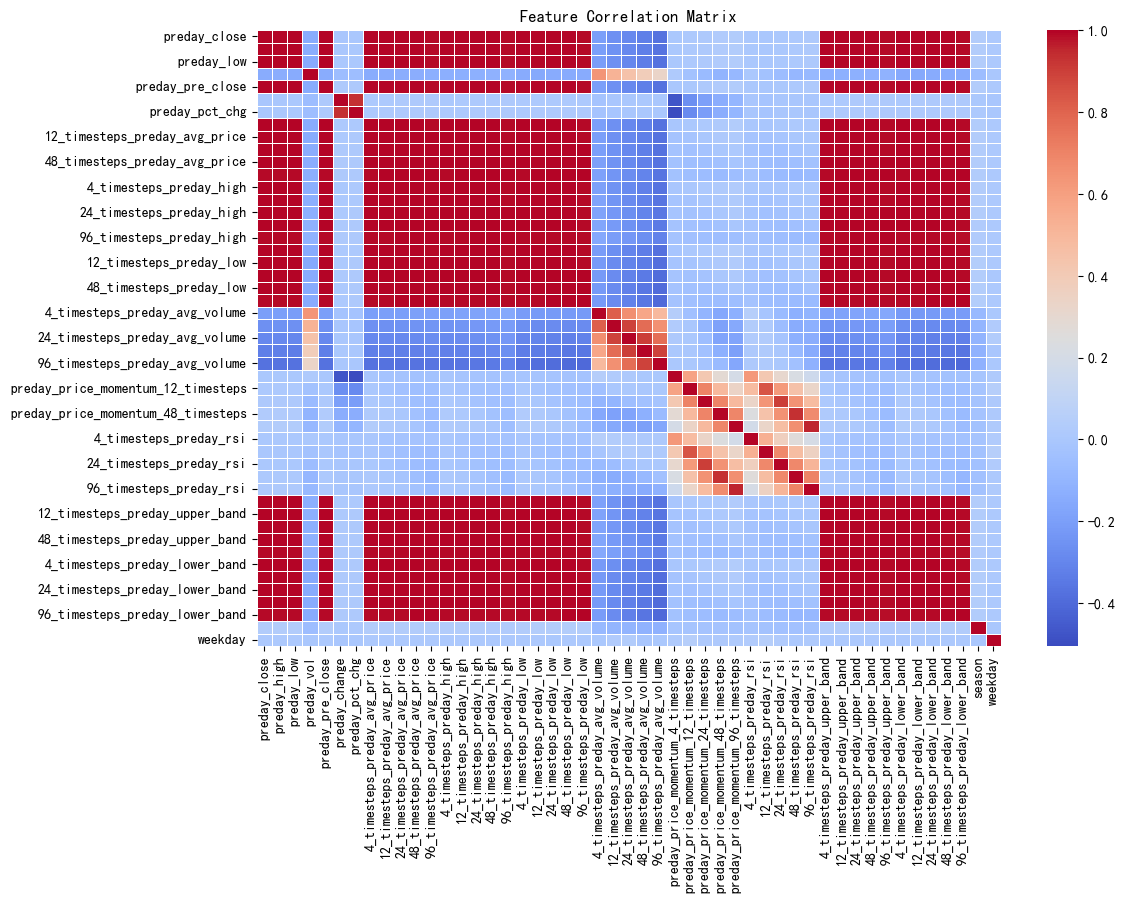

In [29]:
# Selecting numerical features
numeric_feature_columns = X_600519.select_dtypes(include=[np.number]).columns

# Visualizing the correlation matrix of feature vectors
correlation_matrix = X_600519[numeric_feature_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

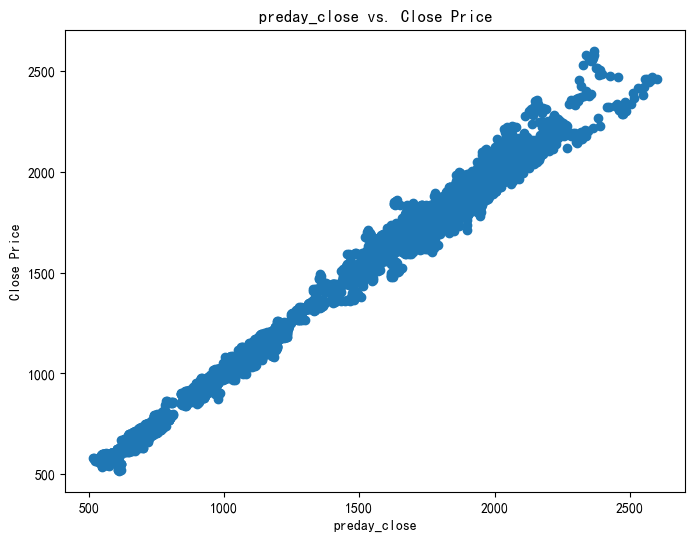

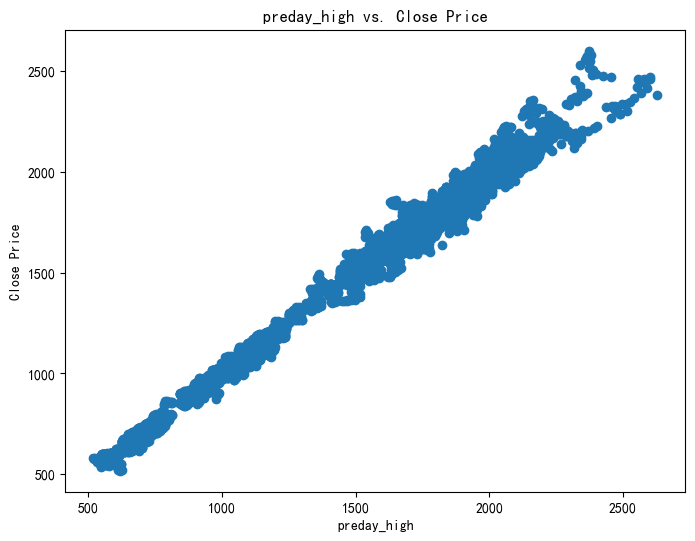

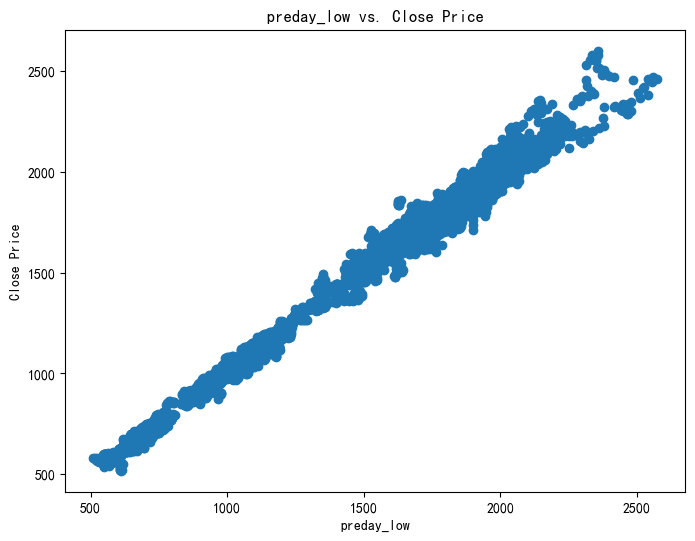

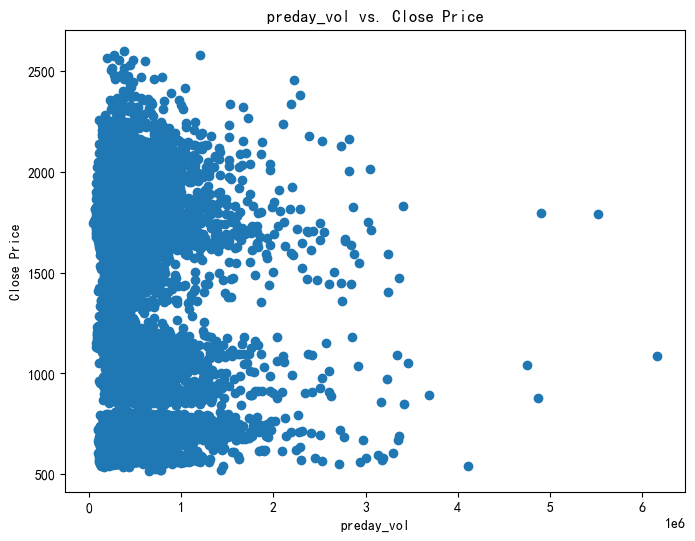

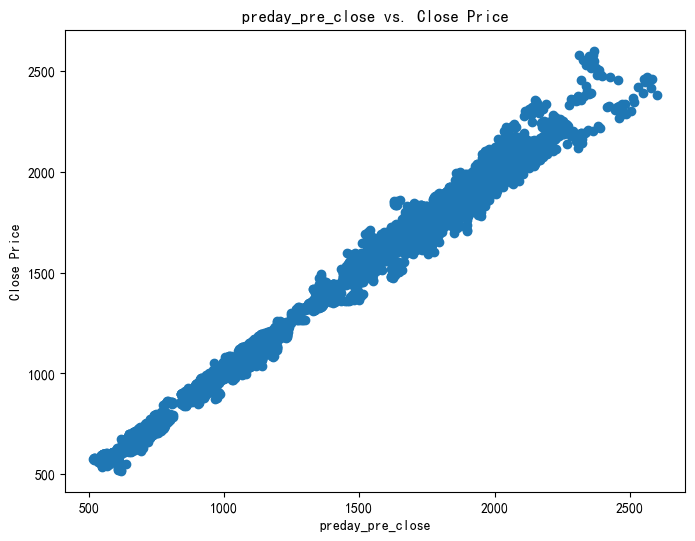

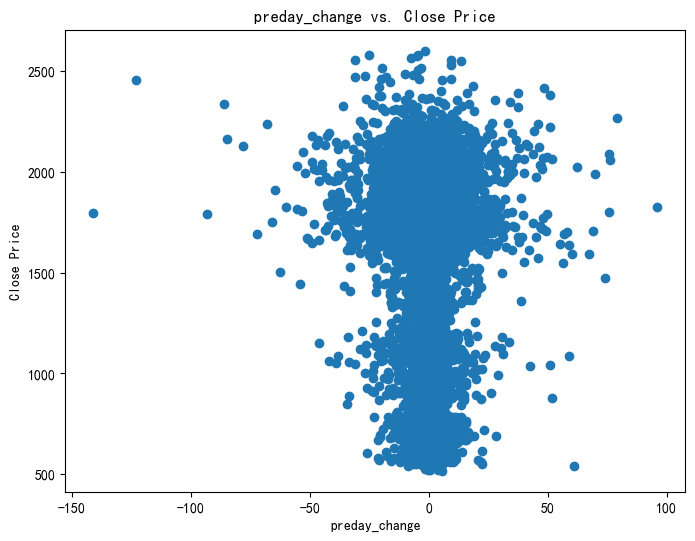

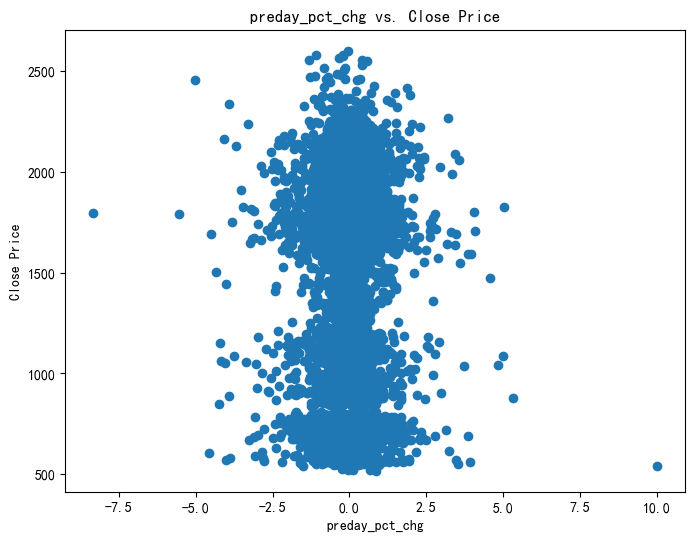

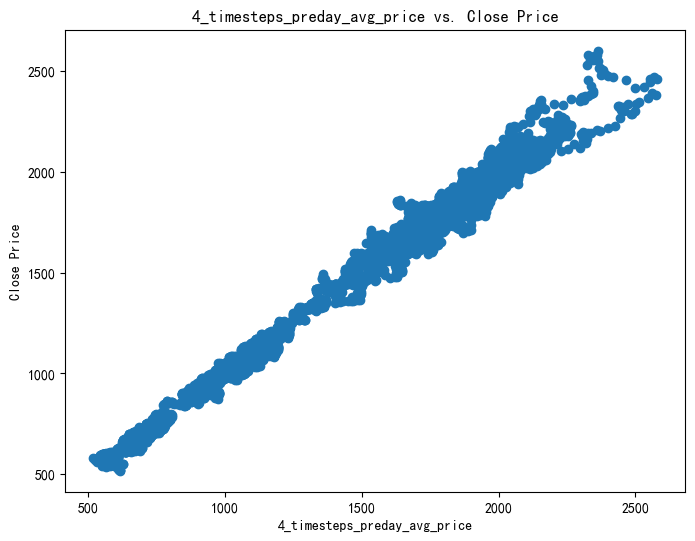

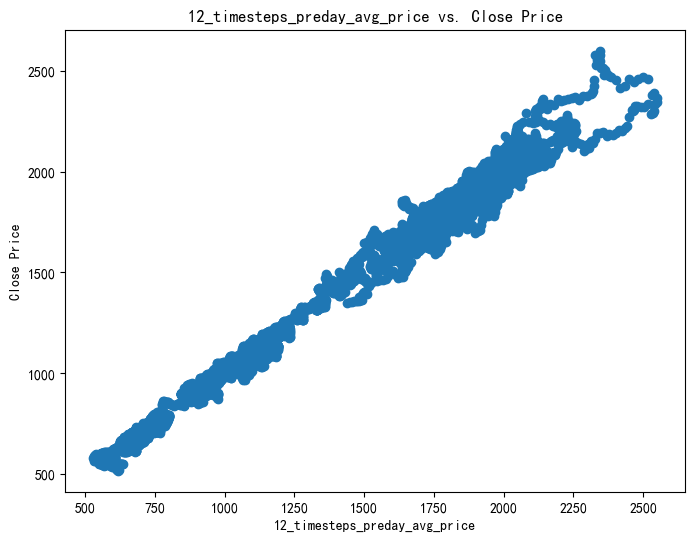

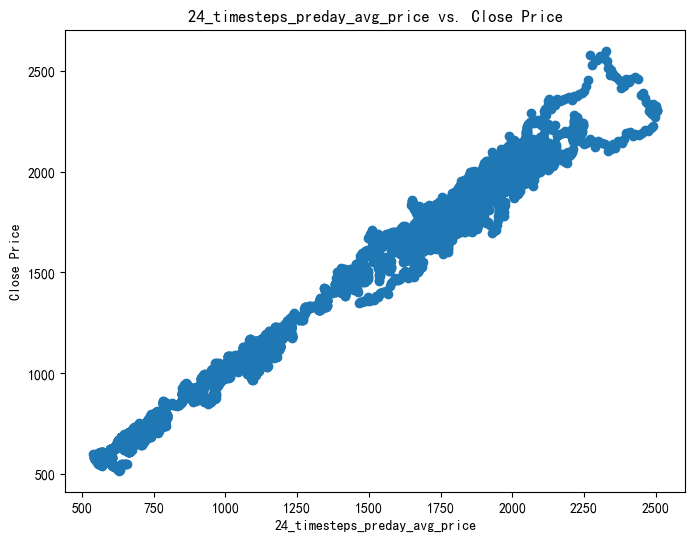

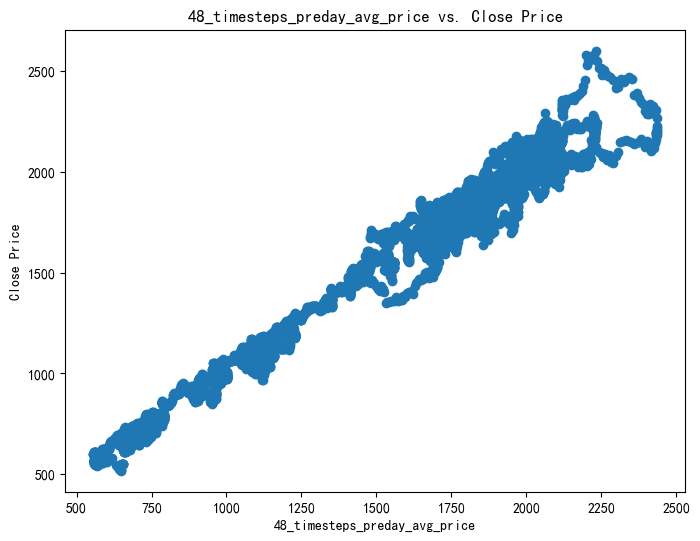

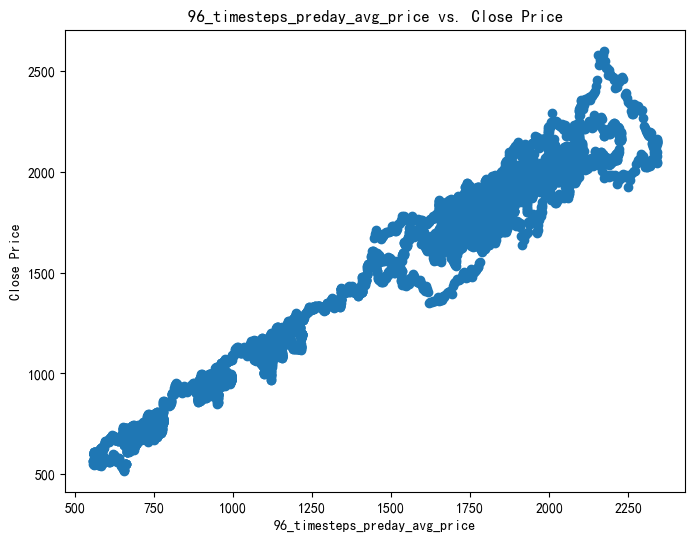

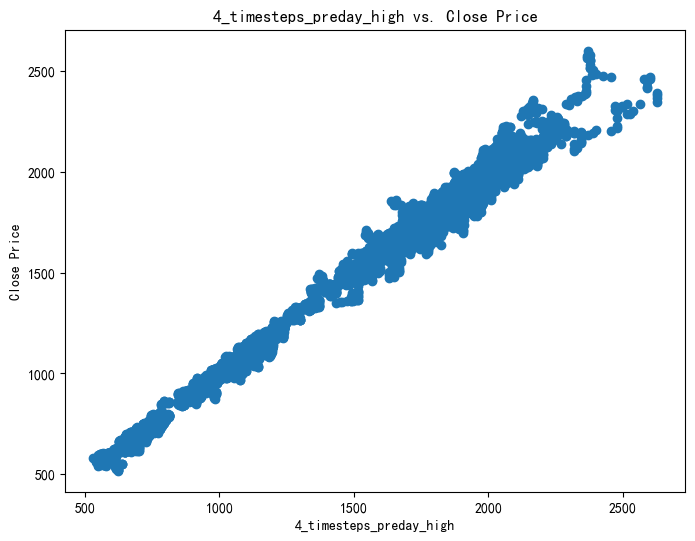

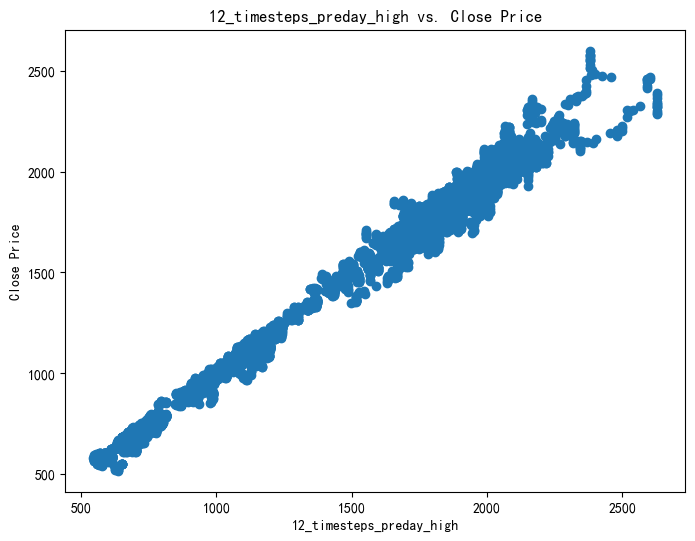

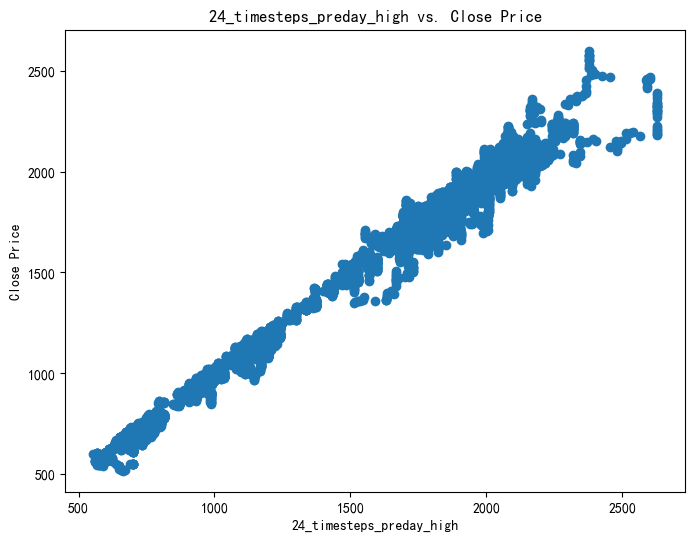

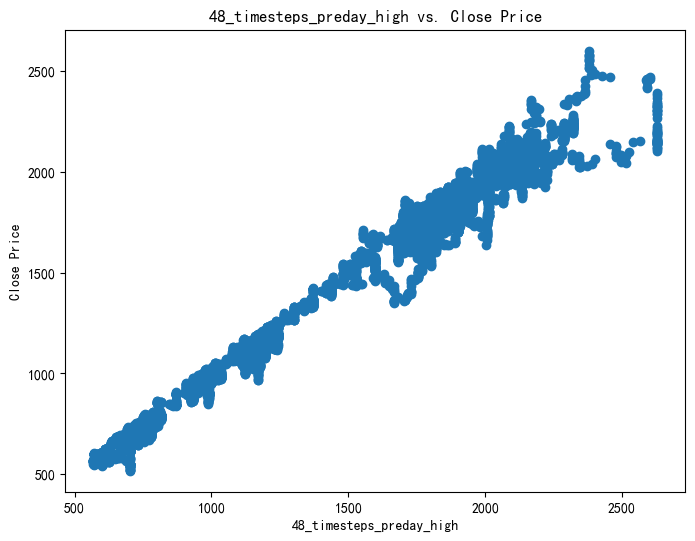

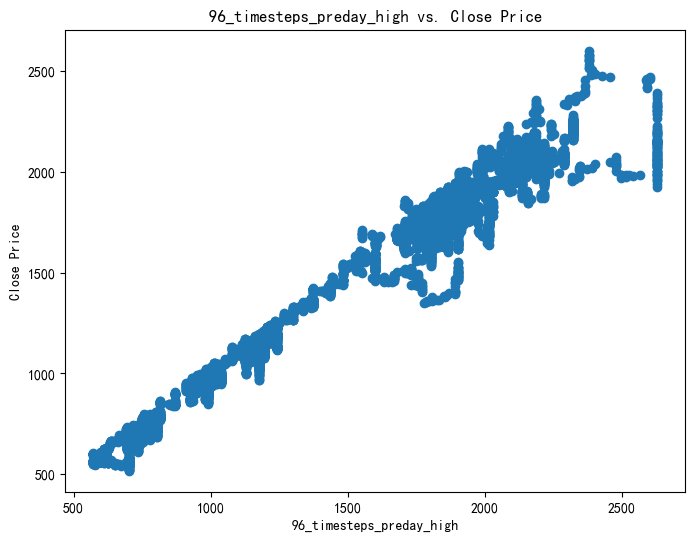

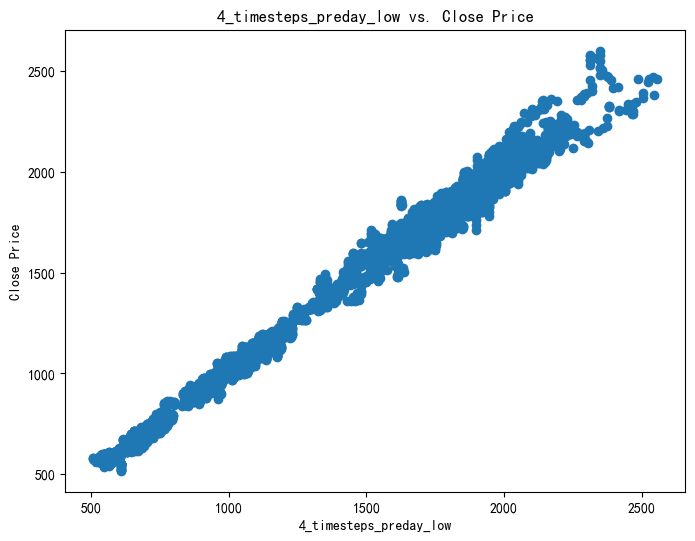

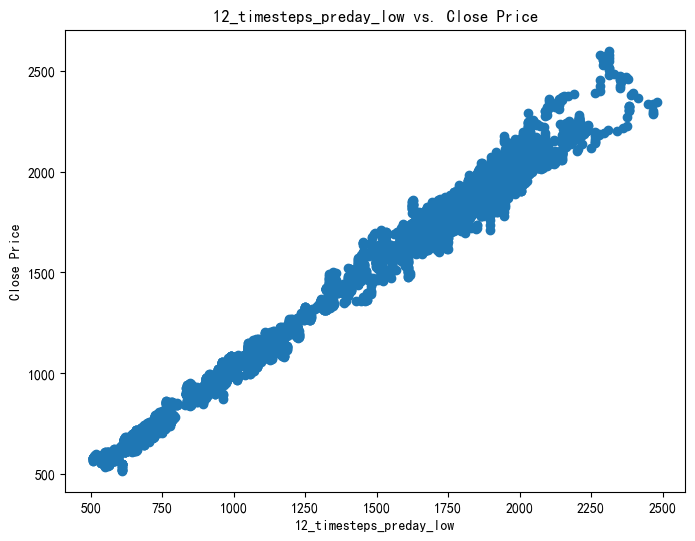

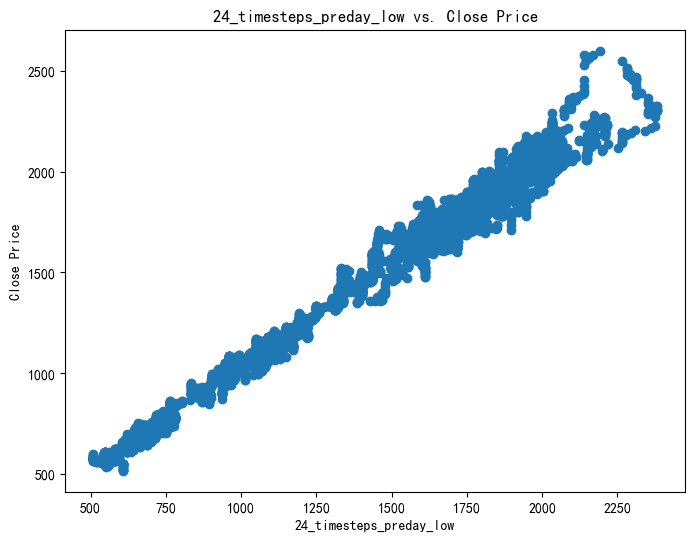

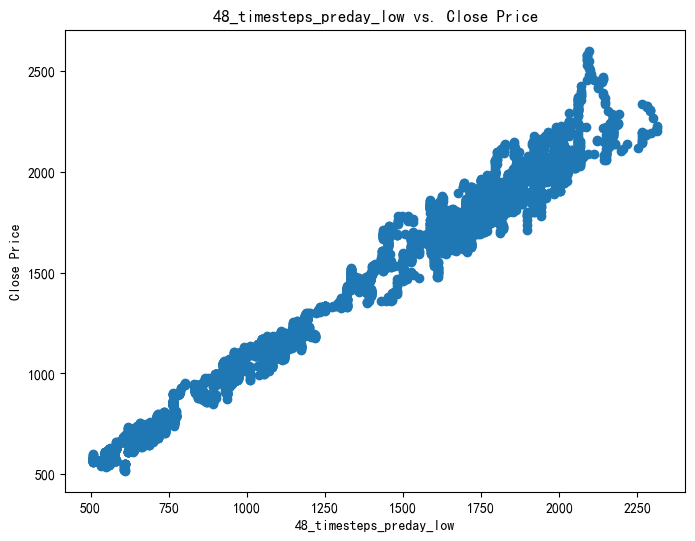

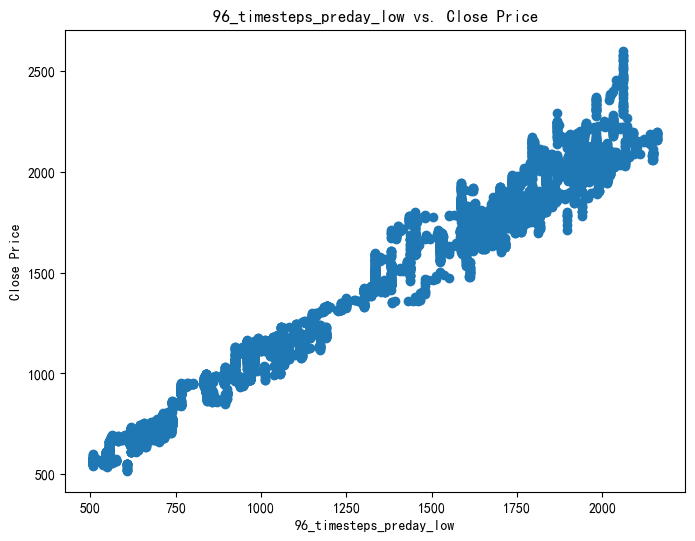

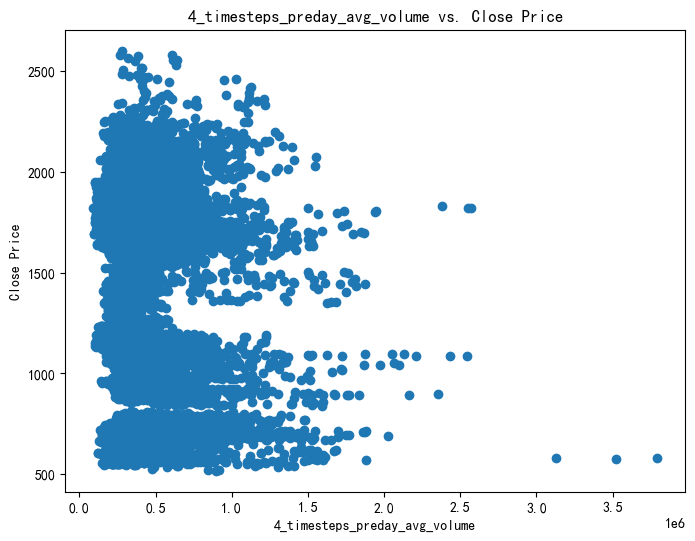

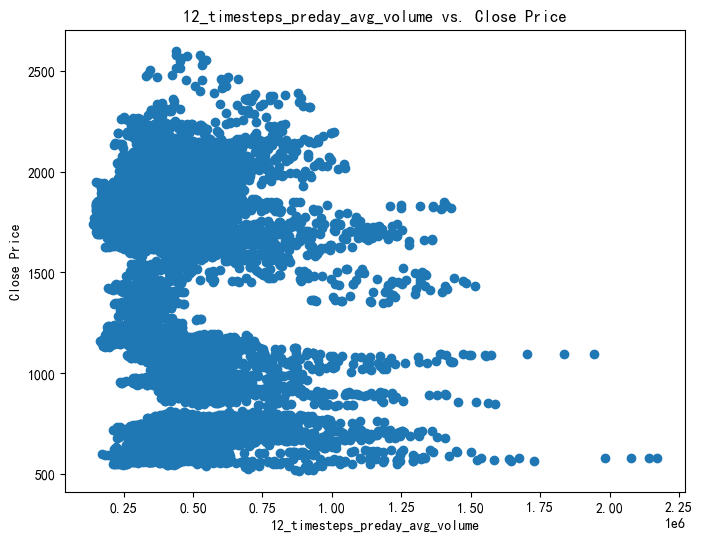

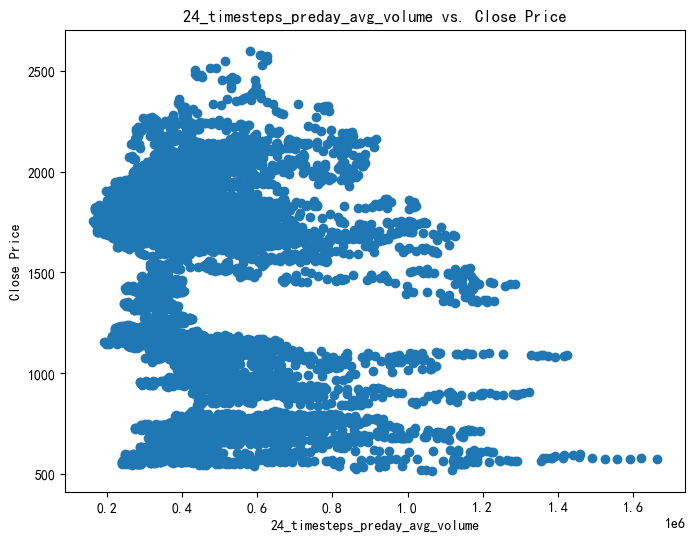

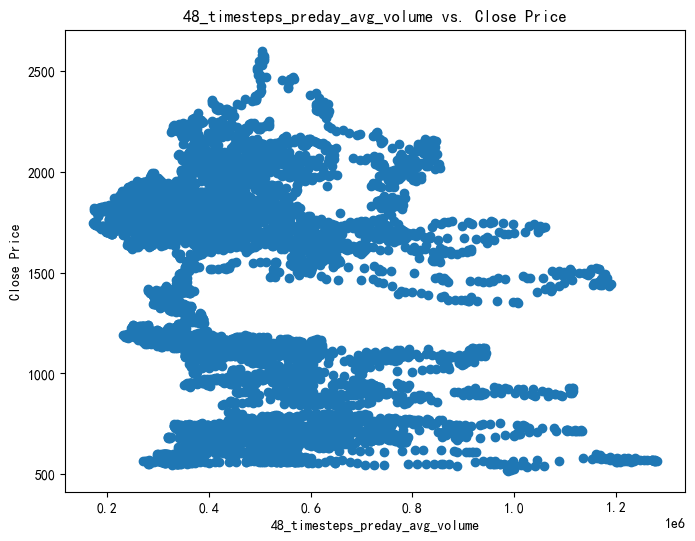

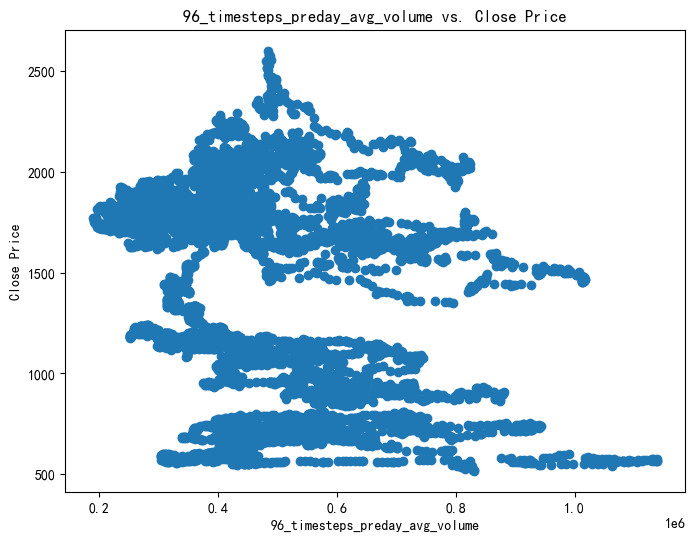

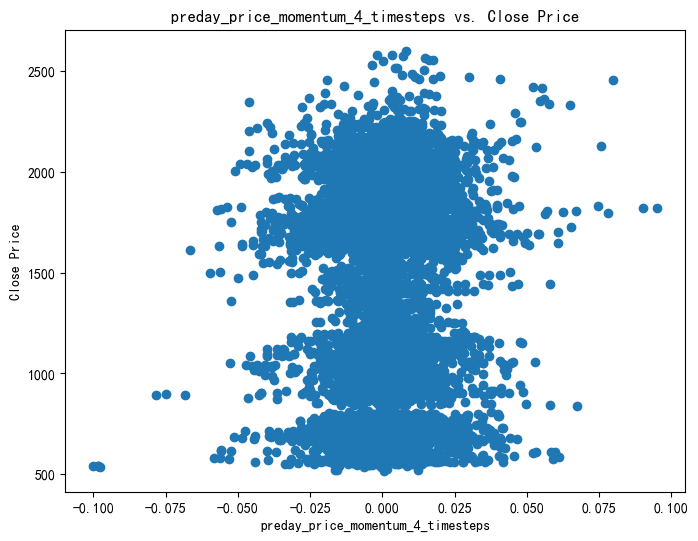

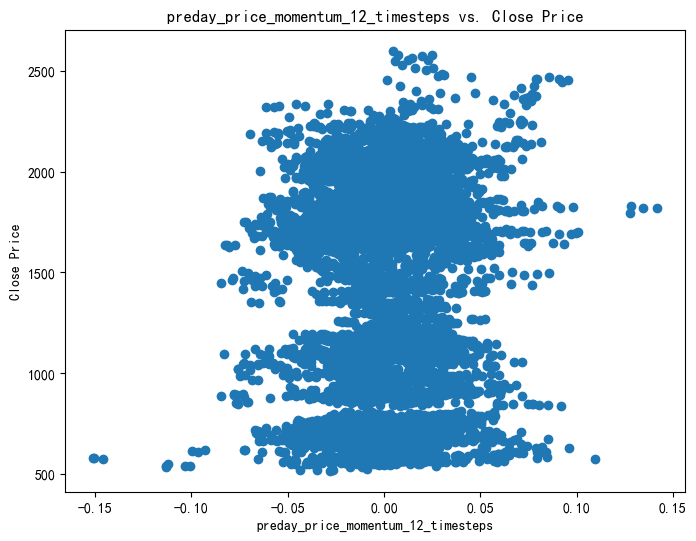

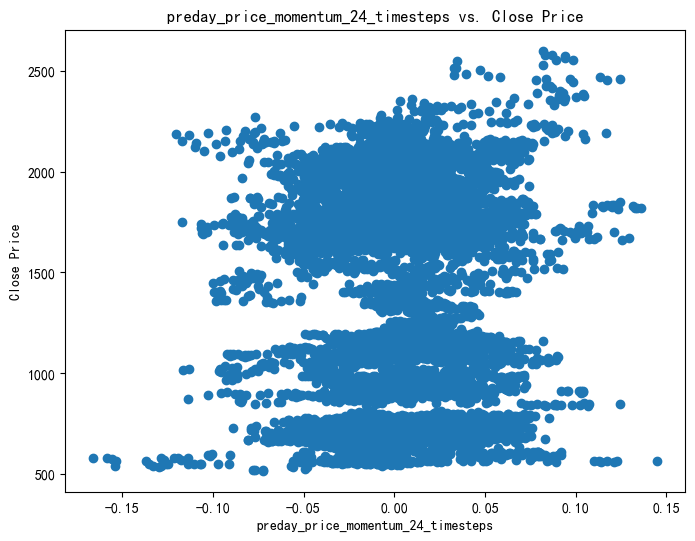

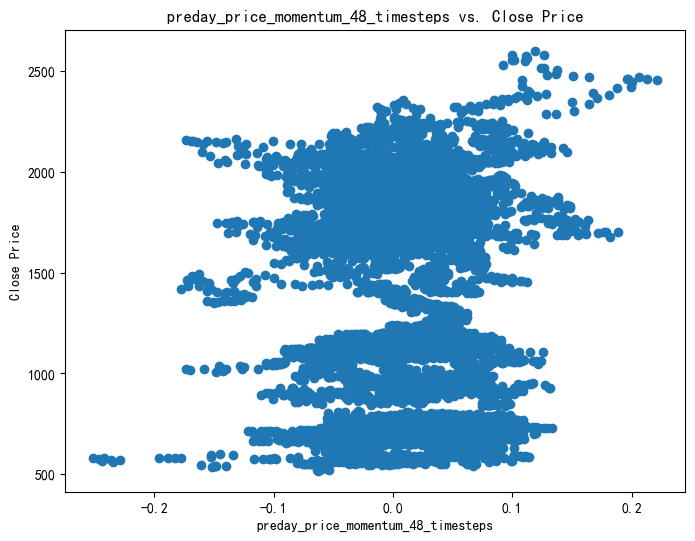

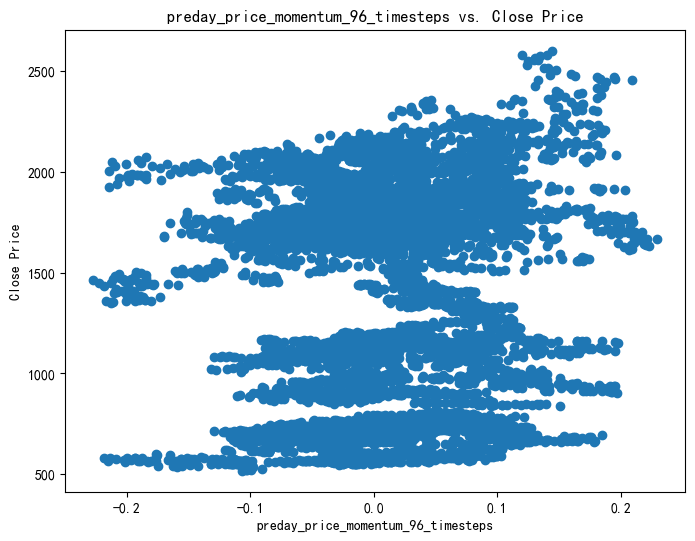

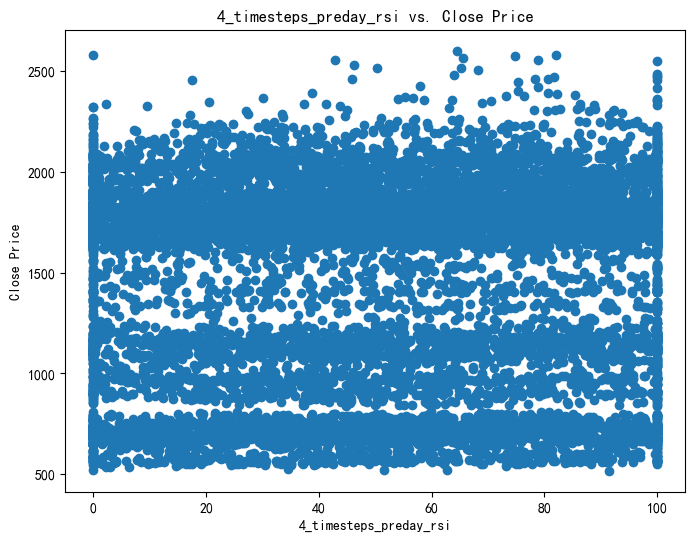

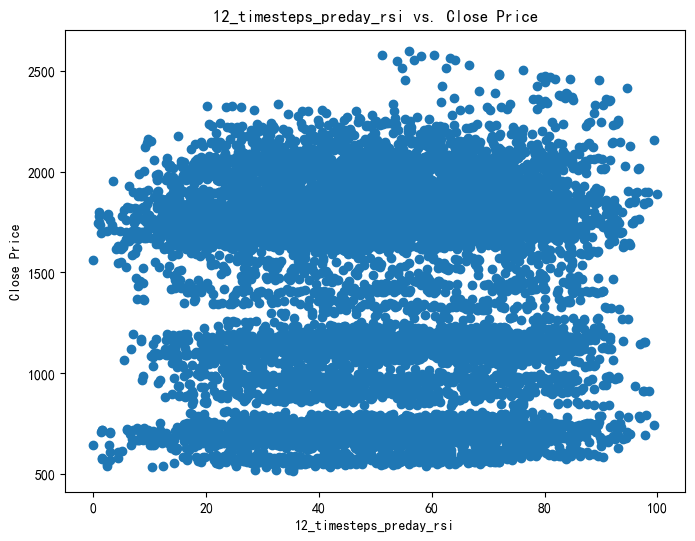

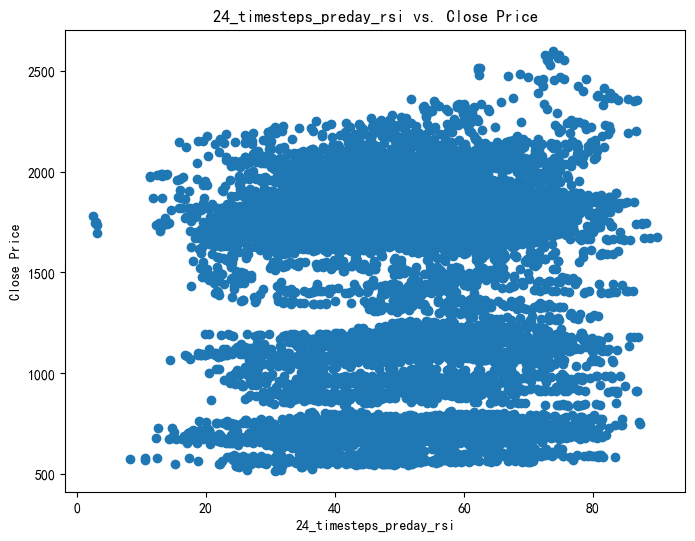

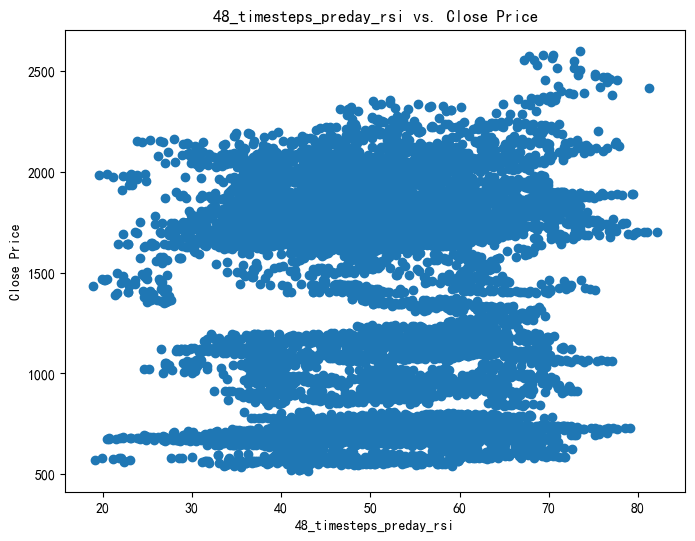

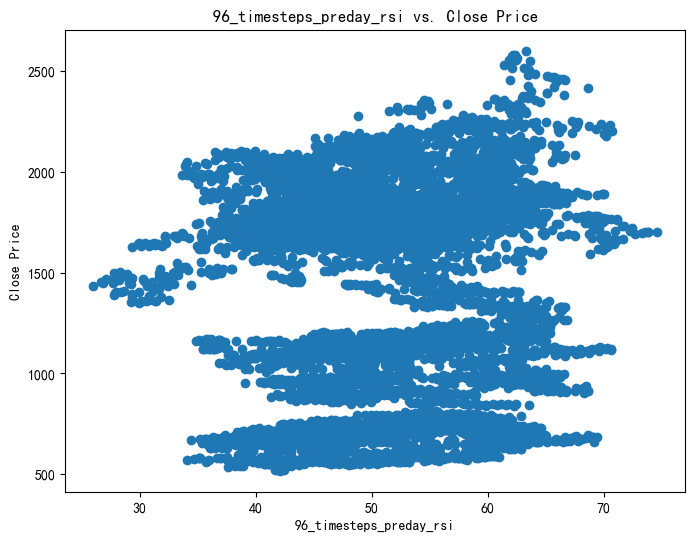

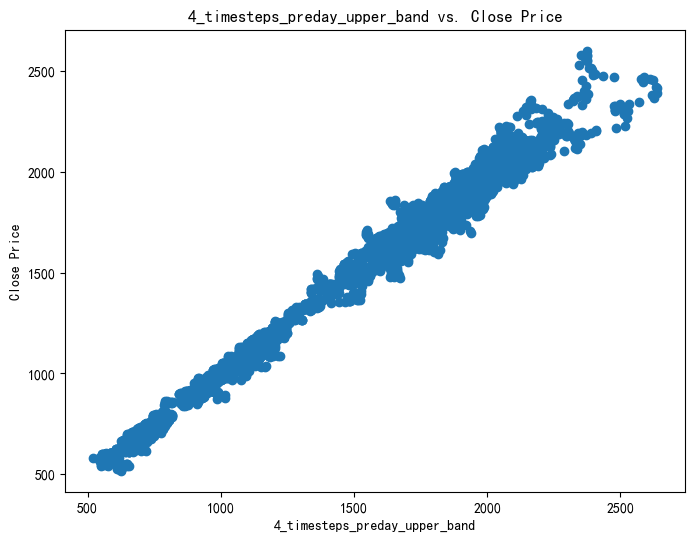

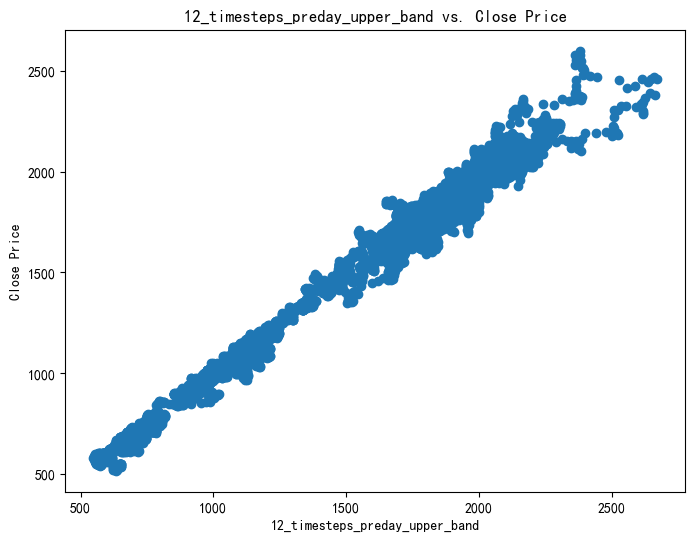

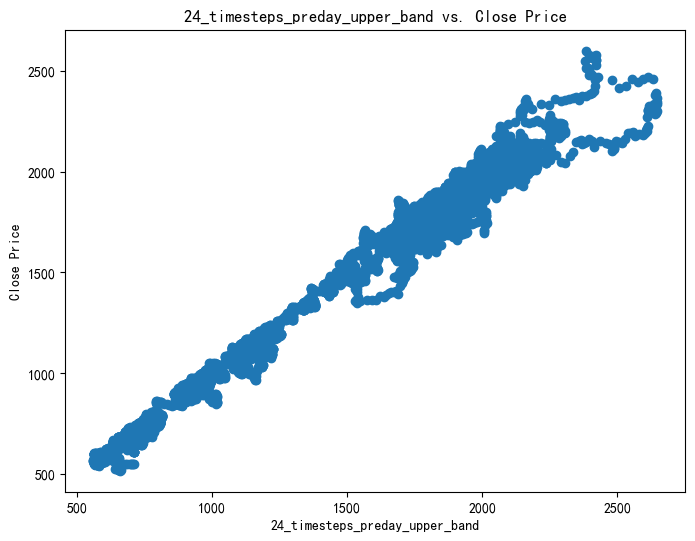

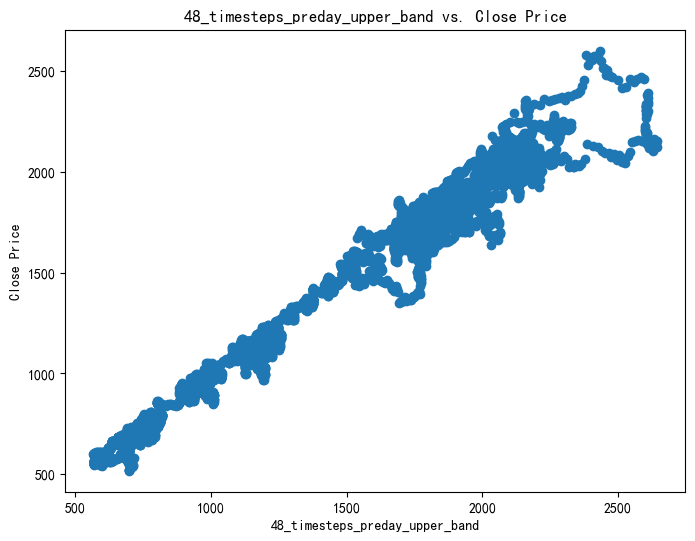

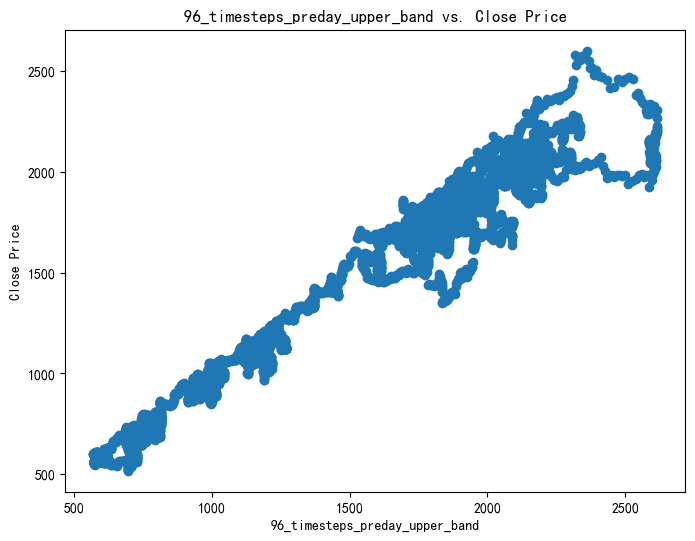

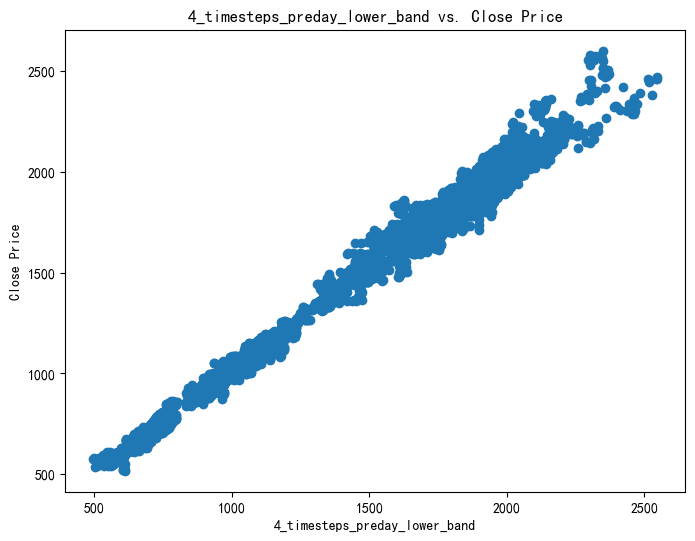

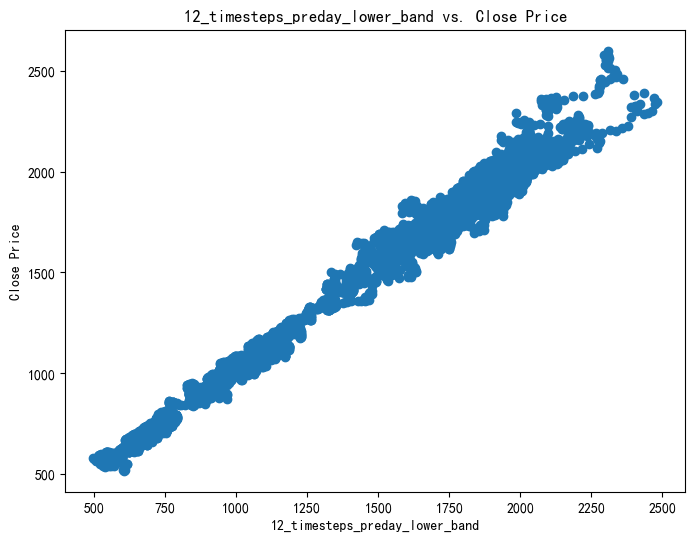

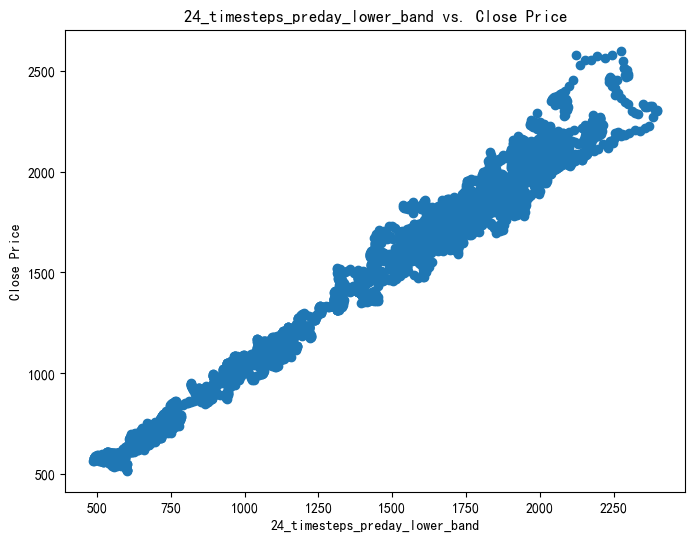

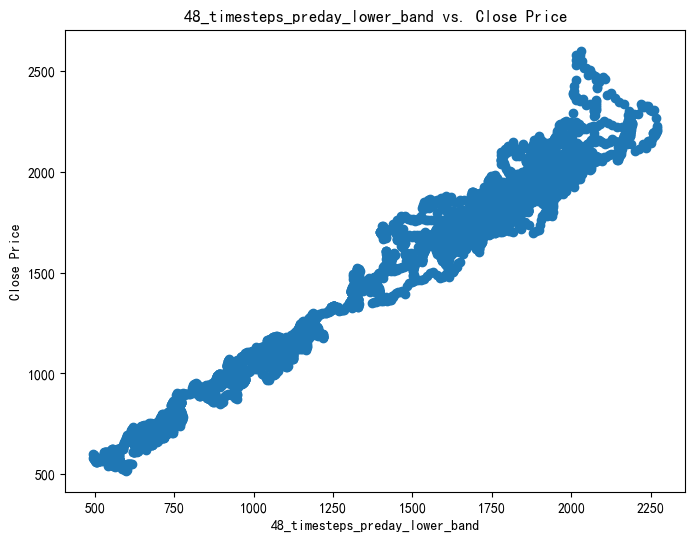

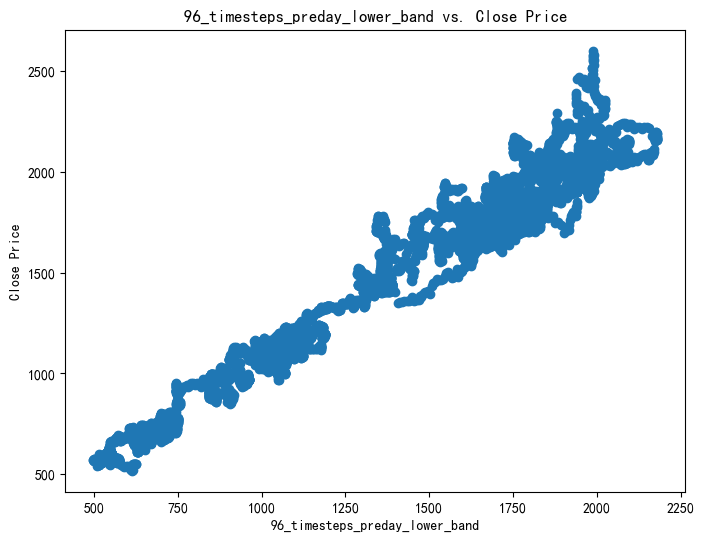

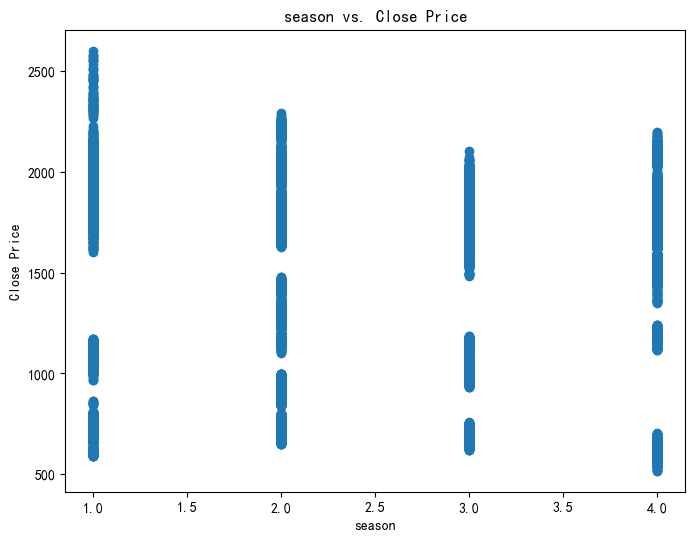

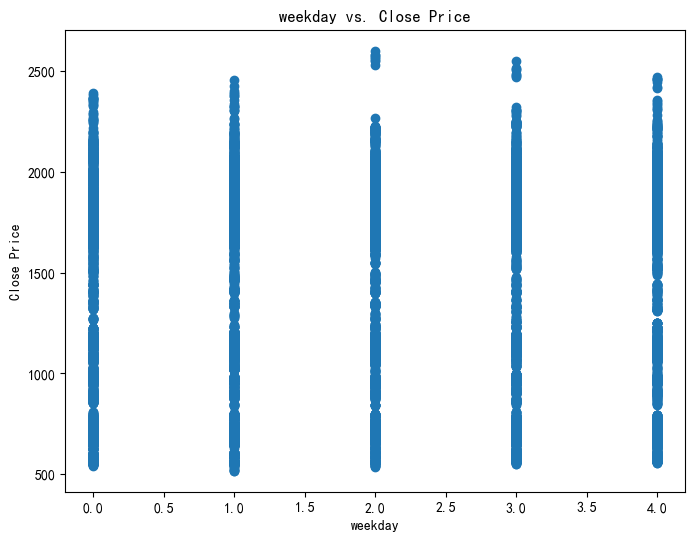

In [30]:
# Plotting the relationship between numerical features and the target individually
for feature in numeric_feature_columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(X_600519[feature], y_600519)
    plt.xlabel(feature)
    plt.ylabel('Close Price')
    plt.title(f'{feature} vs. Close Price')
    plt.show()

In [31]:
# # Plotting the scatter plot matrix
# sns.pairplot(hourly_df_600519_trainset[numeric_feature_columns])
# plt.show()

(2) Visualizing feature patterns for Zhangzidao stock:

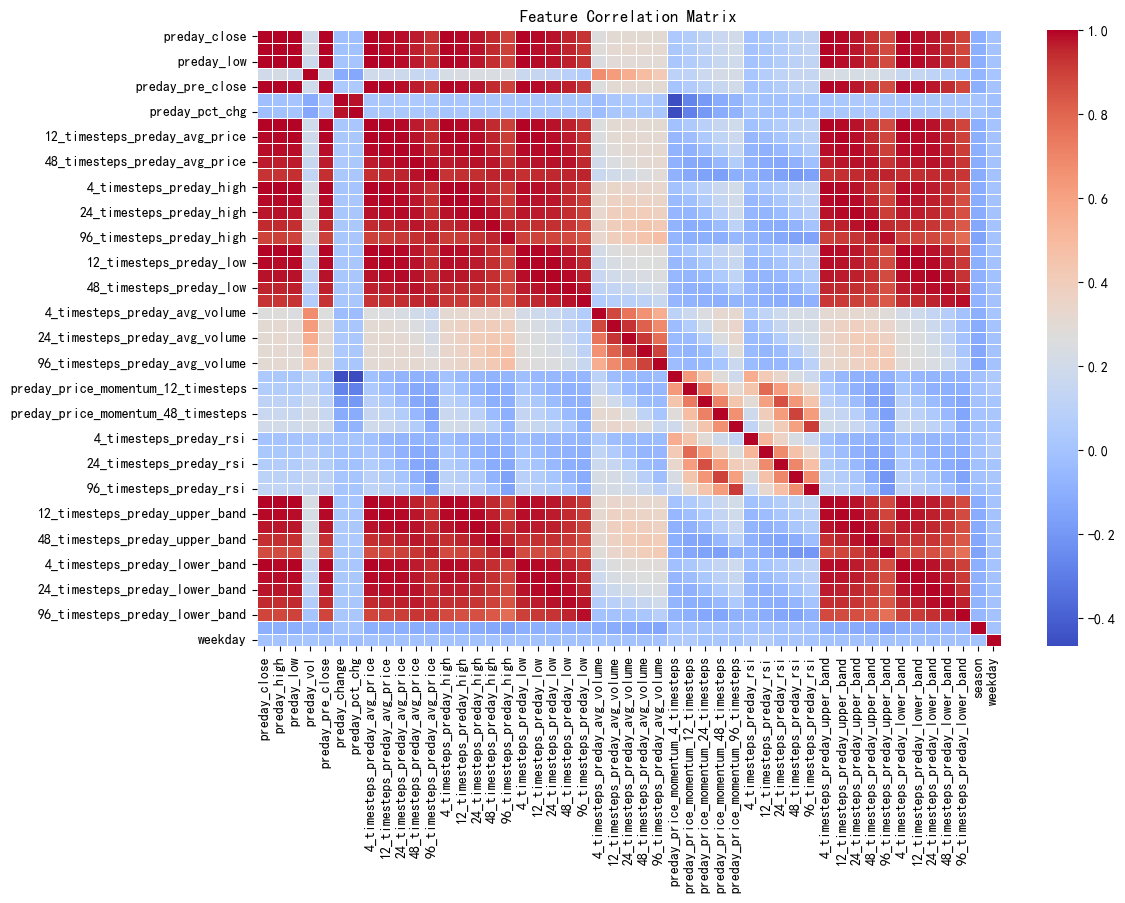

In [32]:
# Selecting numerical features
numeric_feature_columns = X_002069.select_dtypes(include=[np.number]).columns

# Visualizing the correlation matrix of feature vectors
correlation_matrix = X_002069[numeric_feature_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

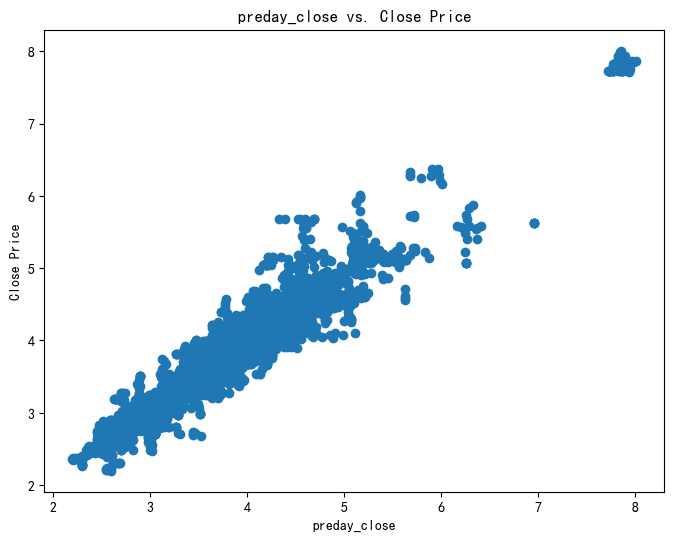

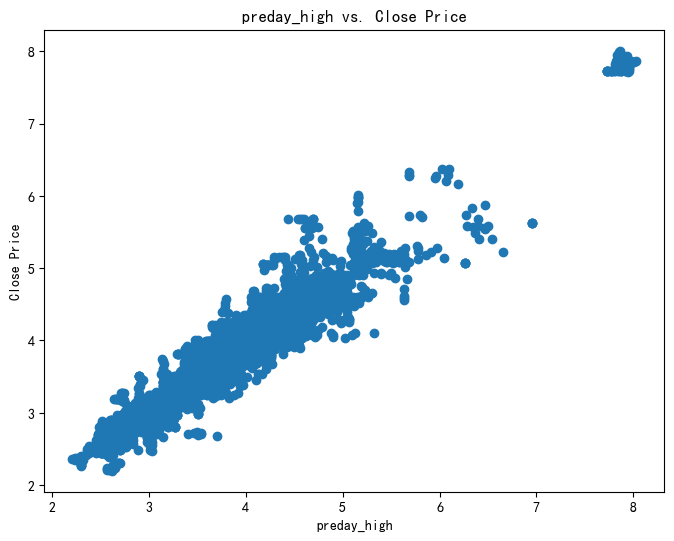

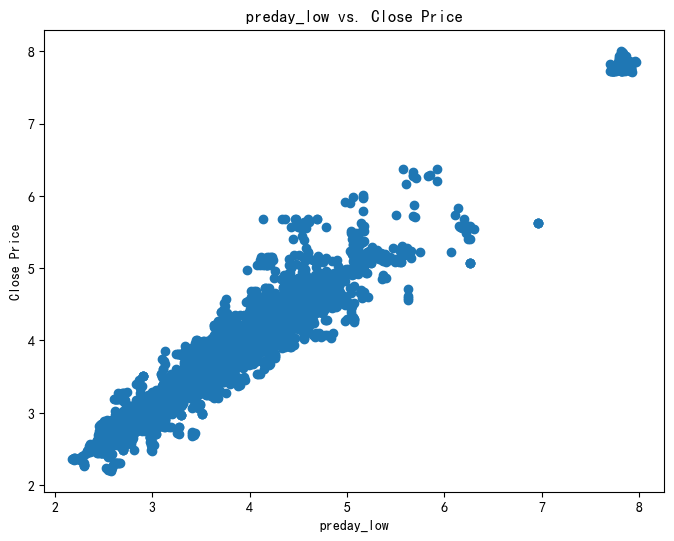

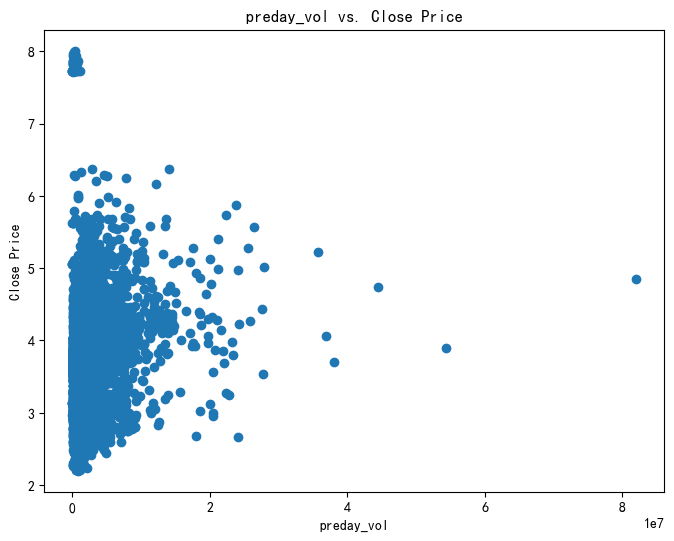

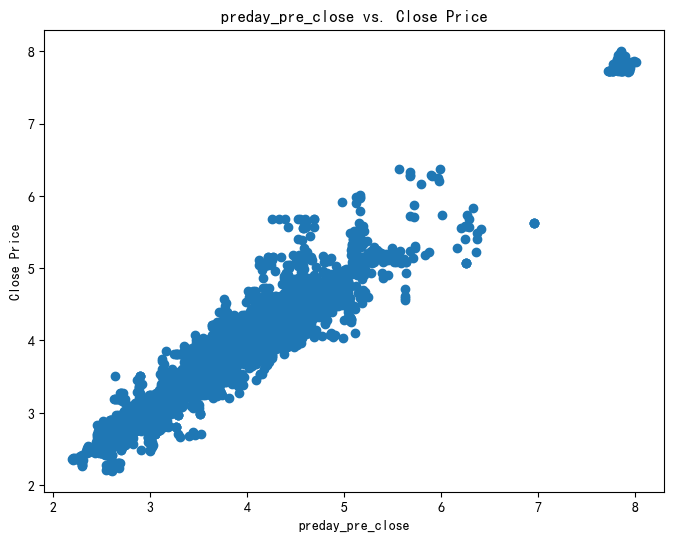

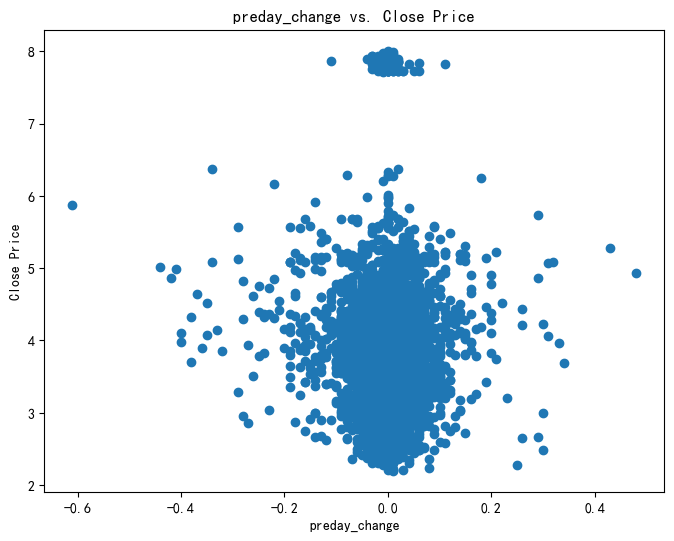

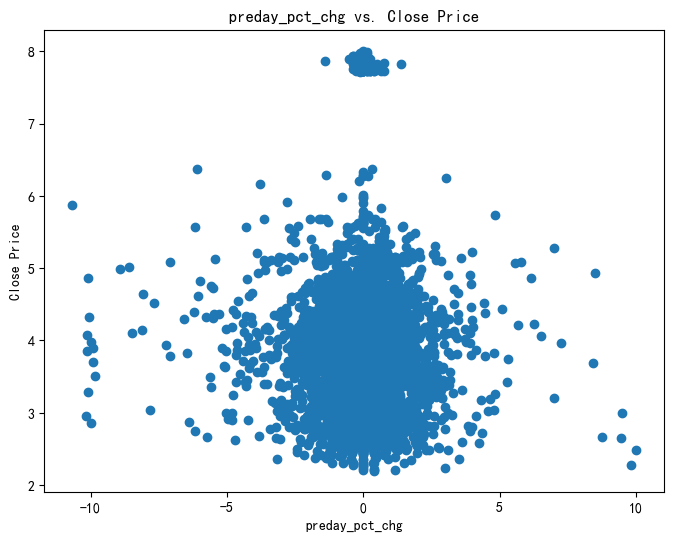

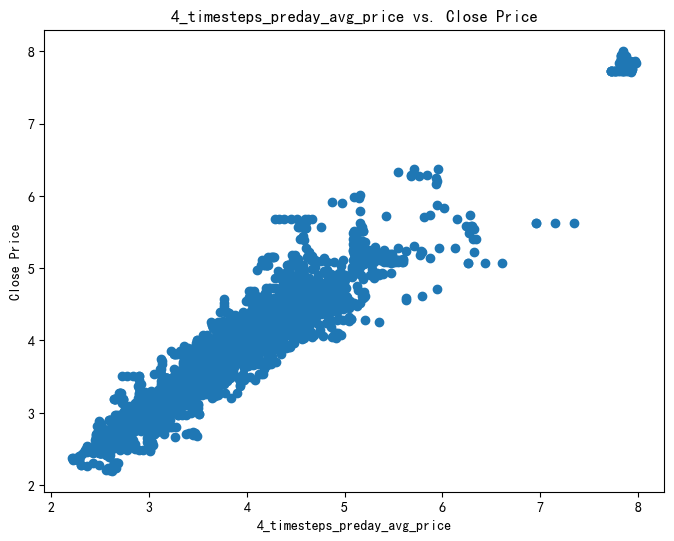

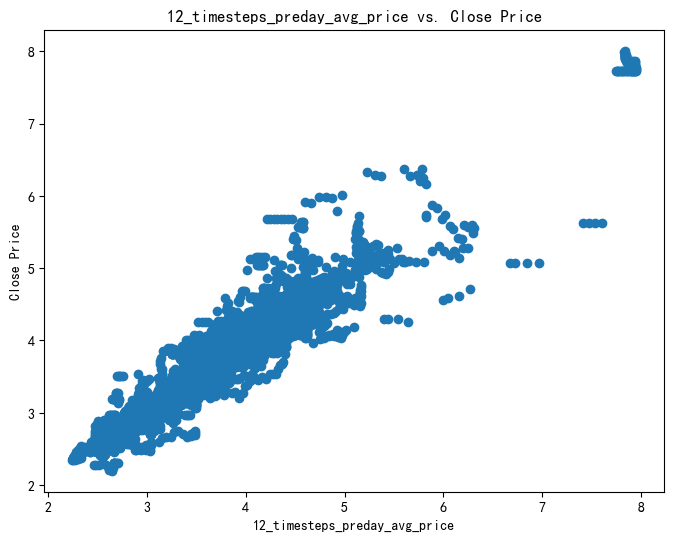

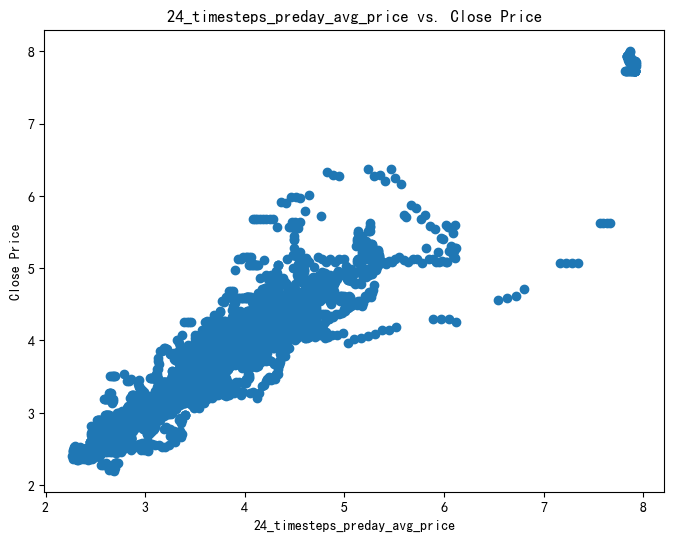

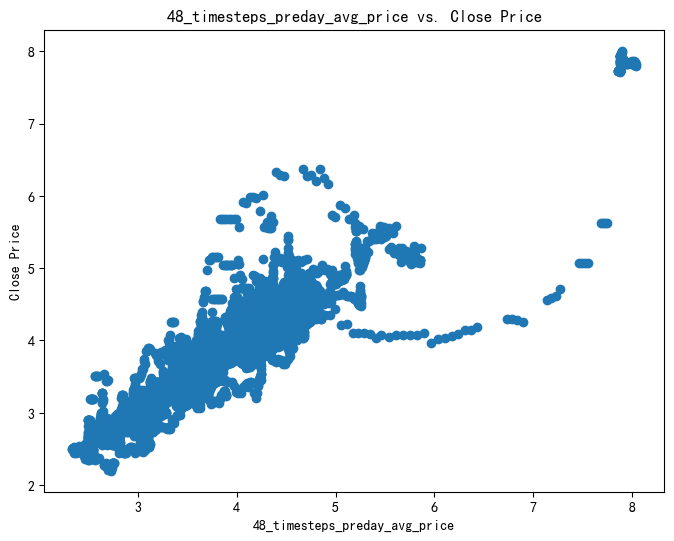

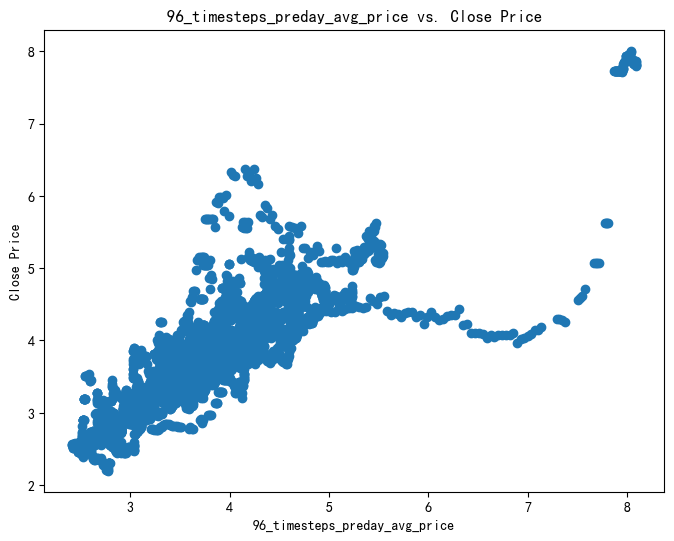

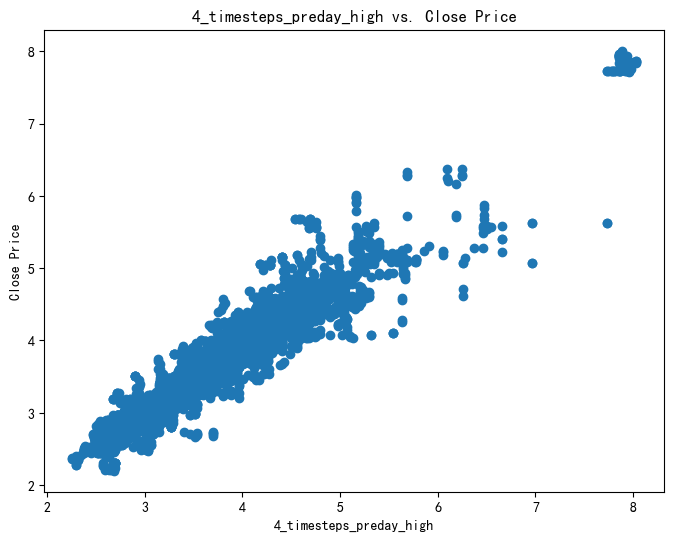

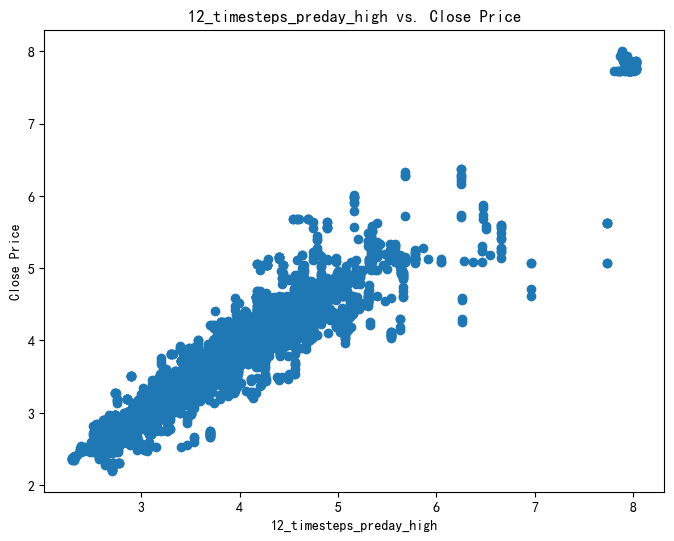

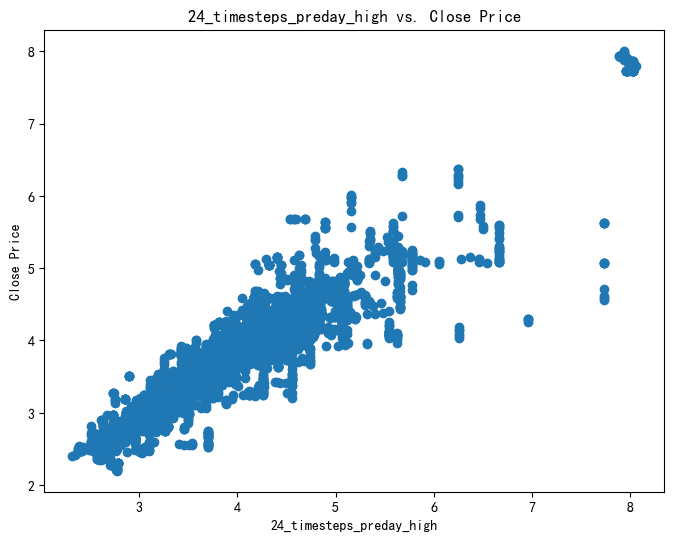

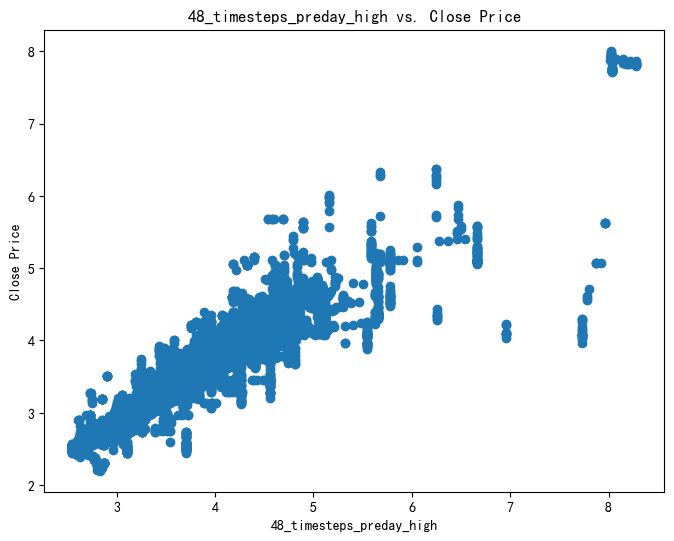

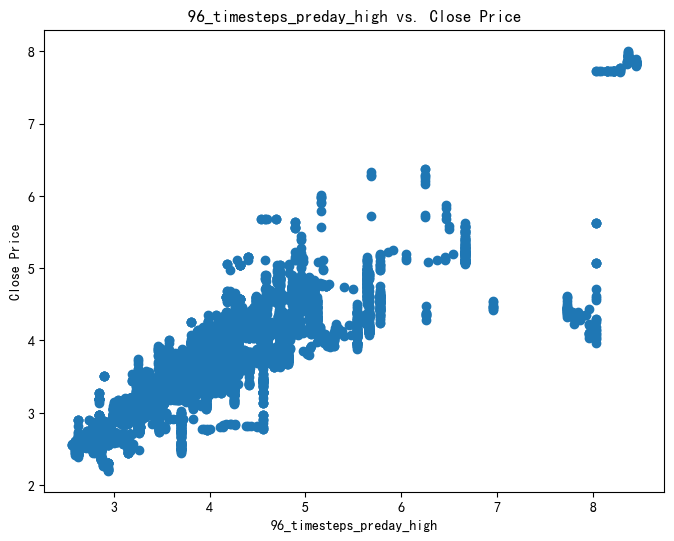

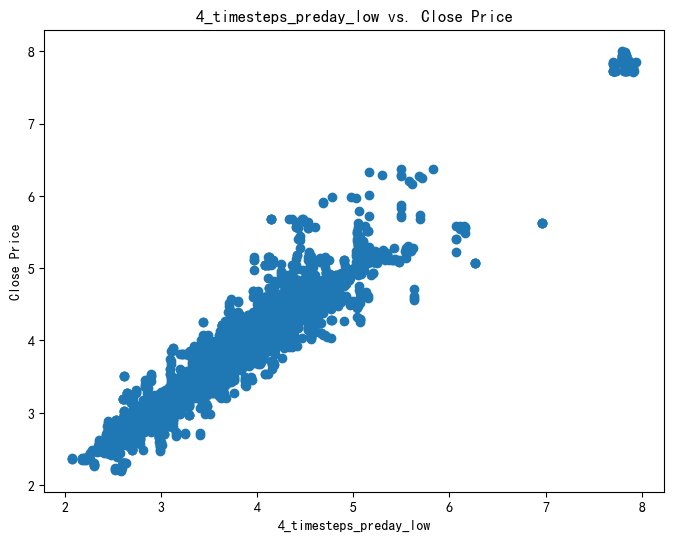

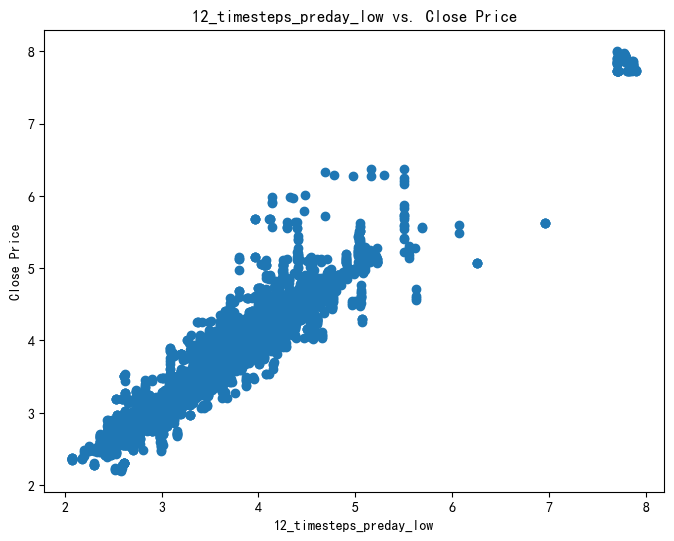

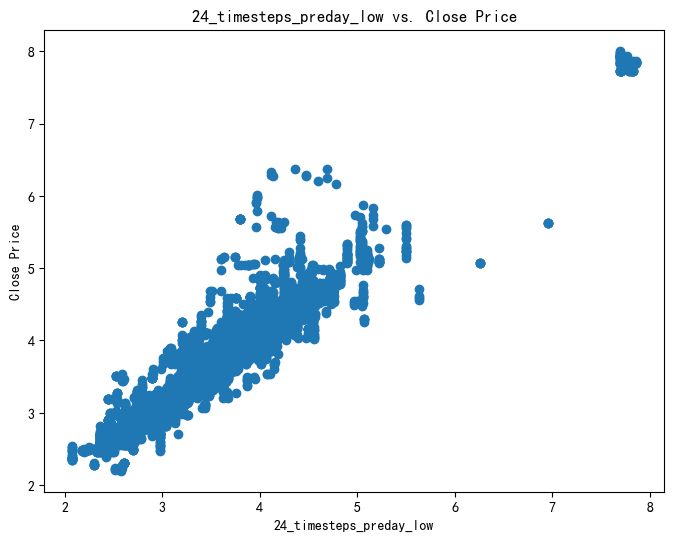

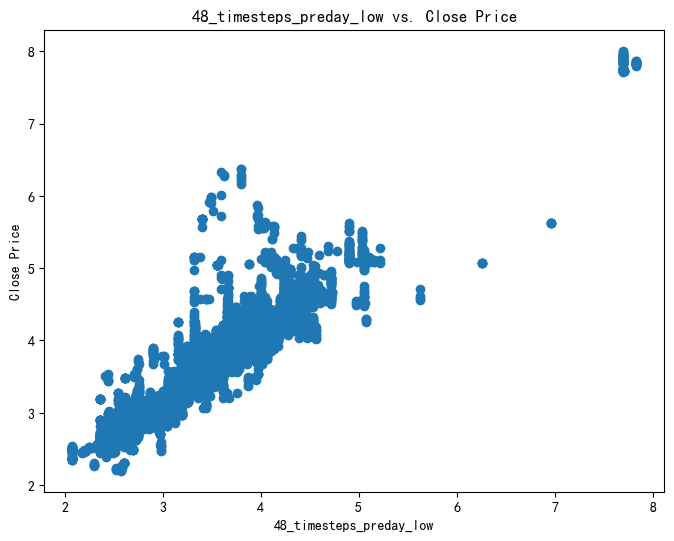

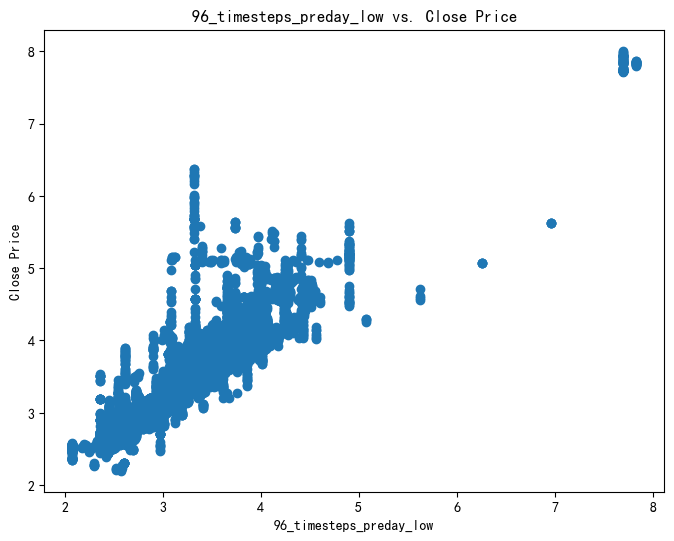

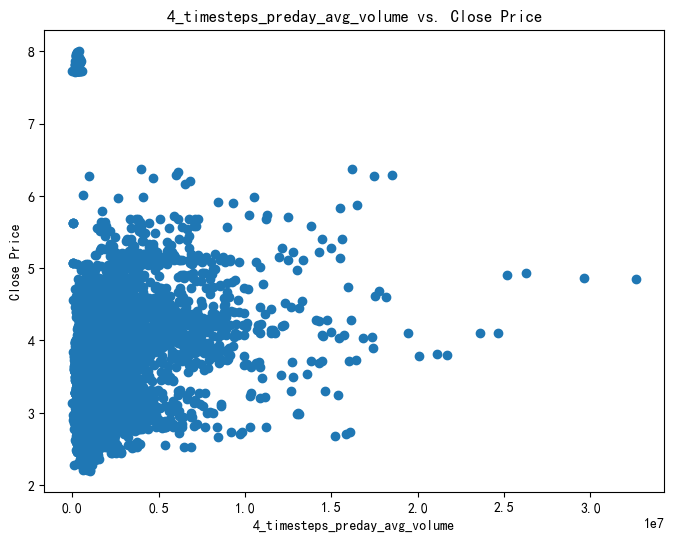

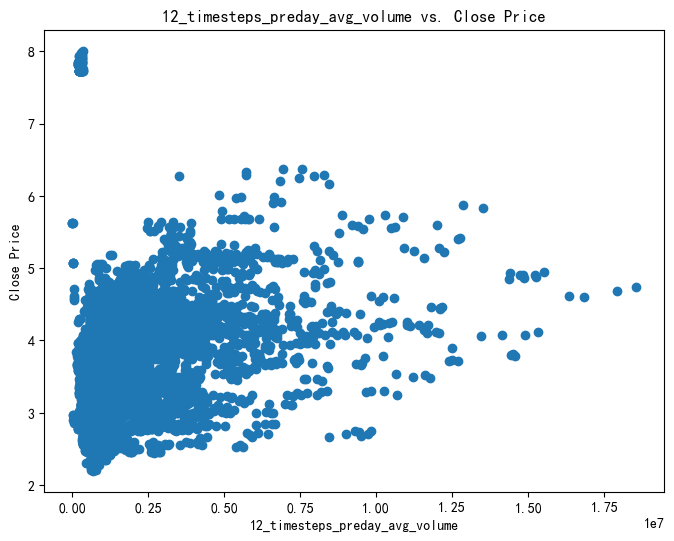

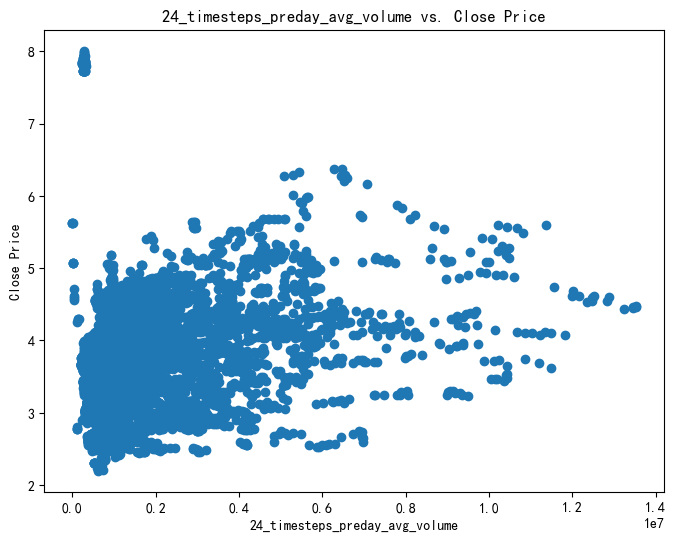

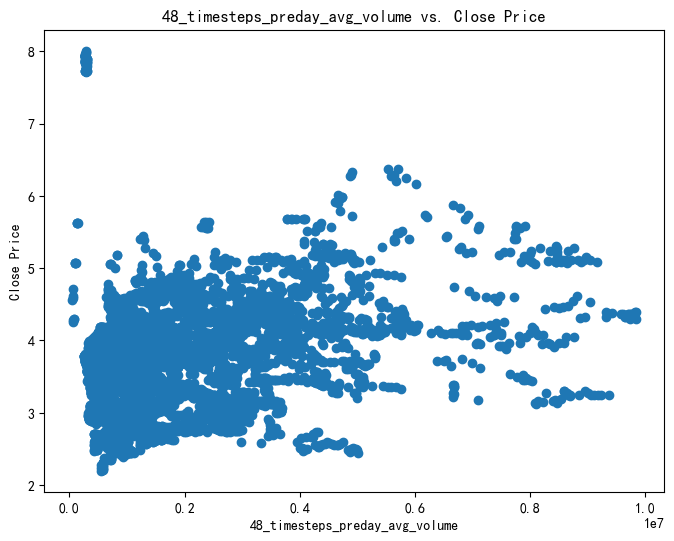

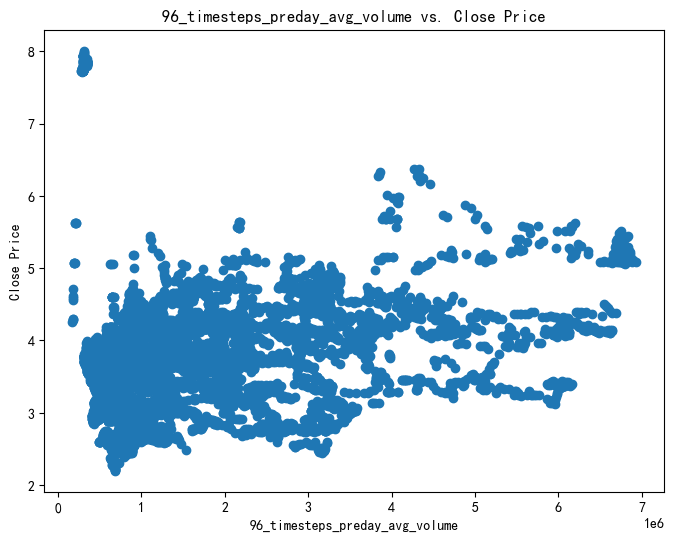

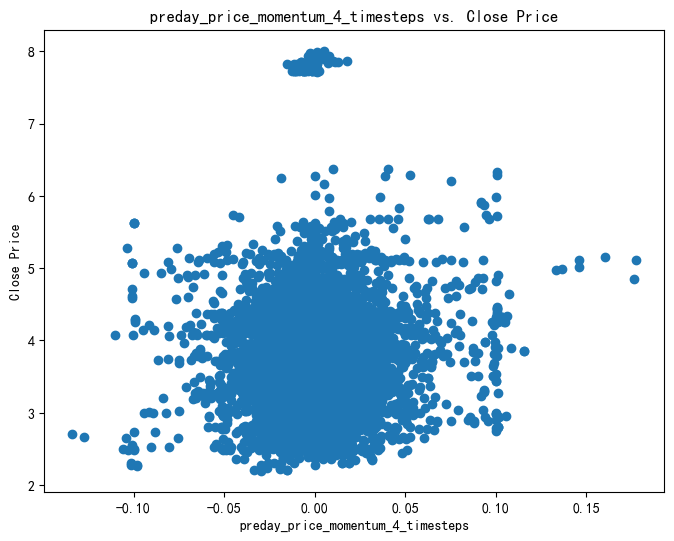

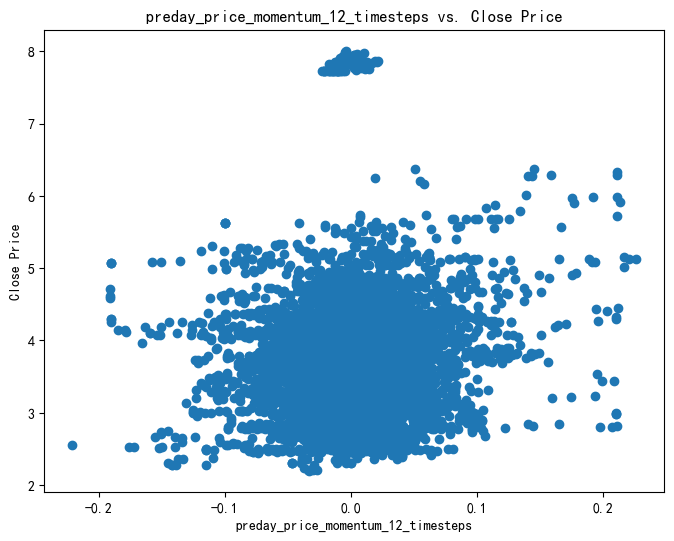

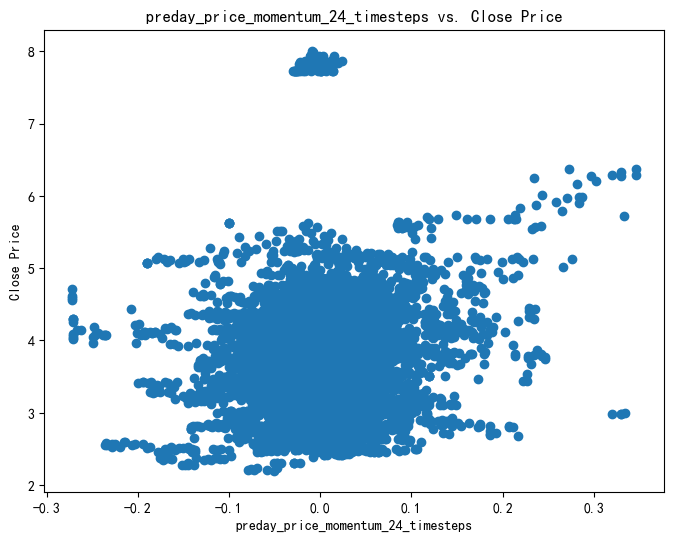

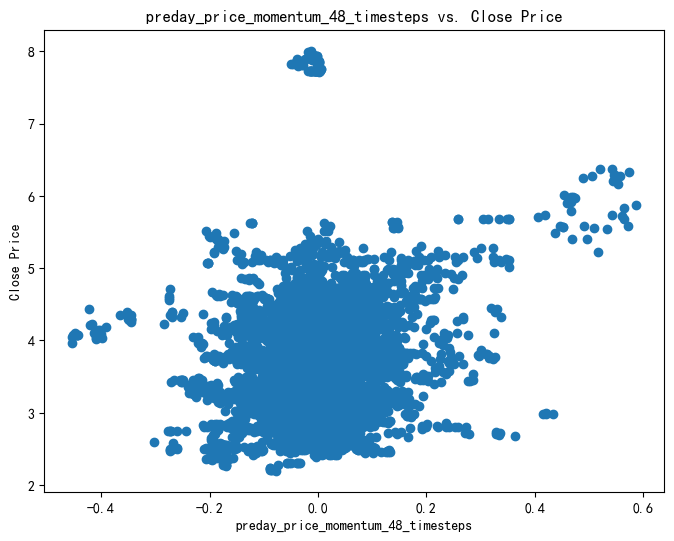

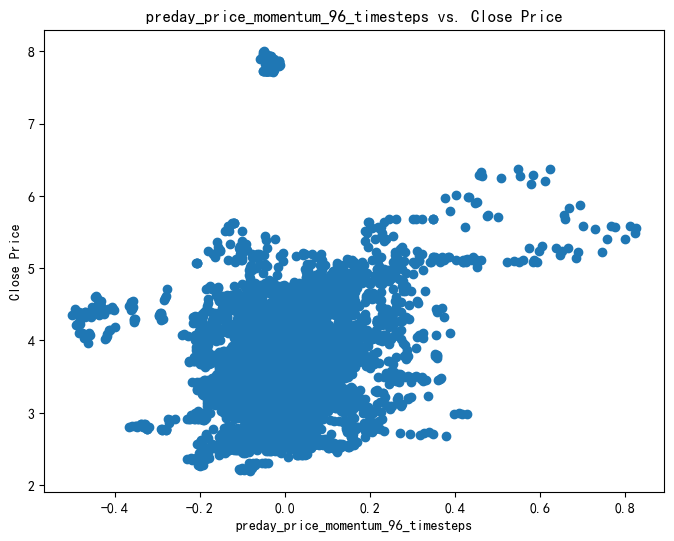

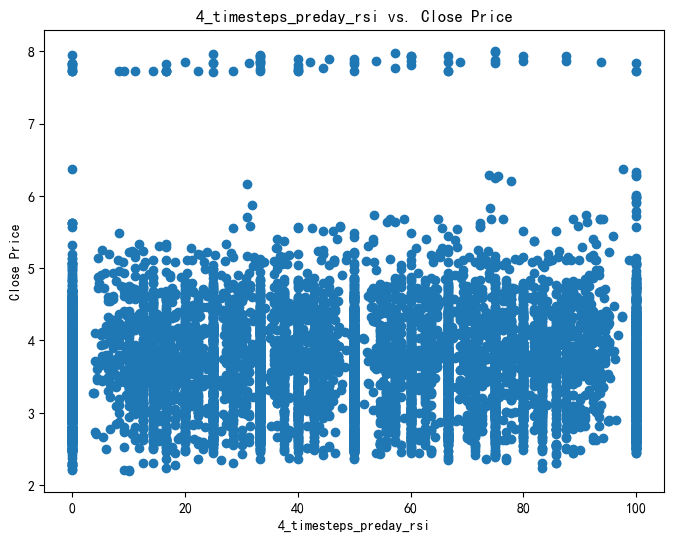

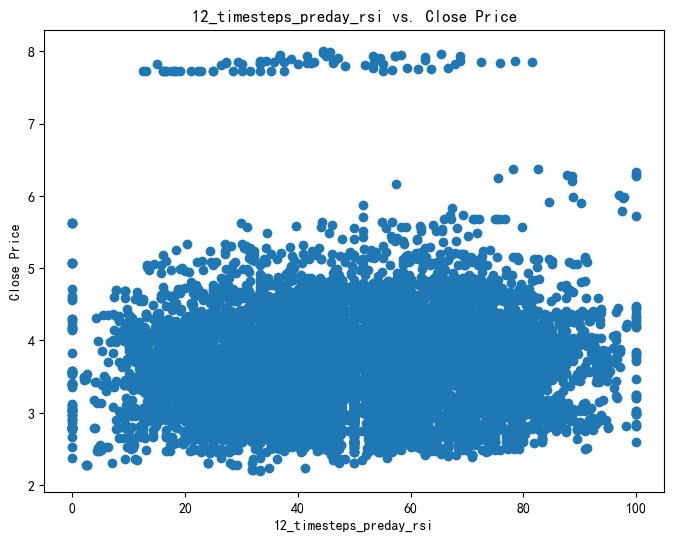

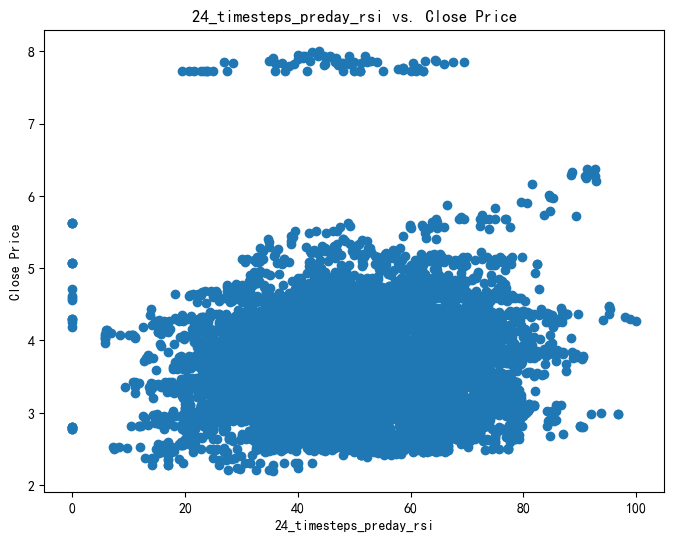

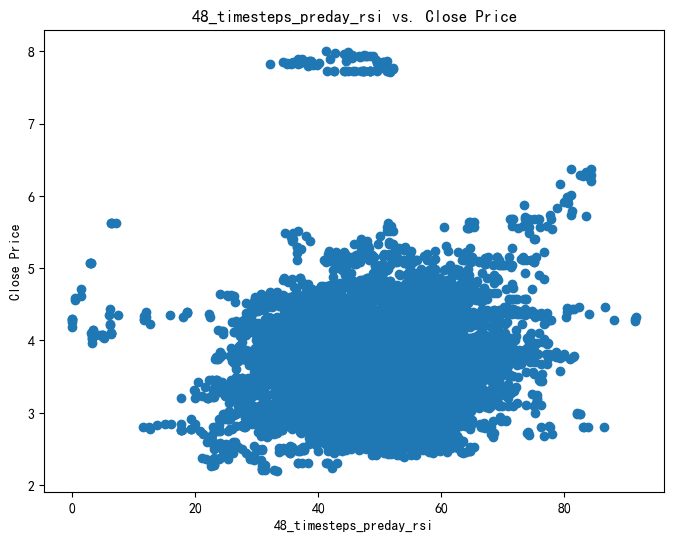

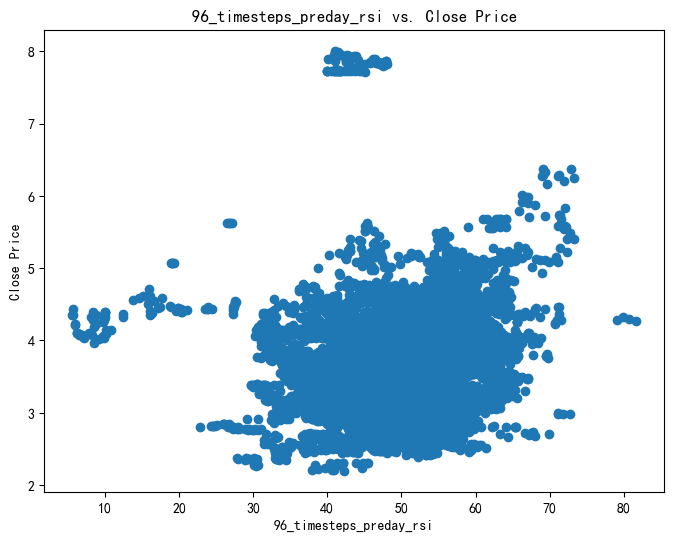

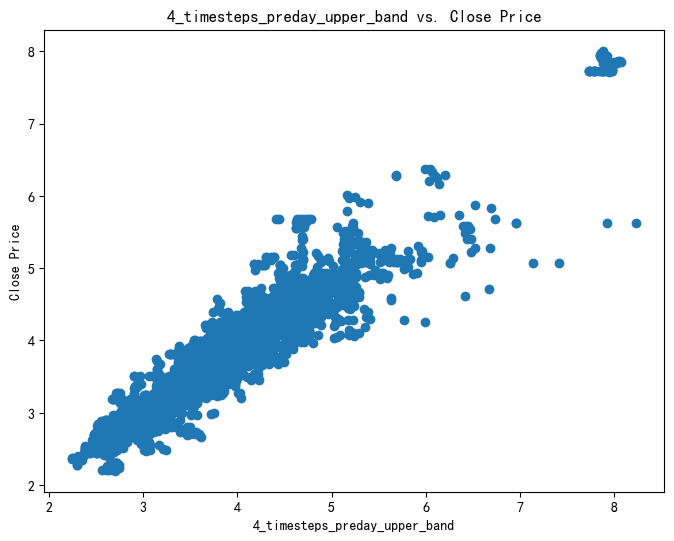

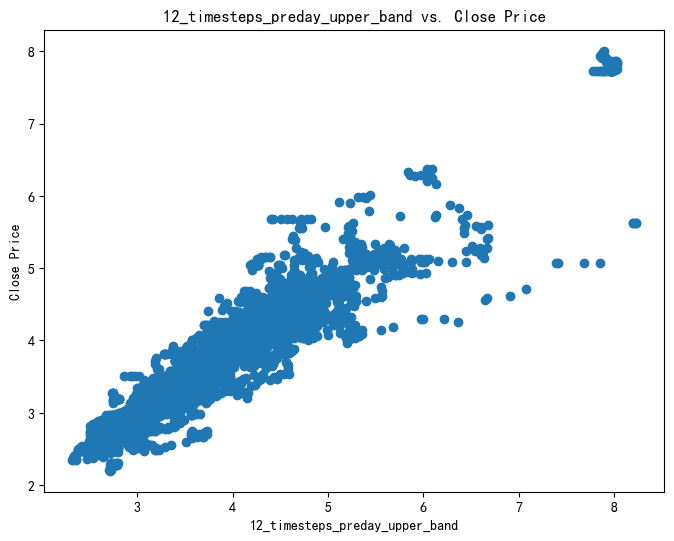

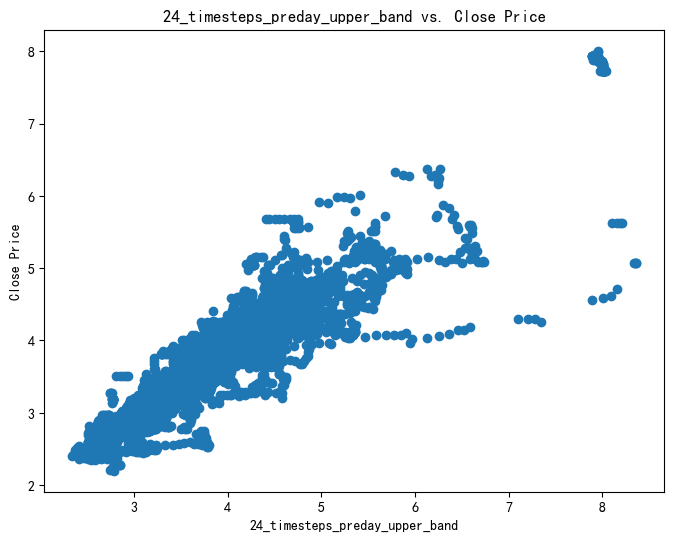

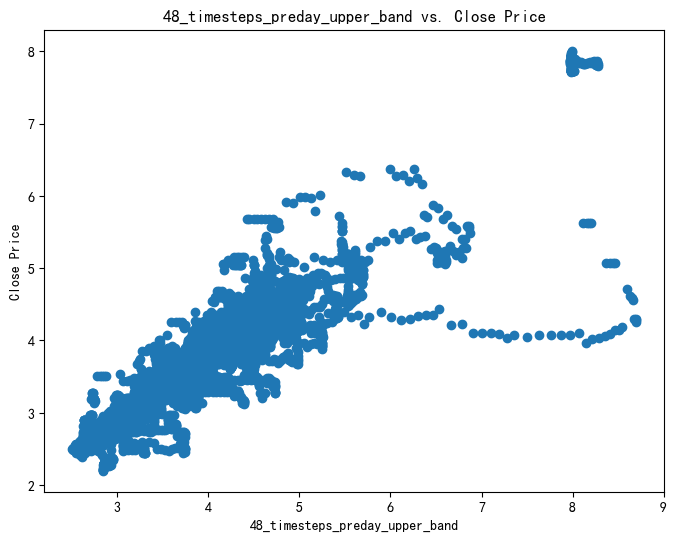

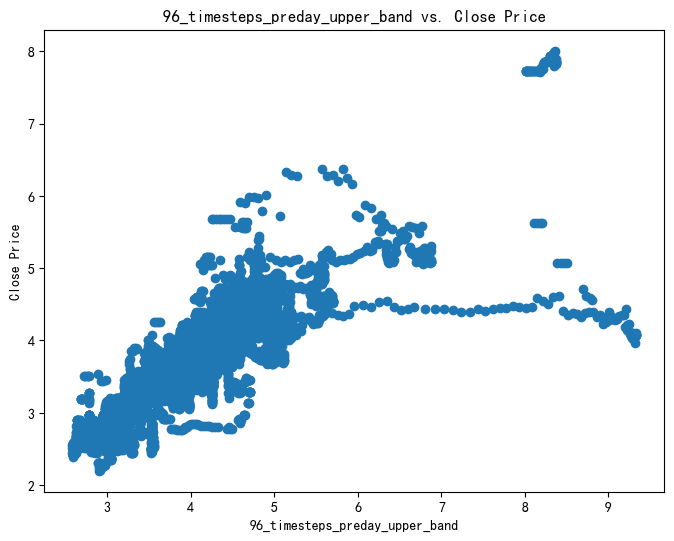

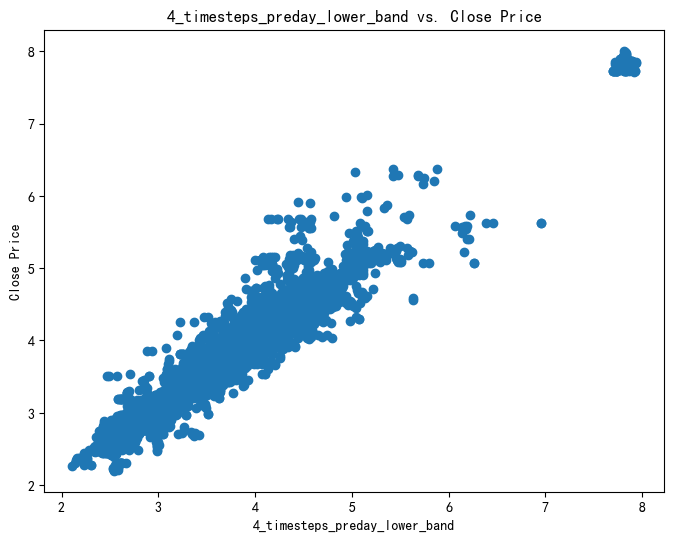

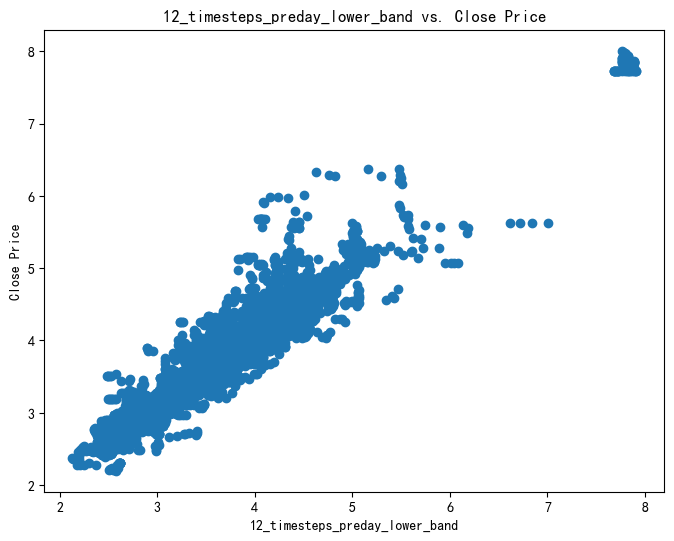

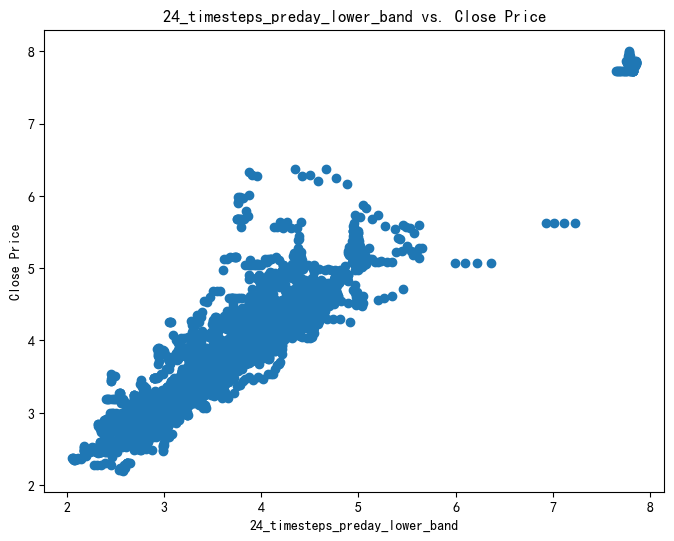

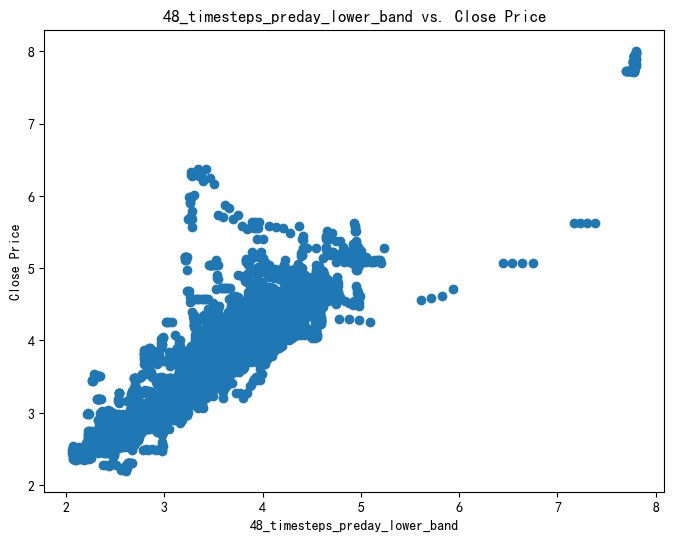

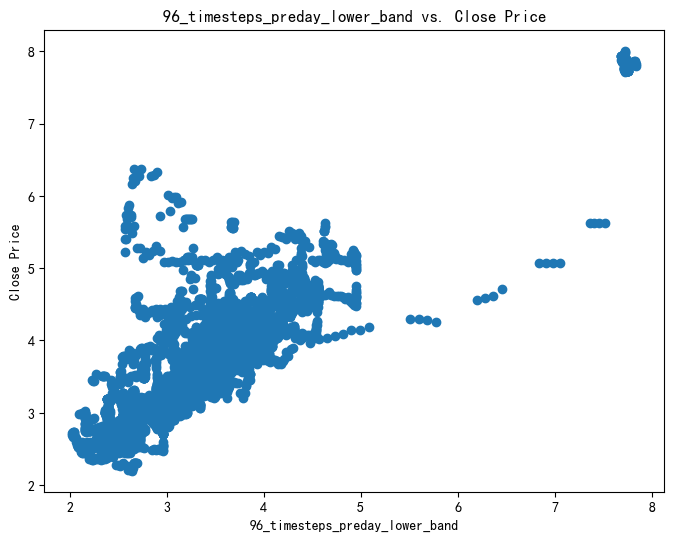

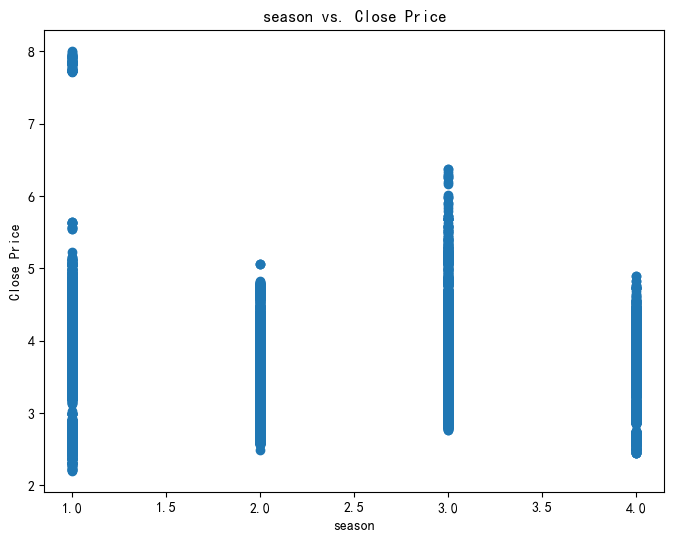

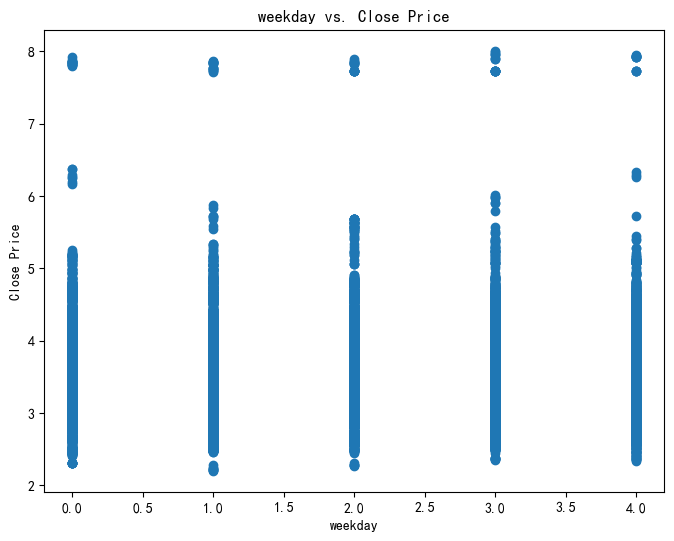

In [33]:
# Plotting the relationship between numerical features and the target individually
for feature in numeric_feature_columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(X_002069[feature], y_002069)
    plt.xlabel(feature)
    plt.ylabel('Close Price')
    plt.title(f'{feature} vs. Close Price')
    plt.show()

In [34]:
# # Plotting the scatter plot matrix
# sns.pairplot(hourly_df_002069_trainset[numeric_feature_columns])
# plt.show()

(3) Visualizing feature patterns for Shanghai and Shenzhen 300 Index:

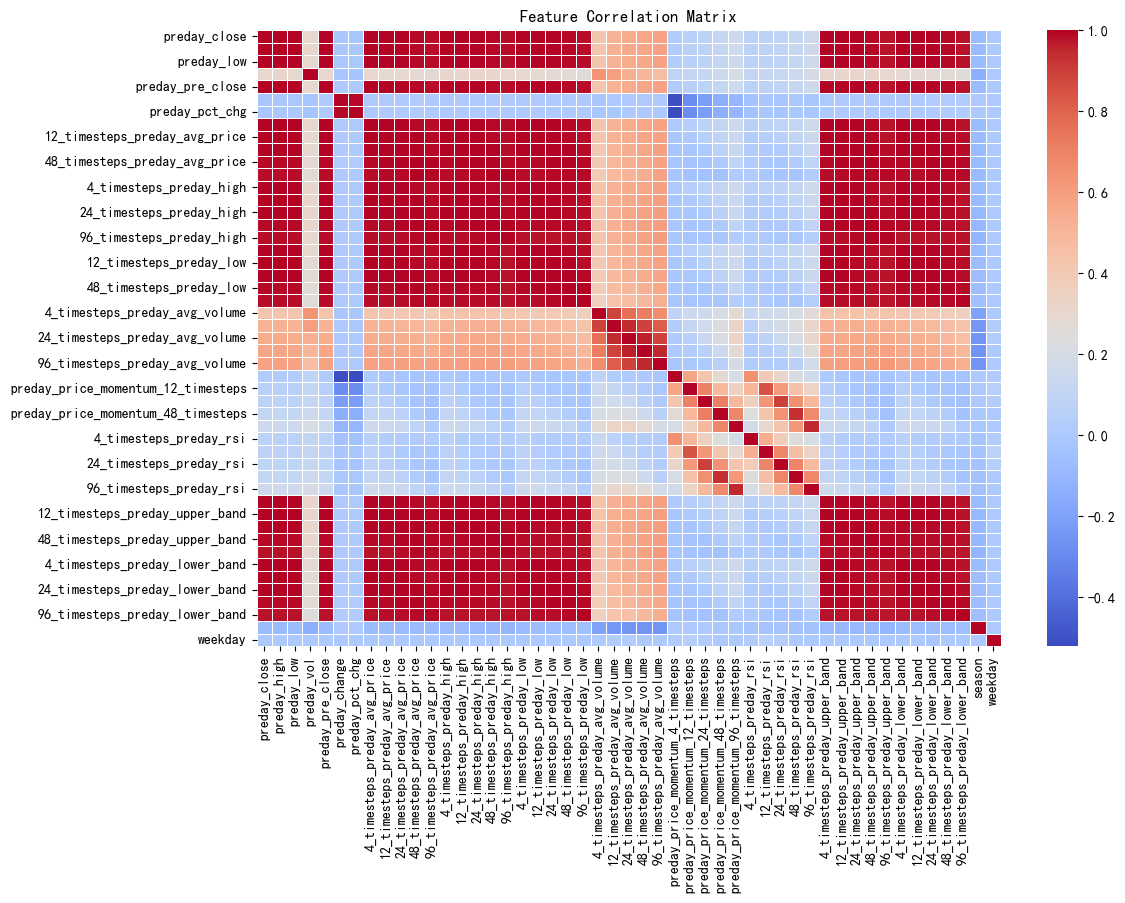

In [35]:
# Selecting numerical features
numeric_feature_columns = X_000300.select_dtypes(include=[np.number]).columns

# Visualizing the correlation matrix of feature vectors
correlation_matrix = X_000300[numeric_feature_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

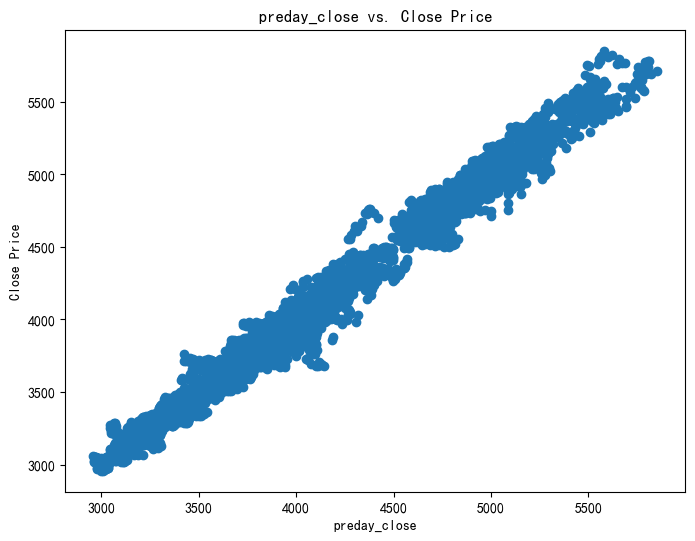

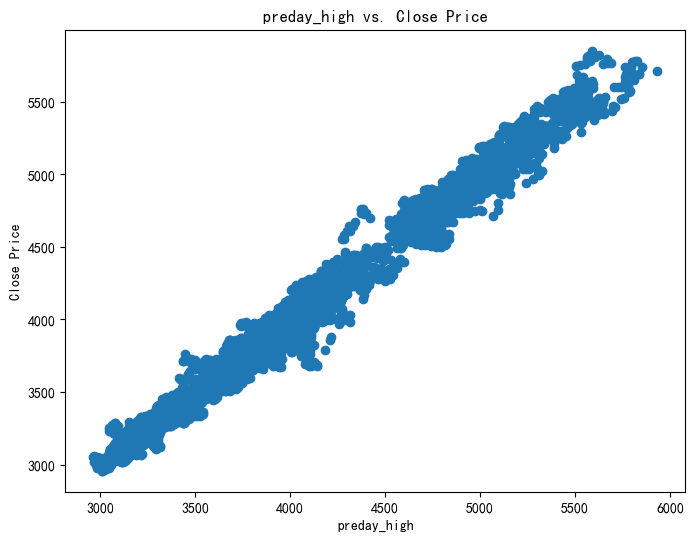

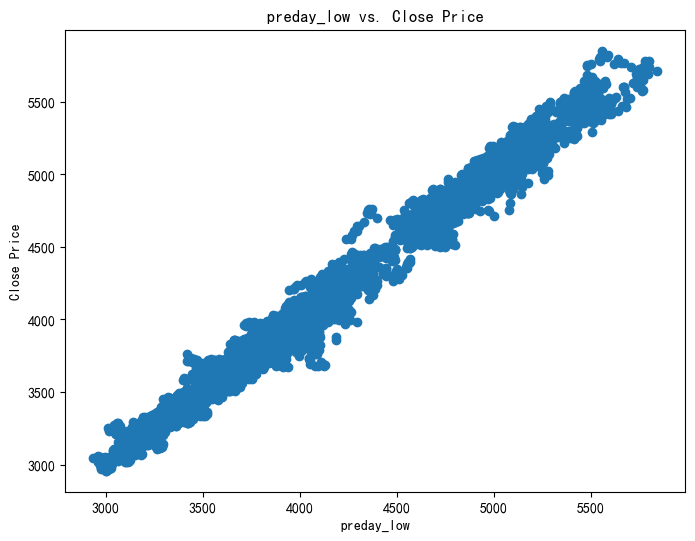

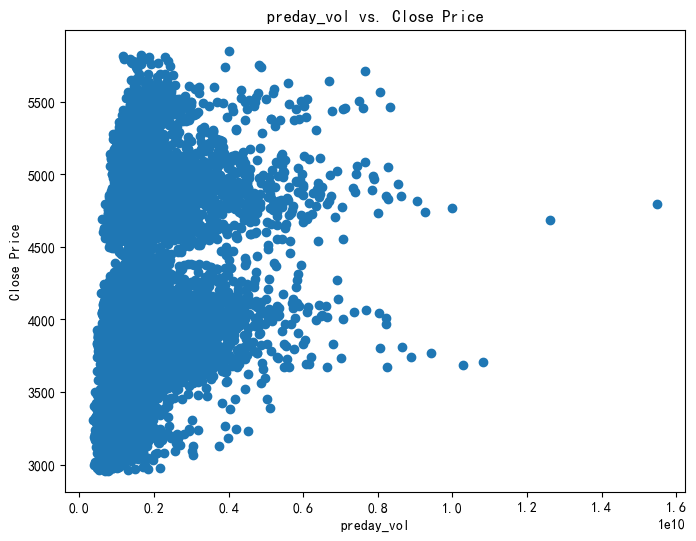

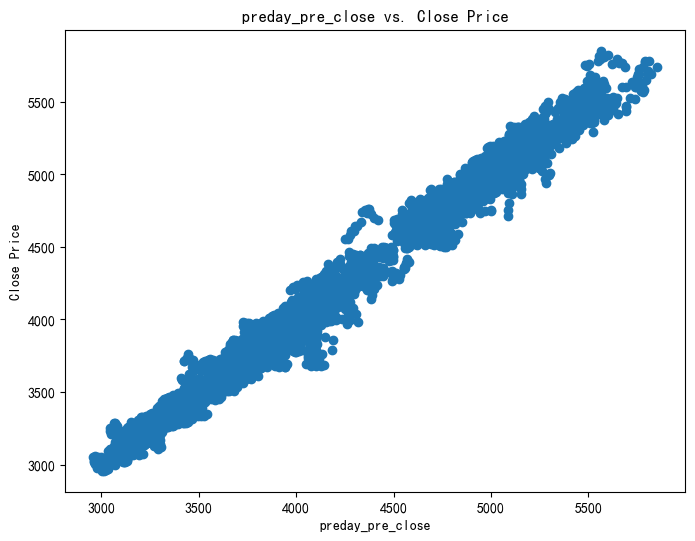

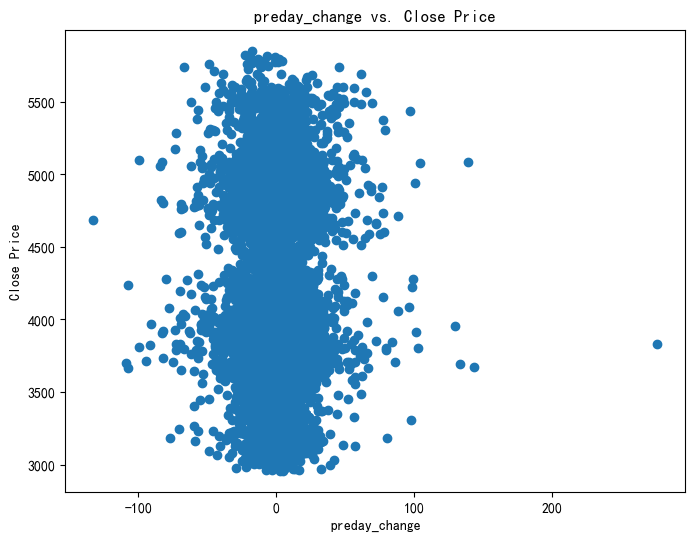

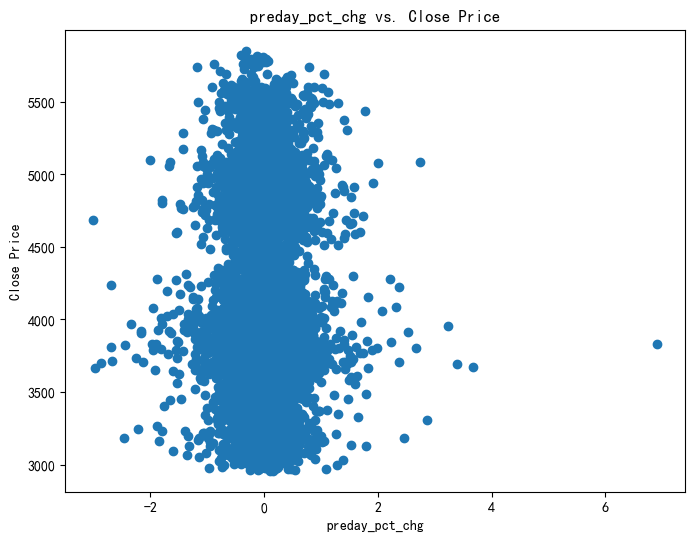

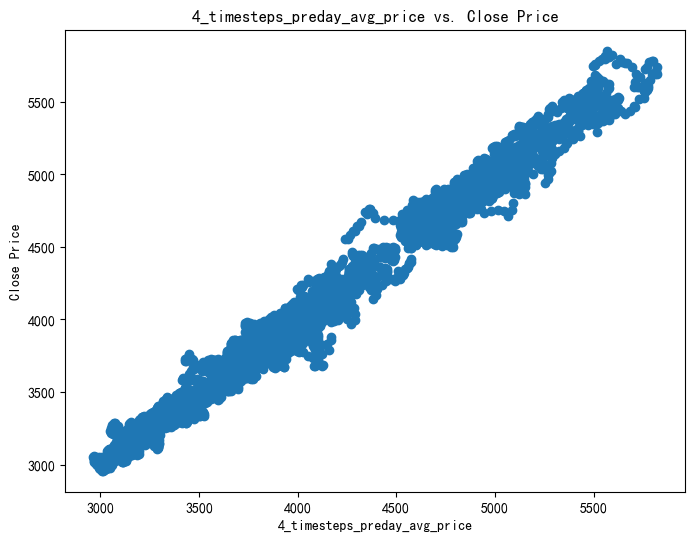

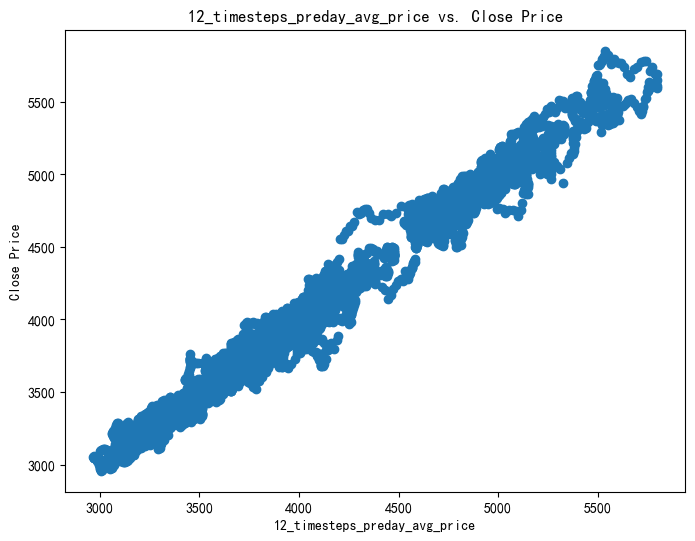

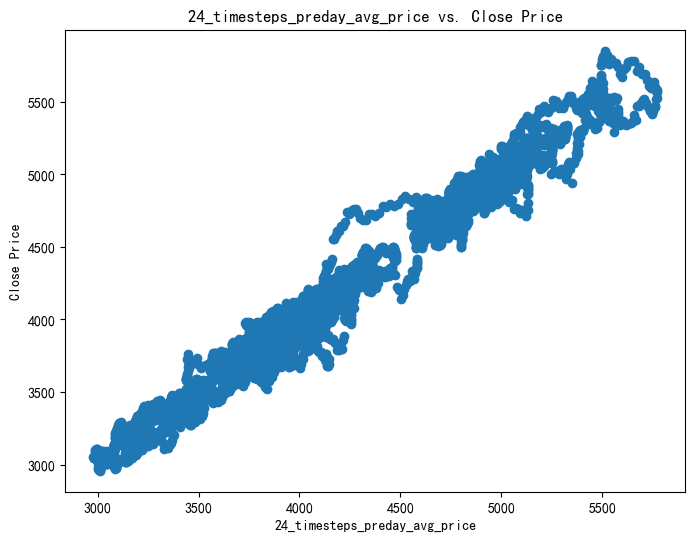

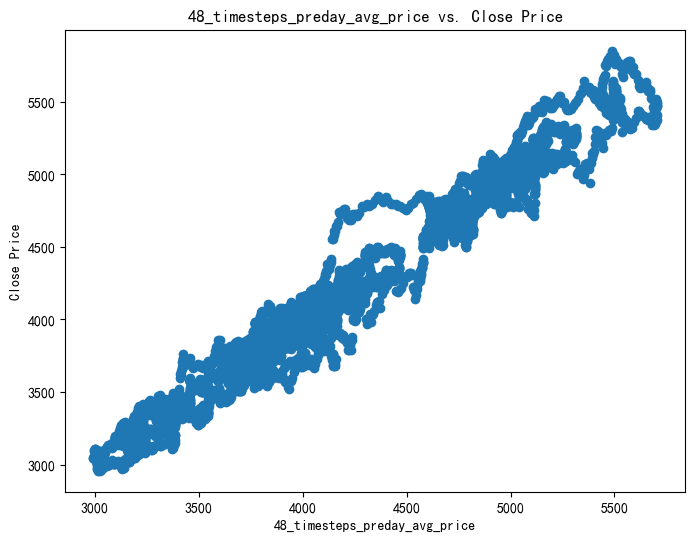

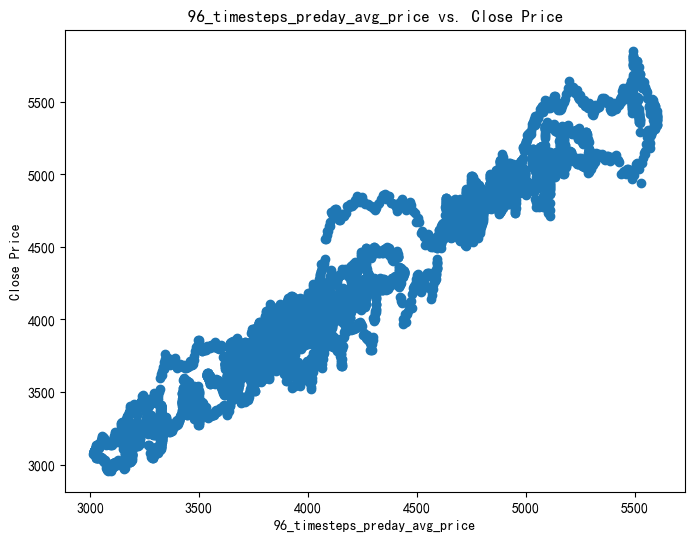

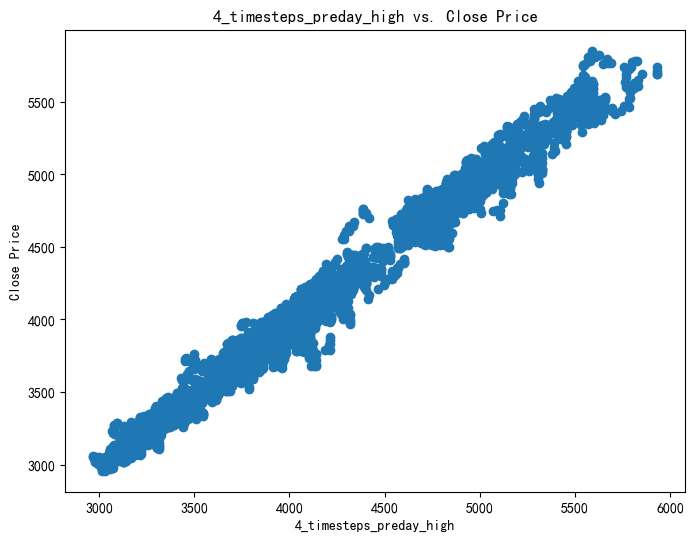

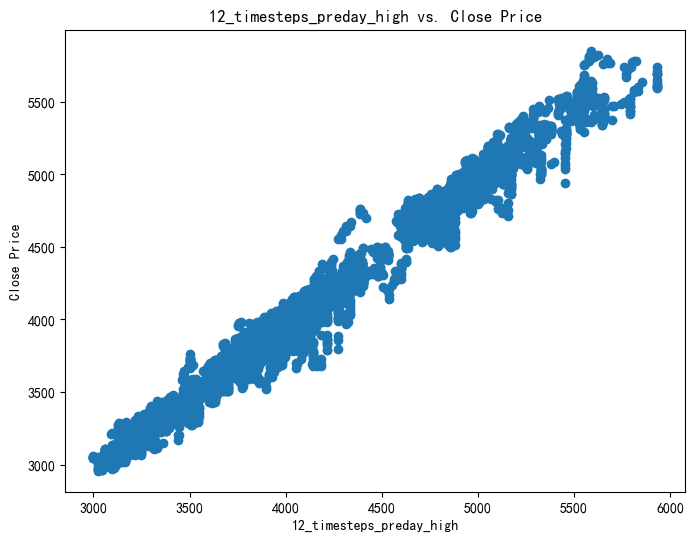

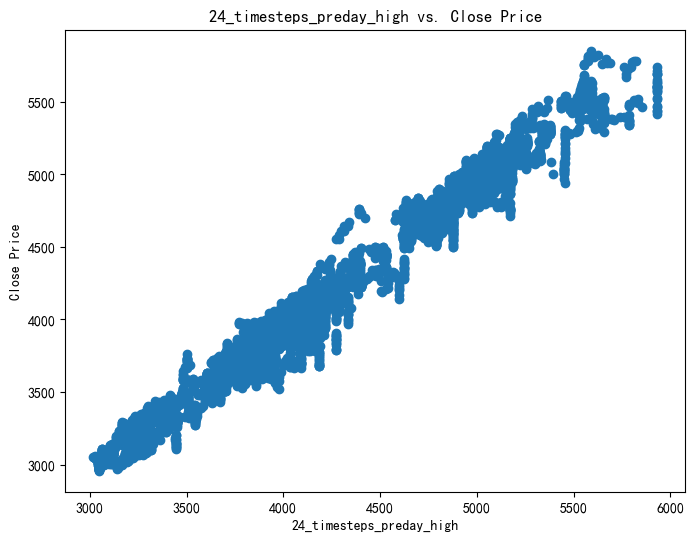

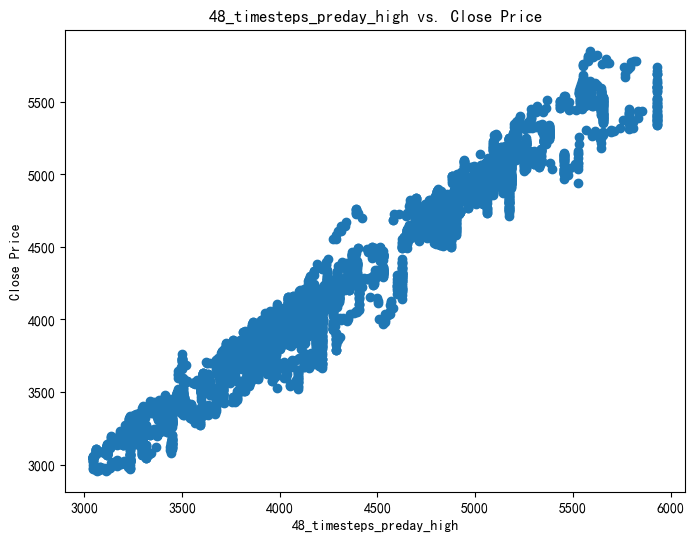

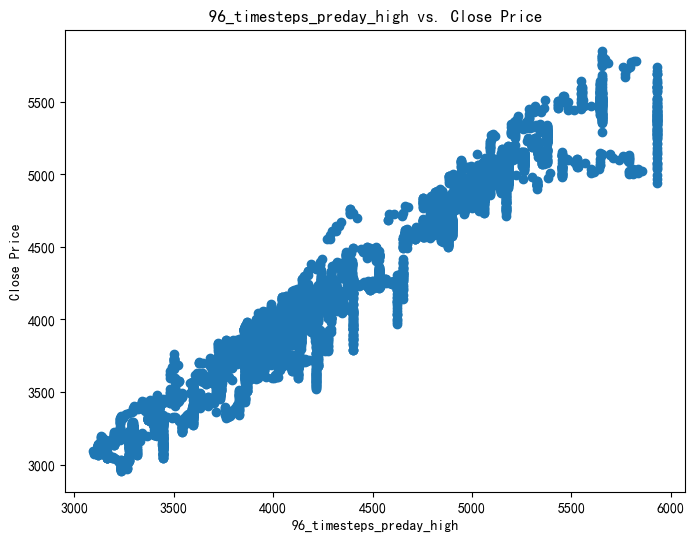

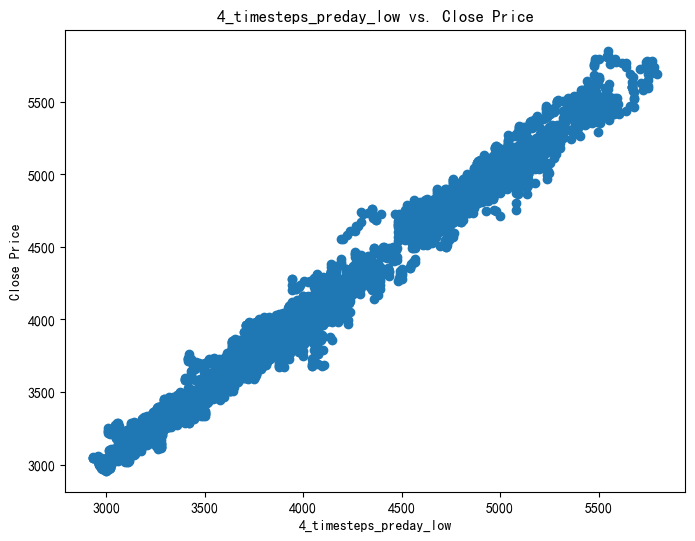

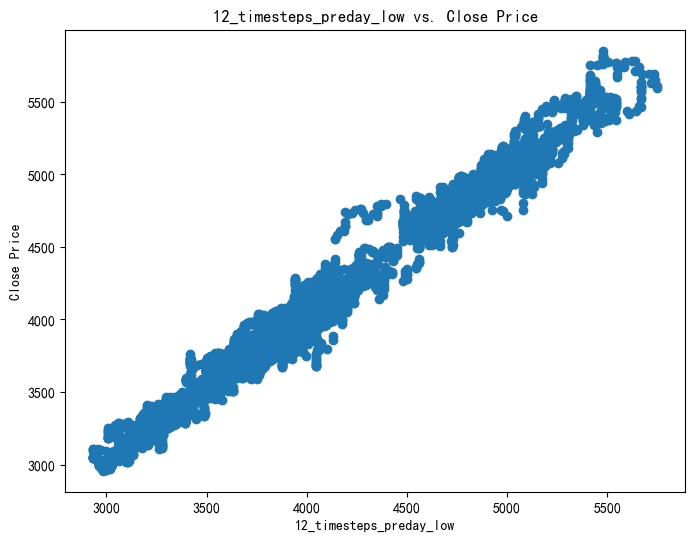

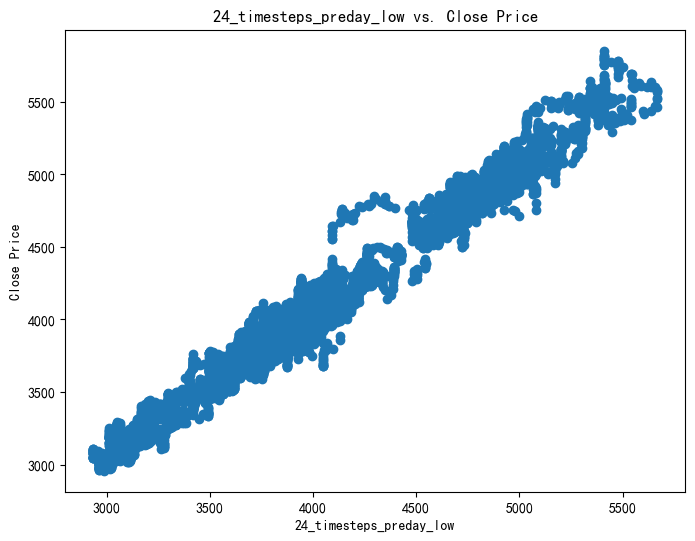

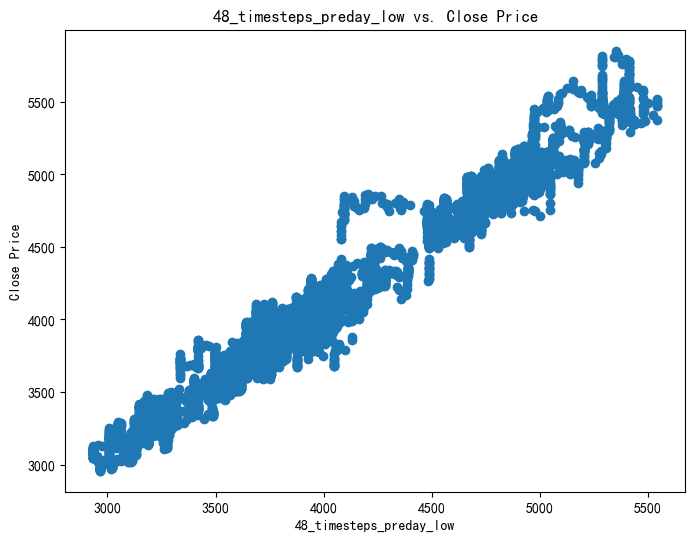

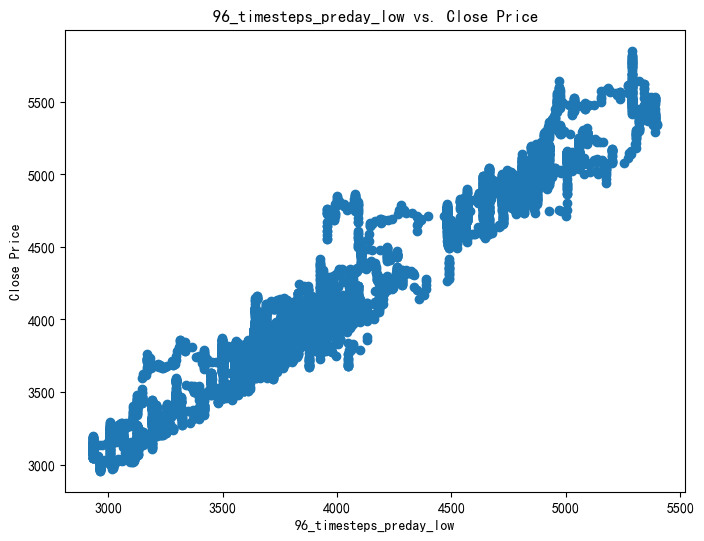

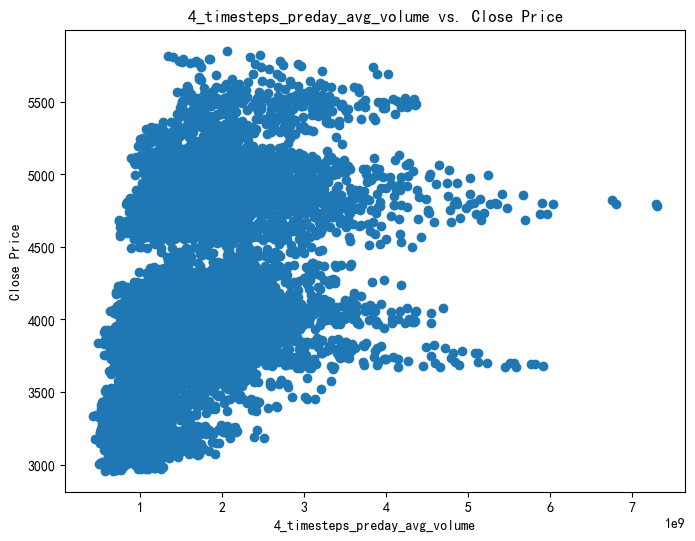

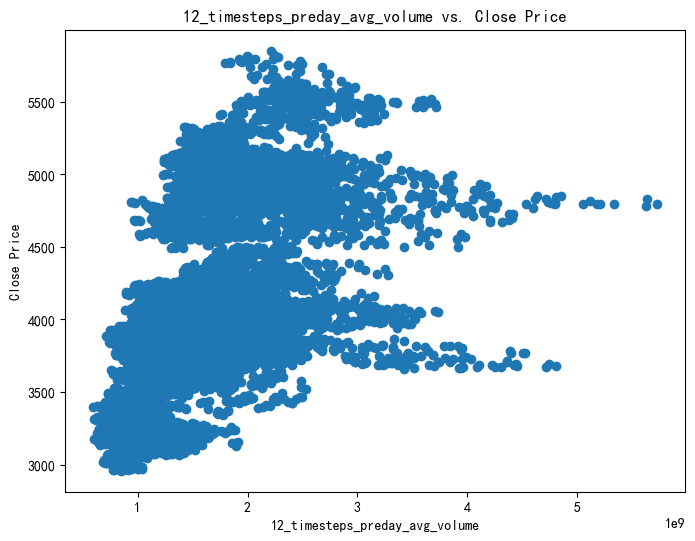

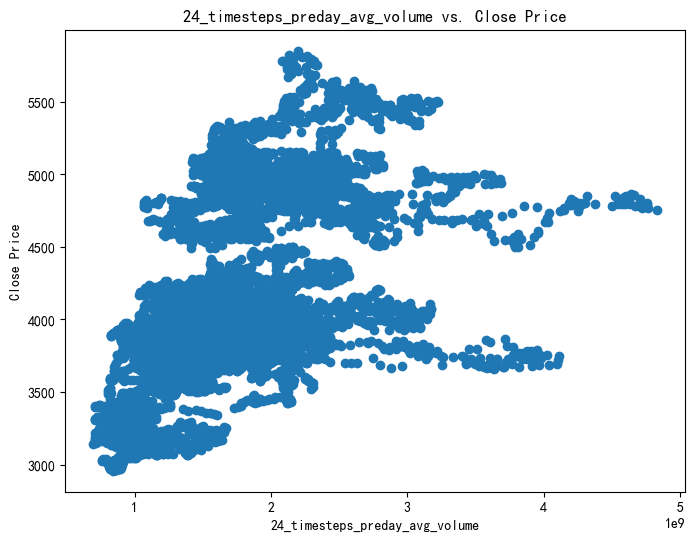

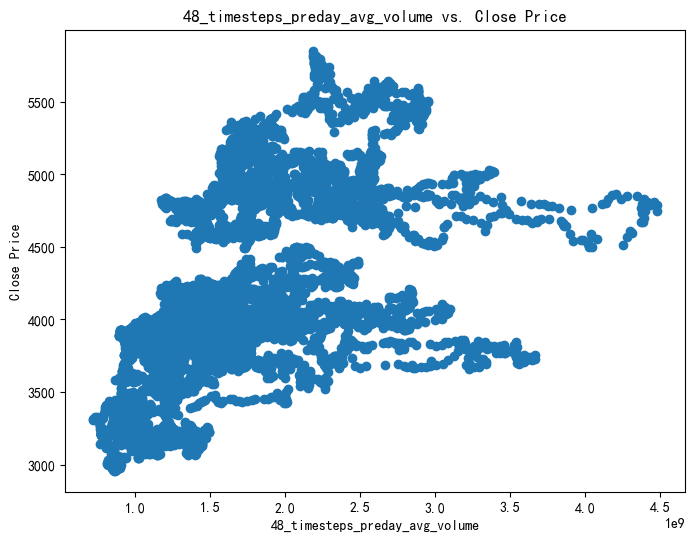

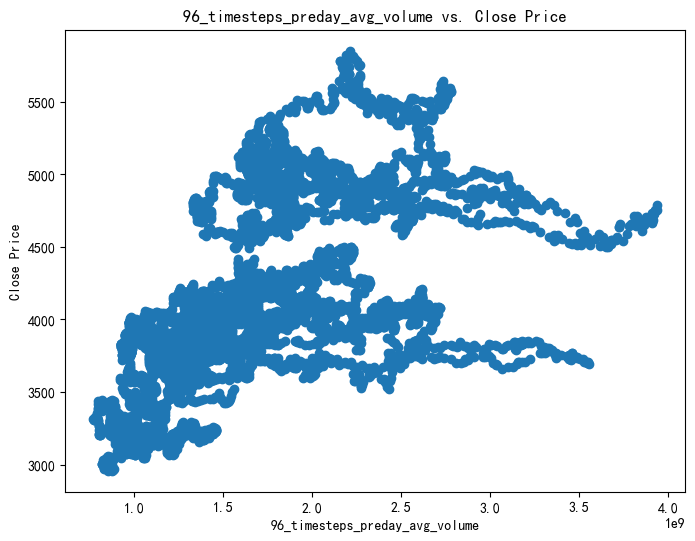

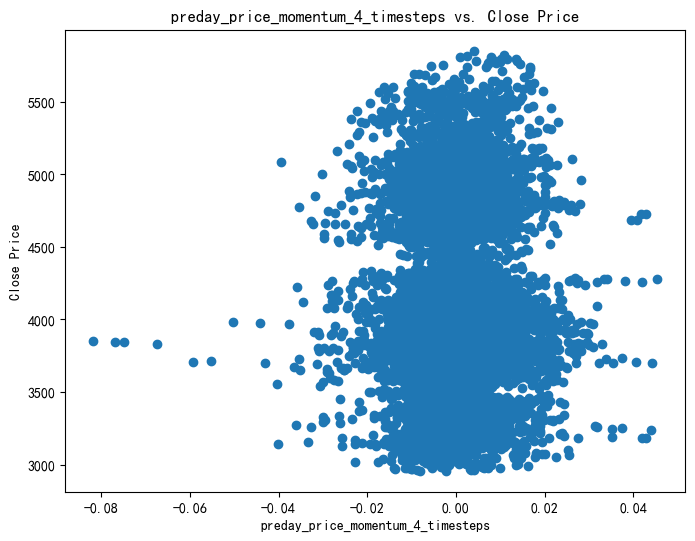

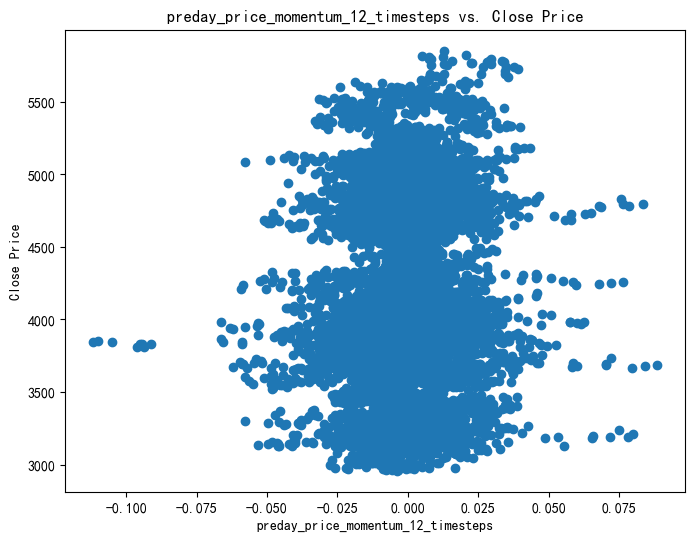

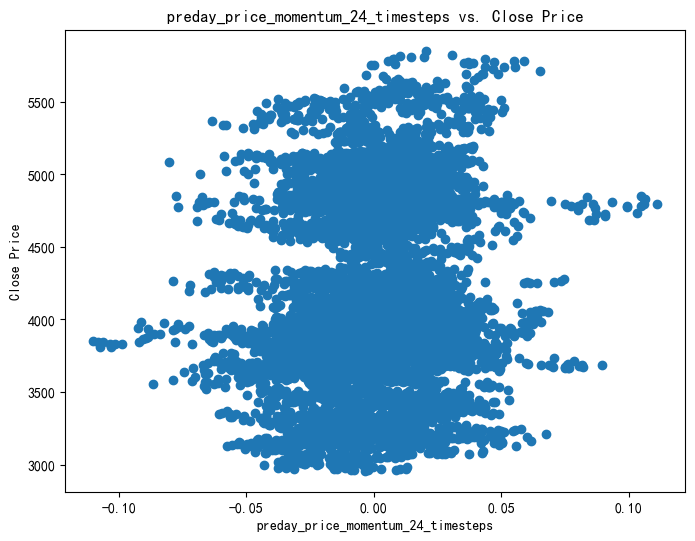

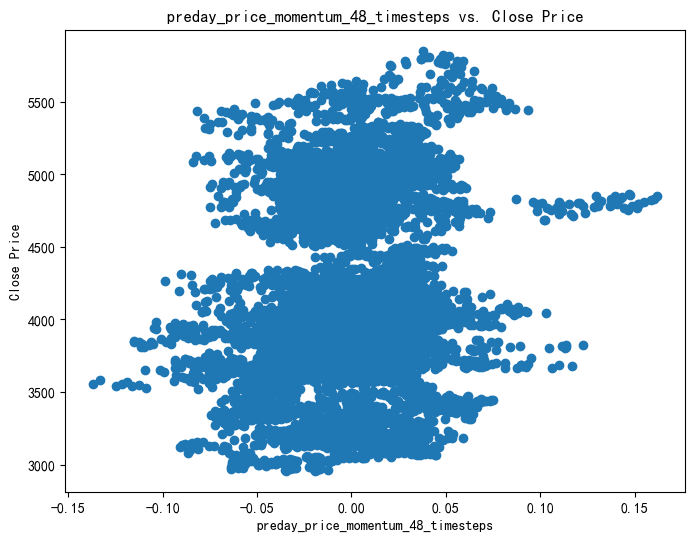

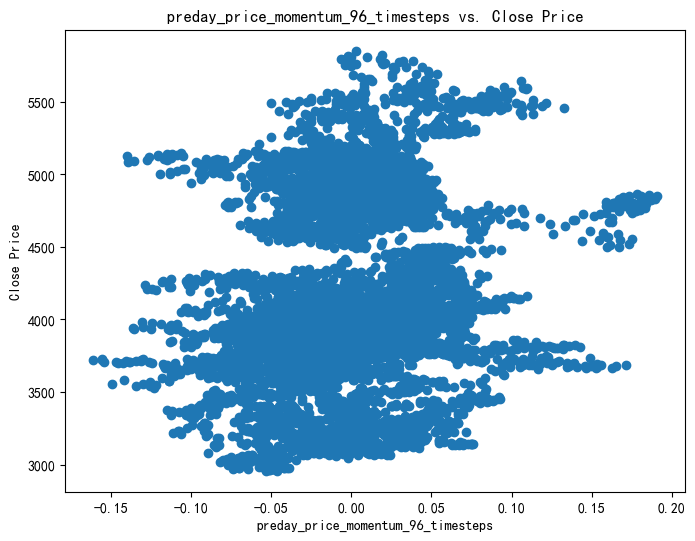

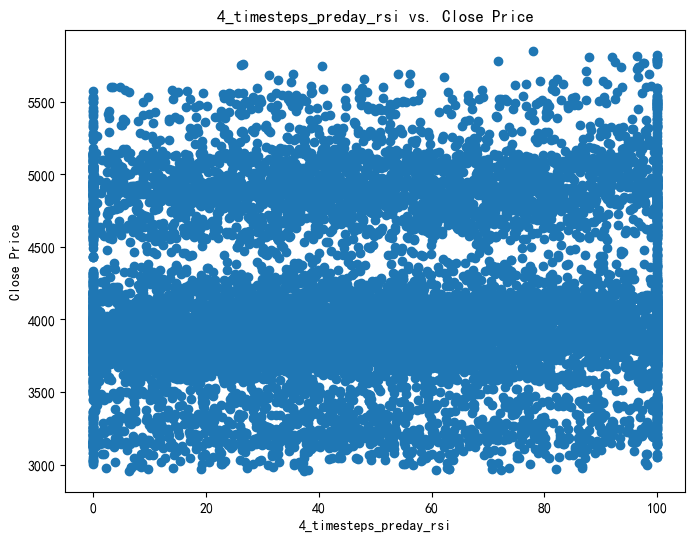

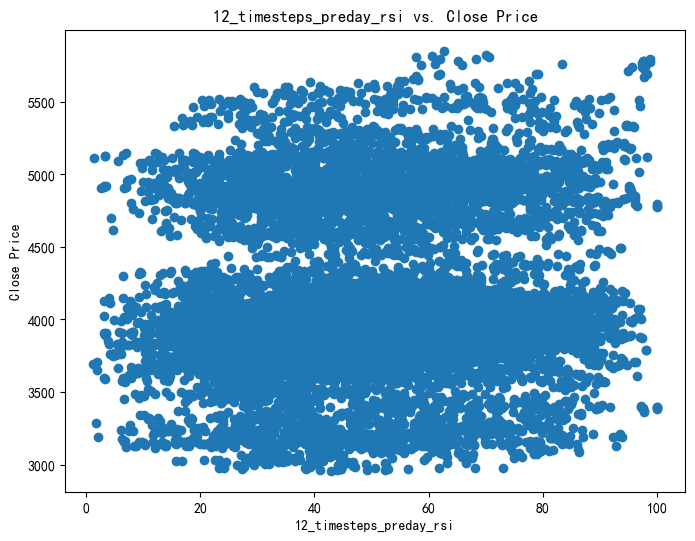

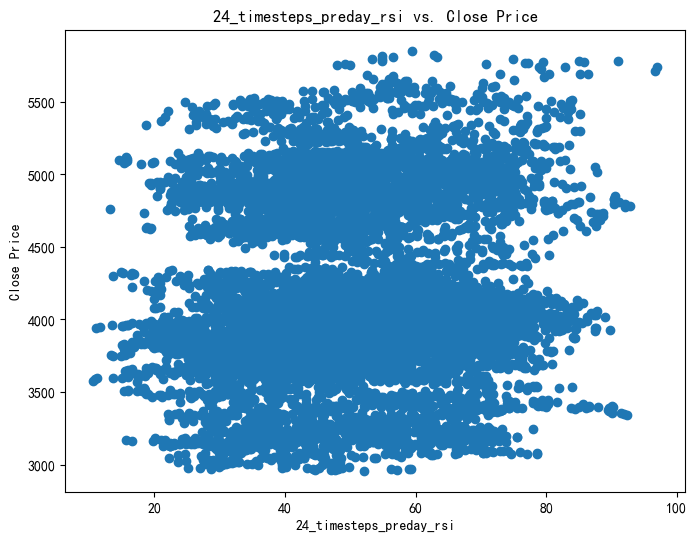

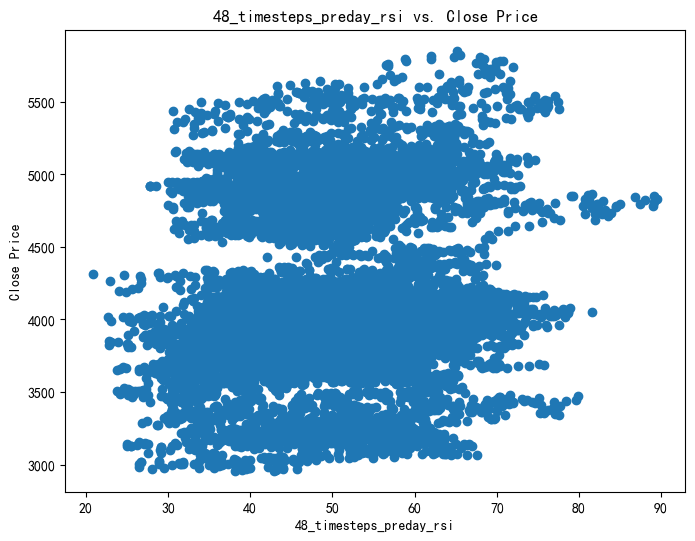

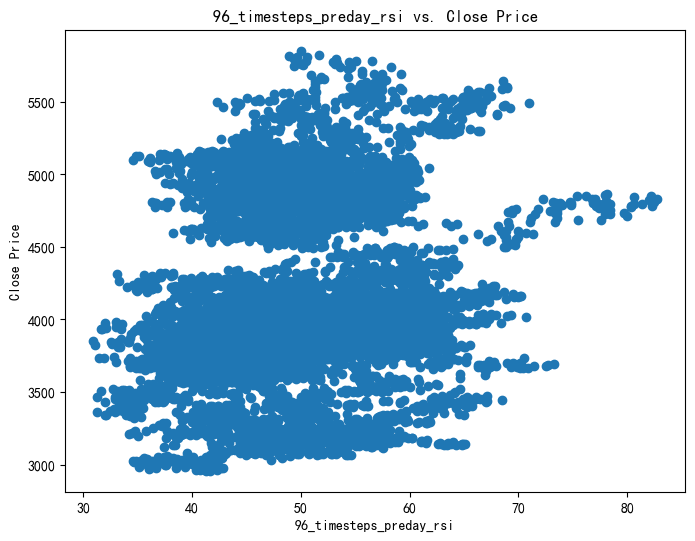

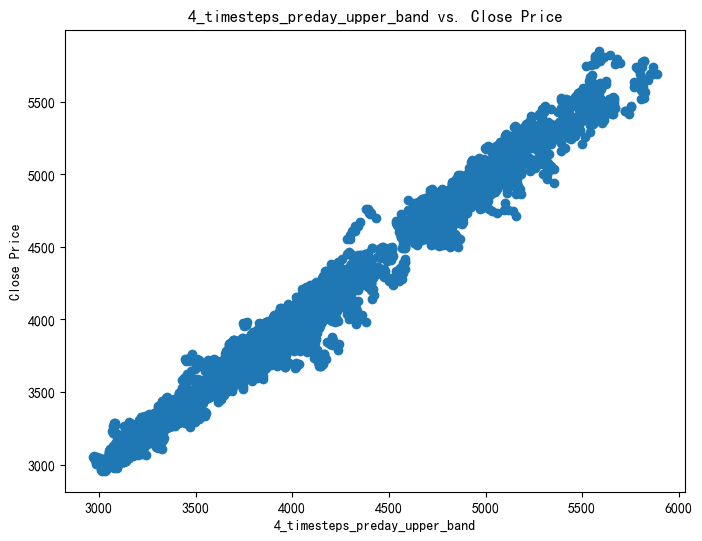

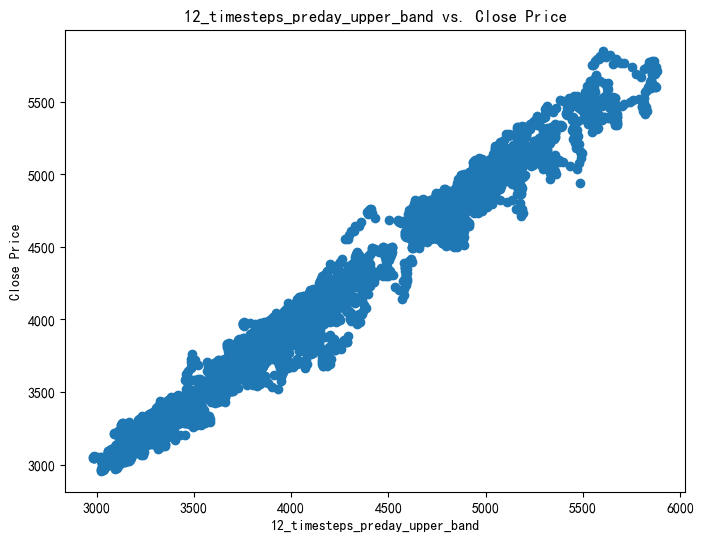

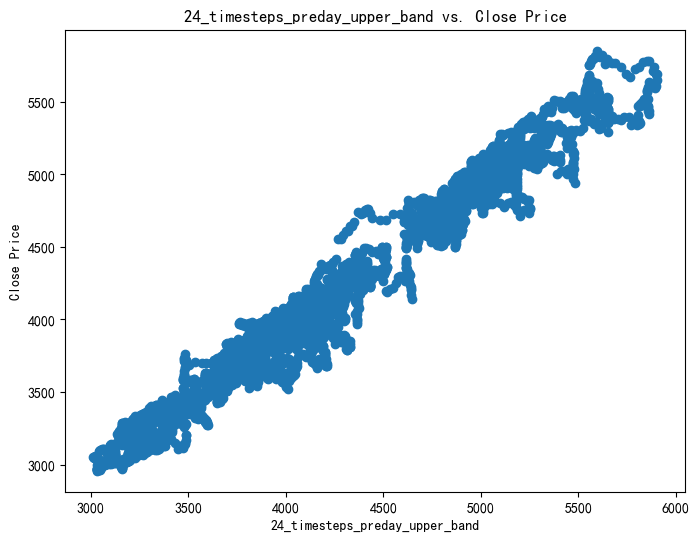

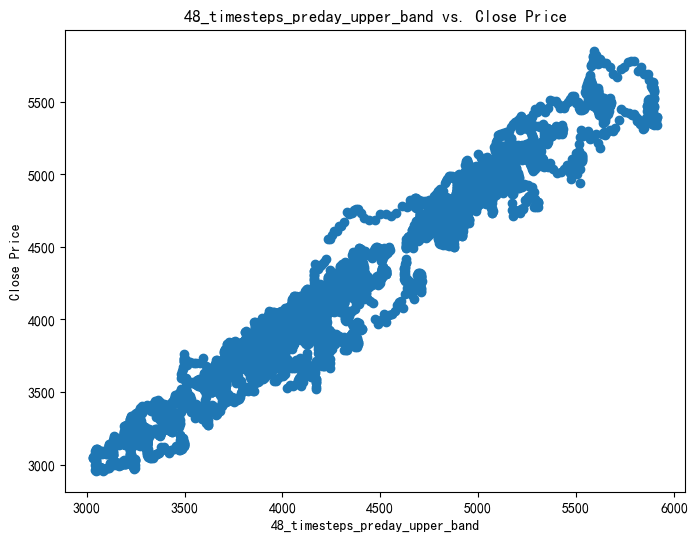

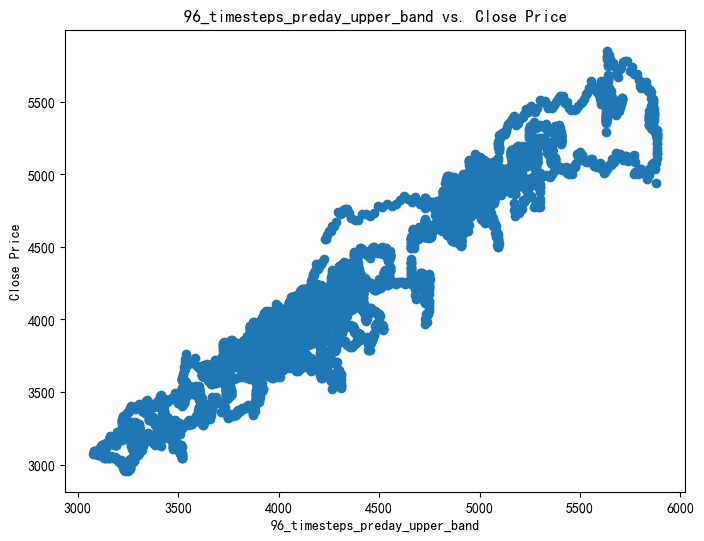

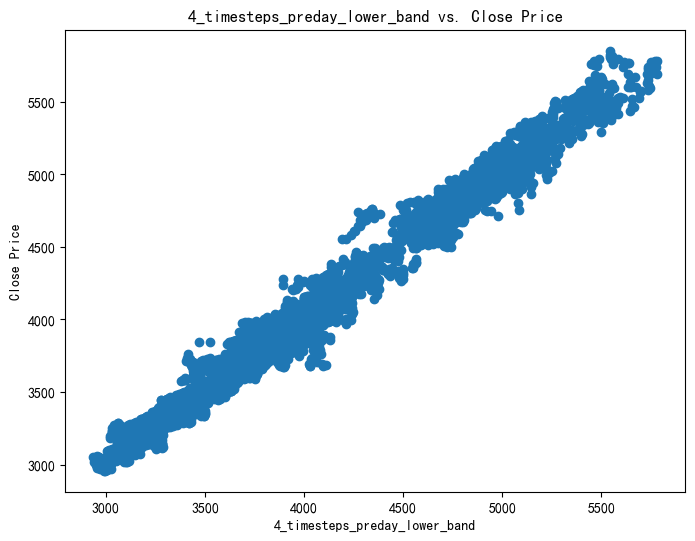

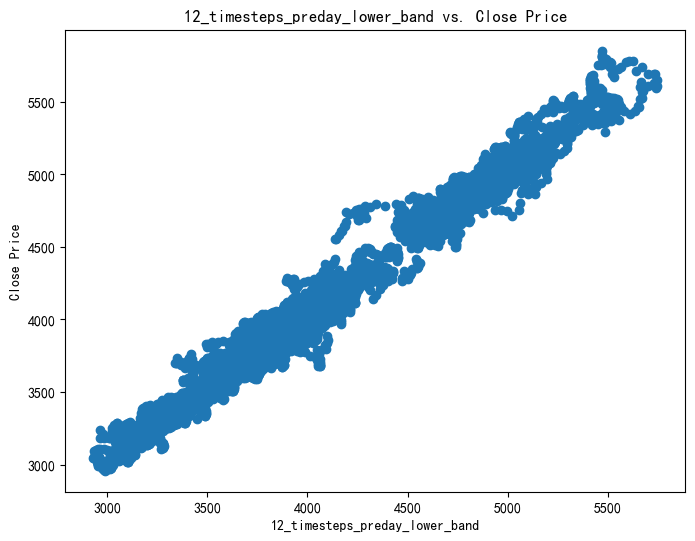

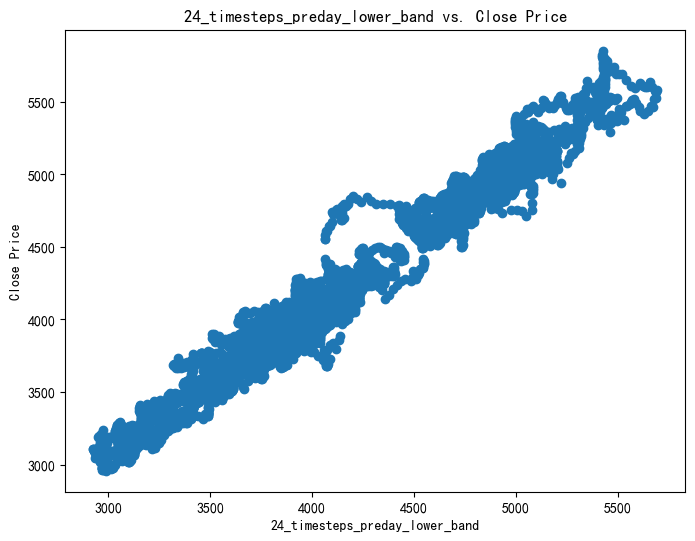

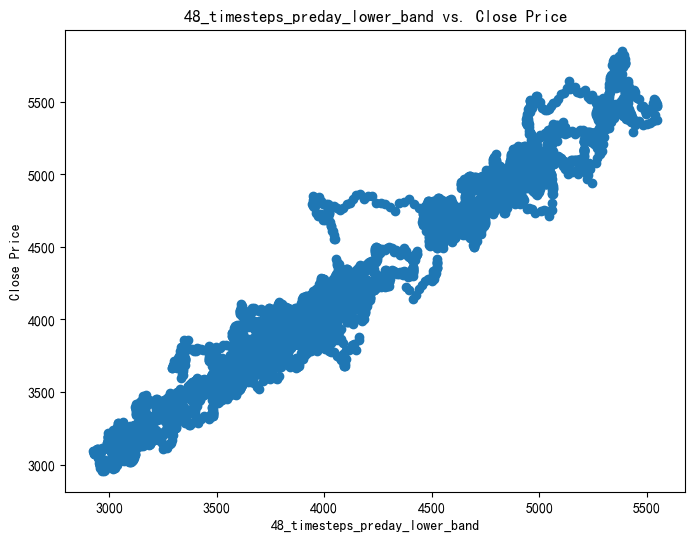

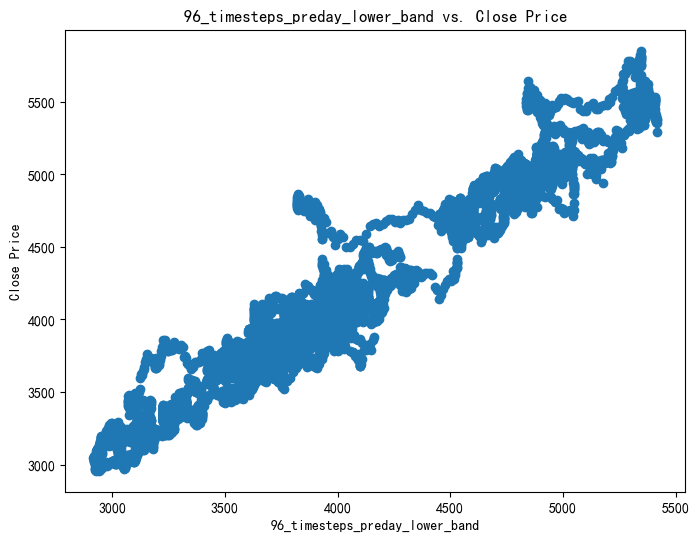

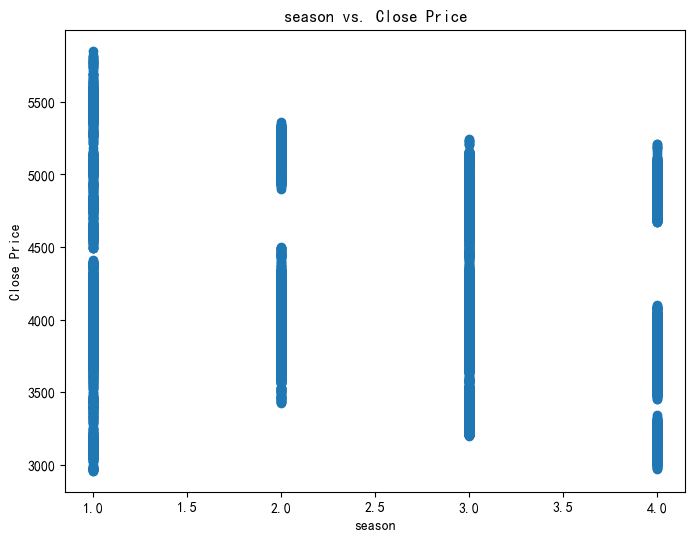

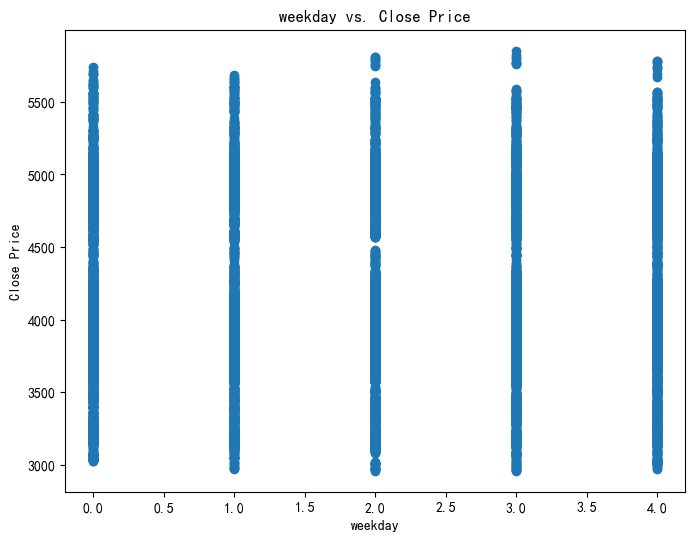

In [36]:
# Plotting the relationship between numerical features and the target individually
for feature in numeric_feature_columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(X_000300[feature], y_000300)
    plt.xlabel(feature)
    plt.ylabel('Close Price')
    plt.title(f'{feature} vs. Close Price')
    plt.show()

In [37]:
# # Plotting the scatter plot matrix
# sns.pairplot(hourly_df_000300_trainset[numeric_feature_columns])
# plt.show()

## 4. Model

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

### 4.1. Train and evaluate the stock prediction model for Kweichow Moutai

In [39]:
# Build the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_600519[16:], y_600519[:-16], test_size=0.01, shuffle=False)

# Build a linear regression model
model_600519 = LinearRegression()

# Train the model
model_600519.fit(X_train, y_train)

LinearRegression()

Mean Squared Error: 0.031394623027178846


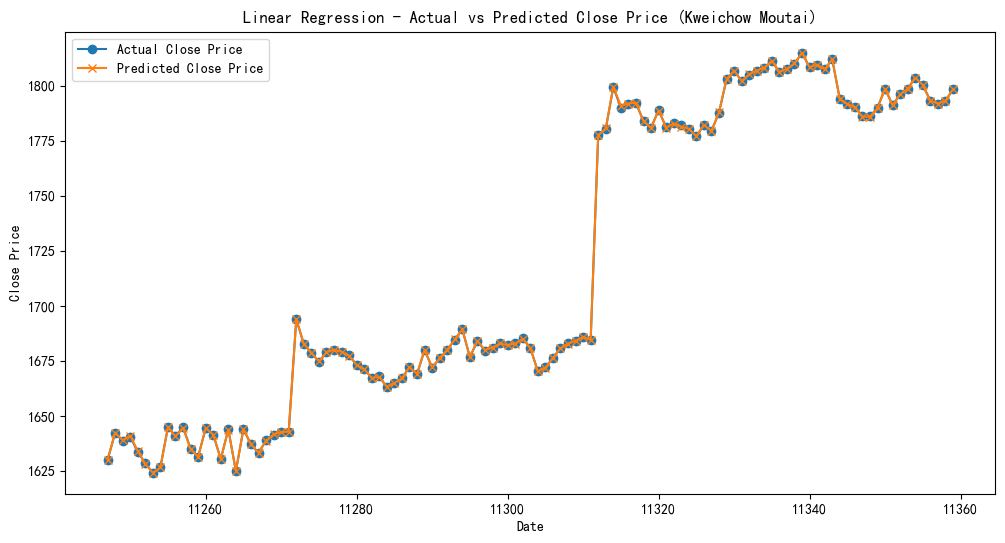

In [40]:
# Make predictions on the test set
y_pred = model_600519.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize the prediction results
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Close Price', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted Close Price', marker='x')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Linear Regression - Actual vs Predicted Close Price (Kweichow Moutai)')
plt.legend()
plt.show()

### 4.2. Train and evaluate the stock prediction model for Zhangzidao

In [41]:
# Build the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_002069[16:], y_002069[:-16], test_size=0.01, shuffle=False)

# Build a linear regression model
model_002069 = LinearRegression()

# Train the model
model_002069.fit(X_train, y_train)

LinearRegression()

Mean Squared Error: 0.0005174898096035782


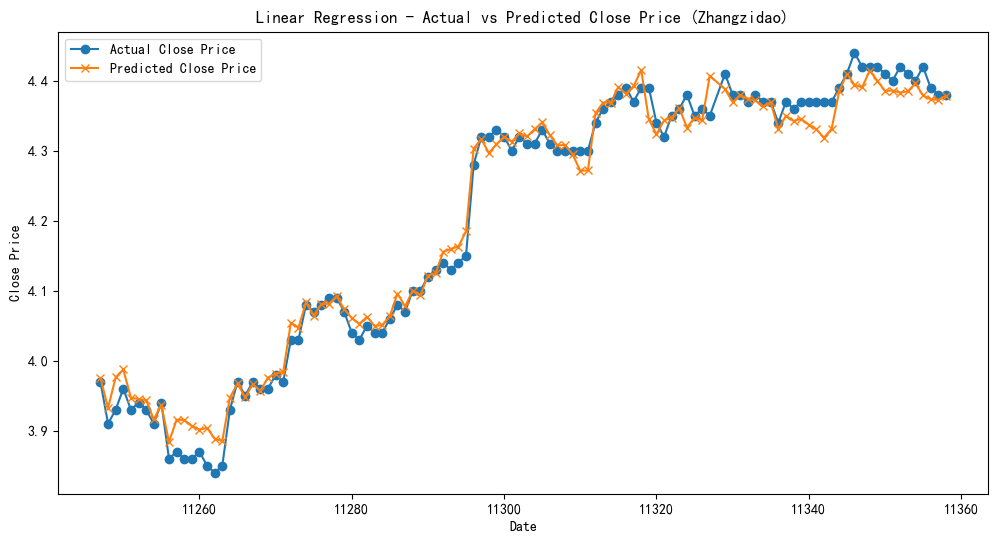

In [42]:
# Make predictions on the test set
y_pred = model_002069.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize the prediction results
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Close Price', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted Close Price', marker='x')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Linear Regression - Actual vs Predicted Close Price (Zhangzidao)')
plt.legend()
plt.show()

### 4.3. Train and evaluate the stock prediction model for Shanghai and Shenzhen 300 Index

In [43]:
# Build the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_000300[16:], y_000300[:-16], test_size=0.01, shuffle=False)

# Build a linear regression model
model_000300 = LinearRegression()

# Train the model
model_000300.fit(X_train, y_train)

LinearRegression()

Mean Squared Error: 4.417429409133554e-20


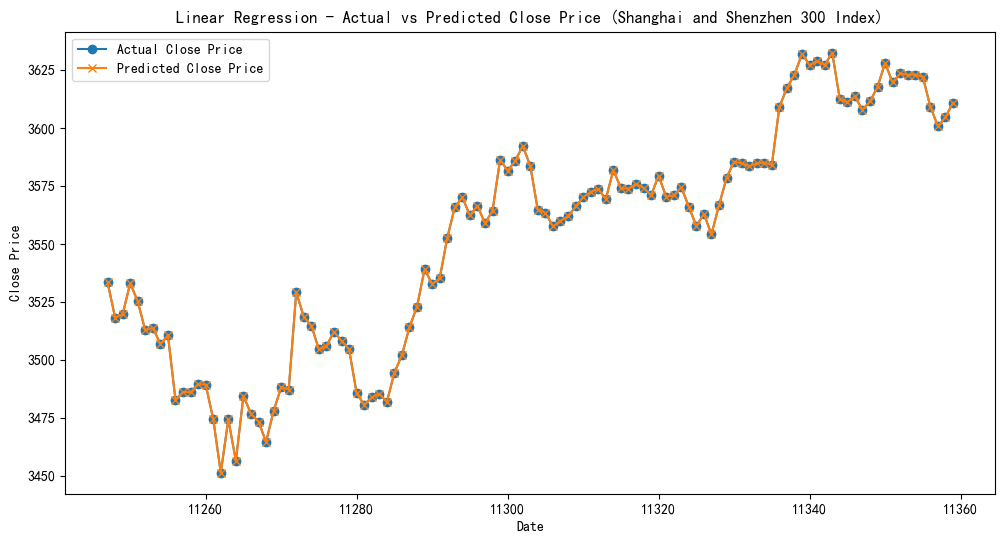

In [44]:
# Make predictions on the test set
y_pred = model_000300.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize the prediction results
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Close Price', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted Close Price', marker='x')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Linear Regression - Actual vs Predicted Close Price (Shanghai and Shenzhen 300 Index)')
plt.legend()
plt.show()

<span style="font-size: 40px; color: blue; font-weight: bold;">**5. Hourly Prediction:**</span>

In [45]:
def Feature_generation_for_prediction(df_prediction):
    hourly_df = df_prediction.copy()
    
    # Feature engineering
    # Get Preday Basic Feature
    hourly_df['preday_close'] = hourly_df['close']
    hourly_df['preday_high'] = hourly_df['high']
    hourly_df['preday_low'] = hourly_df['low']
    hourly_df['preday_vol'] = hourly_df['vol']
    hourly_df['preday_pre_close'] = hourly_df['pre_close']
    hourly_df['preday_change'] = hourly_df['change']
    hourly_df['preday_pct_chg'] = hourly_df['pct_chg']
    
    # Calculate Preday Moving Feature
    window_sizes = [4, 12, 24, 48, 96]
    for window_size in window_sizes:
        # Calculate average price in several size of window
        hourly_df[f'{window_size}_timesteps_preday_avg_price'] = hourly_df['preday_close'].rolling(window=window_size).mean()
        # Calculate high price in several size of window
        hourly_df[f'{window_size}_timesteps_preday_high'] = hourly_df['preday_high'].rolling(window=window_size).max()
        # Calculate low price in several size of window
        hourly_df[f'{window_size}_timesteps_preday_low'] = hourly_df['preday_low'].rolling(window=window_size).min()
        # Calculate average volume in several size of window
        hourly_df[f'{window_size}_timesteps_preday_avg_volume'] = hourly_df['preday_vol'].rolling(window=window_size).mean()
        # Calculate price momentum in several size of window
        hourly_df[f'preday_price_momentum_{window_size}_timesteps'] = hourly_df['preday_close'].pct_change(window_size)

        # Calculate RSI indicator in several size of window
        delta = hourly_df['preday_close'].diff()
        gain = delta.where(delta > 0, 0)
        loss = -delta.where(delta < 0, 0)
        avg_gain = gain.shift(1).rolling(window=window_size).mean()
        avg_loss = loss.shift(1).rolling(window=window_size).mean()
        rsi = 100 - (100 / (1 + (avg_gain / avg_loss)))
        hourly_df[f'{window_size}_timesteps_preday_rsi'] = rsi
    
        # Calculate Bollinger Bands in several size of window
        sma= hourly_df['preday_close'].rolling(window=window_size).mean()
        std = hourly_df['preday_close'].rolling(window=window_size).std()
        hourly_df[f'{window_size}_timesteps_preday_upper_band'] = sma + (2 * std)
        hourly_df[f'{window_size}_timesteps_preday_lower_band'] = sma - (2 * std)

    # Calculate seasonal features
    hourly_df['season'] = hourly_df['trade_date'].dt.quarter
    hourly_df['weekday'] = hourly_df['trade_date'].dt.weekday

    # Build feature vector
    feature_columns =  ['preday_close','preday_high','preday_low','preday_vol','preday_pre_close','preday_change','preday_pct_chg'] + \
                       [f'{window_size}_timesteps_preday_avg_price' for window_size in window_sizes] + \
                       [f'{window_size}_timesteps_preday_high' for window_size in window_sizes] + \
                       [f'{window_size}_timesteps_preday_low' for window_size in window_sizes] + \
                       [f'{window_size}_timesteps_preday_avg_volume' for window_size in window_sizes] + \
                       [f'preday_price_momentum_{window_size}_timesteps' for window_size in window_sizes] + \
                       [f'{window_size}_timesteps_preday_rsi' for window_size in window_sizes] + \
                       [f'{window_size}_timesteps_preday_upper_band' for window_size in window_sizes] + \
                       [f'{window_size}_timesteps_preday_lower_band' for window_size in window_sizes] + \
                       ['season', 'weekday']
    
    # Drop missing values
    hourly_df.dropna(inplace=True)
    feature_vector = hourly_df[feature_columns]

    return hourly_df, feature_vector

In [46]:
def predict_future_stock_prices(df_prediction, model, num_timesteps=7):
    """
    Predict future stock prices for the specified number of days.

    Parameters:
    - initial_df: DataFrame, the initial dataset with known information.
    - model: trained machine learning model.
    - num_days: int, the number of future days to predict.

    Returns:
    - predictions_df: DataFrame, the predicted stock prices.
    """

    df_fesult = pd.DataFrame(columns=df_prediction.columns)
    df_fesult = df_fesult[['trade_date','close']]
    # Generate features for the next day
    hourly_df, feature_vector = Feature_generation_for_prediction(df_prediction)
    
    
    for timestep in range(num_timesteps):
        # Make prediction using the model
        next_day_price = model.predict([feature_vector.iloc[-timestep-1]])
    
        next_day_df = hourly_df.iloc[-timestep-1]
        
        # Append the predicted values to the dataframe
        next_day_df['close'] = next_day_price[0]
        next_day_df['trade_date'] += pd.Timedelta(days=3)
        
        next_day_df = next_day_df[['trade_date','close']]
        df_fesult = df_fesult.append(next_day_df, ignore_index=True)
        
    return df_fesult

In [47]:
print("茅台：")
initial_df = hourly_df_600519_trainset.copy()  # Replace 'your_initial_df' with your actual initial dataset
predicted_df_600519 = predict_future_stock_prices(initial_df, model_600519, num_timesteps=10)
print(predicted_df_600519)

茅台：
           trade_date        close
0 2023-11-13 15:00:00  1775.903322
1 2023-11-13 14:30:00  1781.399098
2 2023-11-13 14:00:00  1777.898214
3 2023-11-13 13:30:00  1776.443573
4 2023-11-13 11:30:00  1780.099011
5 2023-11-13 11:00:00  1782.840501
6 2023-11-13 10:30:00  1782.001928
7 2023-11-13 10:00:00  1780.985998
8 2023-11-12 15:00:00  1794.024162
9 2023-11-12 14:30:00  1793.906032


In [48]:
print("獐子岛：")
initial_df = hourly_df_002069_trainset.copy()  # Replace 'your_initial_df' with your actual initial dataset
predicted_df_002069 = predict_future_stock_prices(initial_df, model_002069, num_timesteps=10)
print(predicted_df_002069)

獐子岛：
           trade_date     close
0 2023-11-13 15:00:00  4.332087
1 2023-11-13 14:30:00  4.351294
2 2023-11-13 14:00:00  4.340256
3 2023-11-13 13:30:00  4.340672
4 2023-11-13 11:30:00  4.337916
5 2023-11-13 11:00:00  4.366477
6 2023-11-13 10:30:00  4.320749
7 2023-11-13 10:00:00  4.349852
8 2023-11-12 15:00:00  4.350700
9 2023-11-12 14:30:00  4.345875


In [49]:
print("沪深300：")
initial_df = hourly_df_000300_trainset.copy()  # Replace 'your_initial_df' with your actual initial dataset
predicted_df_000300 = predict_future_stock_prices(initial_df, model_000300, num_timesteps=10)
print(predicted_df_000300)

沪深300：
           trade_date    close
0 2023-11-13 15:00:00  3586.49
1 2023-11-13 14:30:00  3591.99
2 2023-11-13 14:00:00  3586.29
3 2023-11-13 13:30:00  3582.83
4 2023-11-13 11:30:00  3587.88
5 2023-11-13 11:00:00  3583.86
6 2023-11-13 10:30:00  3578.81
7 2023-11-13 10:00:00  3584.17
8 2023-11-12 15:00:00  3612.83
9 2023-11-12 14:30:00  3612.59


In [50]:
# Merge dataframes
merged_df = pd.merge(predicted_df_600519, predicted_df_002069, on='trade_date', suffixes=('_Maotai(600519)', '_Zhangzidao(002069)'))
merged_df = pd.merge(merged_df, predicted_df_000300, on='trade_date')

# Rename the 'close' column
merged_df = merged_df.rename(columns={'close': 'close_CSI300(000300)'})
merged_df = merged_df.iloc[:-2]  # Remove the last two rows

# Output the merged DataFrame
print(merged_df)

# Specify the output file path for the merged DataFrame using a raw string
output_file_merged_df = r'.\ClosePrice_of_Maotai-Zhangzidao-CSI300_2023-11-13_10am-03pm.xlsx'

# Save the merged DataFrame to an Excel file
merged_df.to_excel(output_file_merged_df)


           trade_date  close_Maotai(600519)  close_Zhangzidao(002069)  \
0 2023-11-13 15:00:00           1775.903322                  4.332087   
1 2023-11-13 14:30:00           1781.399098                  4.351294   
2 2023-11-13 14:00:00           1777.898214                  4.340256   
3 2023-11-13 13:30:00           1776.443573                  4.340672   
4 2023-11-13 11:30:00           1780.099011                  4.337916   
5 2023-11-13 11:00:00           1782.840501                  4.366477   
6 2023-11-13 10:30:00           1782.001928                  4.320749   
7 2023-11-13 10:00:00           1780.985998                  4.349852   

   close_CSI300(000300)  
0               3586.49  
1               3591.99  
2               3586.29  
3               3582.83  
4               3587.88  
5               3583.86  
6               3578.81  
7               3584.17  


------------
------------
------------

------------
------------
------------

<div style="text-align: center;">
  <span style="font-size: 35px; color: red;">--Code Below is Daily Prediction as Appendix--</span>
</div>


------------
------------
------------

------------
------------
------------

------------
------------
------------

# Appendix - Stock Price Prediction - Daily

In [51]:
# Feature Engineering and Feature Visualization
def Feature_generation_daily(daily_df):
    # Feature engineering
    window_sizes = [7, 14, 21, 30, 60,]

    # Calculate daily returns
    daily_df['daily_return'] = daily_df['close'].pct_change()

    # Calculate moving averages
    for window_size in window_sizes:
        daily_df[f'{window_size}_day_avg_price'] = daily_df['close'].shift(1).rolling(window=window_size).mean()
        daily_df[f'{window_size}_day_high'] = daily_df['high'].shift(1).rolling(window=window_size).max()
        daily_df[f'{window_size}_day_low'] = daily_df['low'].shift(1).rolling(window=window_size).min()
        daily_df[f'{window_size}_day_avg_volume'] = daily_df['vol'].shift(1).rolling(window=window_size).mean()
        daily_df[f'price_momentum_{window_size}_days'] = daily_df['close'].pct_change(window_size)

    # Calculate RSI indicator
    delta = daily_df['close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.shift(1).rolling(window=14).mean()
    avg_loss = loss.shift(1).rolling(window=14).mean()
    rsi = 100 - (100 / (1 + (avg_gain / avg_loss)))
    daily_df['rsi'] = rsi
    
    # Calculate Bollinger Bands
    window = 20
    daily_df['sma'] = daily_df['close'].shift(1).rolling(window=window).mean()
    daily_df['std'] = daily_df['close'].shift(1).rolling(window=window).std()
    daily_df['upper_band'] = daily_df['sma'] + (2 * daily_df['std'])
    daily_df['lower_band'] = daily_df['sma'] - (2 * daily_df['std'])

    # Calculate seasonal features
    daily_df['season'] = daily_df['trade_date'].dt.quarter
    daily_df['weekday'] = daily_df['trade_date'].dt.weekday

    # Build feature vector
    feature_columns = [f'{window_size}_day_avg_price' for window_size in window_sizes] + \
                       [f'{window_size}_day_high' for window_size in window_sizes] + \
                       [f'{window_size}_day_low' for window_size in window_sizes] + \
                       [f'{window_size}_day_avg_volume' for window_size in window_sizes] + \
                       [f'price_momentum_{window_size}_days' for window_size in window_sizes] + \
                       ['daily_return', 'rsi', 'upper_band', 'lower_band', 'season', 'weekday']
    
    # Drop missing values
    daily_df.dropna(inplace=True)
    X = daily_df[feature_columns]
    y = daily_df['close']
    
    return daily_df, X, y

# Constructing training datasets using all available data
daily_df_600519_trainset, X_600519, y_600519 = Feature_generation_daily(daily_df_600519)
daily_df_002069_trainset, X_002069, y_002069 = Feature_generation_daily(daily_df_002069)
daily_df_000300_trainset, X_000300, y_000300 = Feature_generation_daily(daily_df_000300)

Mean Squared Error: 245.20108361488033


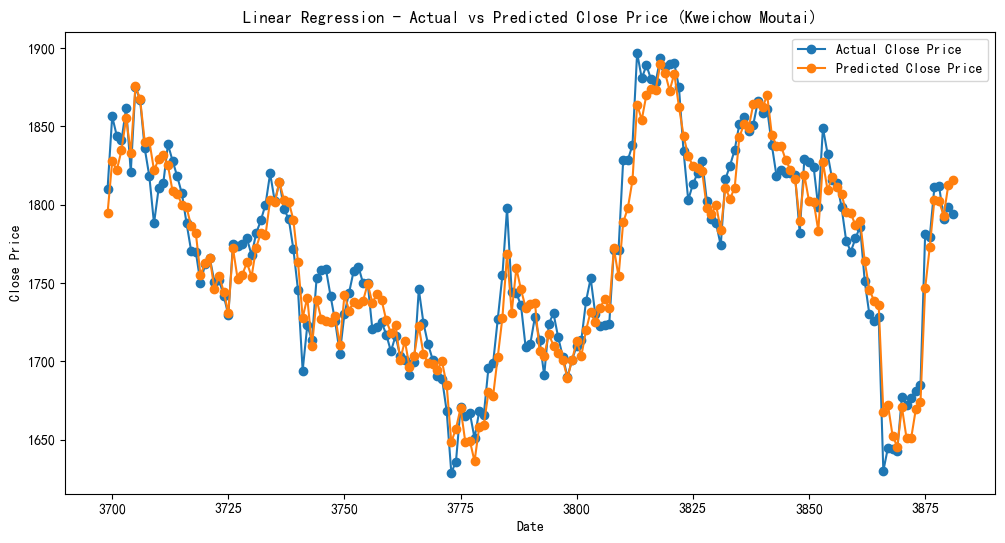

In [52]:
# Build the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_600519[2000:], y_600519[2000:], test_size=0.1, shuffle=False)

# Build a linear regression model
model_600519_daily = LinearRegression()

# Train the model
model_600519_daily.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_600519_daily.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize the prediction results
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Close Price', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted Close Price', marker='o')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Linear Regression - Actual vs Predicted Close Price (Kweichow Moutai)')
plt.legend()
plt.show()

Mean Squared Error: 0.009003095865147137


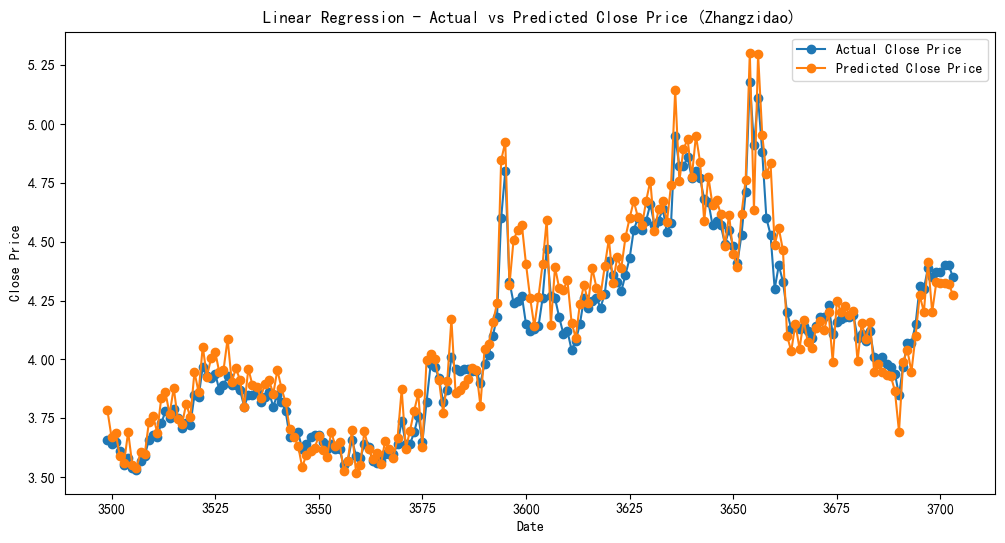

In [53]:
# Build the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_002069[1600:], y_002069[1600:], test_size=0.1, shuffle=False)

# Build a linear regression model
model_002069_daily = LinearRegression()

# Train the model
model_002069_daily.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_002069_daily.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize the prediction results
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Close Price', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted Close Price', marker='o')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Linear Regression - Actual vs Predicted Close Price (Zhangzidao)')
plt.legend()
plt.show()

Mean Squared Error: 146.67914038856338


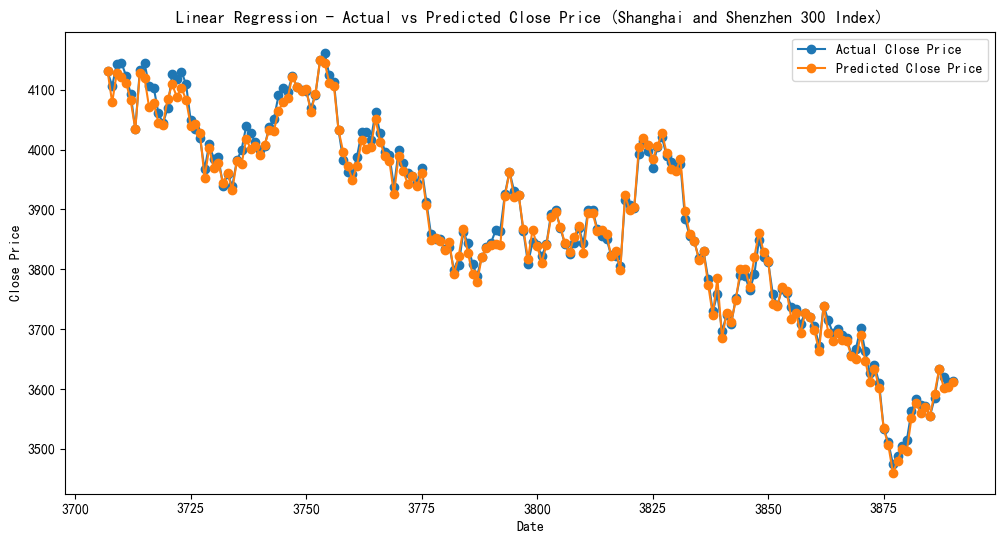

In [54]:
# Build the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_000300[2000:], y_000300[2000:], test_size=0.1, shuffle=False)

# Build a linear regression model
model_000300_daily = LinearRegression()

# Train the model
model_000300_daily.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_000300_daily.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize the prediction results
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Close Price', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted Close Price', marker='o')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Linear Regression - Actual vs Predicted Close Price (Shanghai and Shenzhen 300 Index)')
plt.legend()
plt.show()

In [55]:
def predict_future_stock_prices(initial_df, model, num_days=3):
    """
    Predict future stock prices for the specified number of days.

    Parameters:
    - initial_df: DataFrame, the initial dataset with known information.
    - model: trained machine learning model.
    - num_days: int, the number of future days to predict.

    Returns:
    - predictions_df: DataFrame, the predicted stock prices.
    """

    predictions_df = pd.DataFrame(columns=initial_df.columns)

    for day in range(num_days):
        # Generate features for the next day
        next_day_features,features_for_prediction = generate_next_day_features(initial_df, day)

        # Make prediction using the model
        next_day_price = model.predict([features_for_prediction])

        # Append the predicted values to the dataframe
        next_day_features['trade_date'] += pd.Timedelta(days=1)
        next_day_features['close'] = next_day_price[0]
        predictions_df = predictions_df.append(next_day_features, ignore_index=True)

        # Update initial_df with the newly predicted day's information
        initial_df = initial_df.append(next_day_features, ignore_index=True)

    return predictions_df

def generate_next_day_features(df, day):
    """
    Generate features for the next day based on the available data.

    Parameters:
    - df: DataFrame, the current dataset with known information.
    - day: int, the day for which to generate features.

    Returns:
    - next_day_features: Series, the features for the next day.
    """

    # Copy the last row of the dataframe to get the latest information
    latest_data = df.iloc[-1].copy()
        
    # Update the trade_date for the next day
    latest_data['trade_date'] += pd.Timedelta(days=day)
    
    # Assume future opening, high, and low prices remain the same as the last available values
    latest_data['open'] = df['open'].iloc[-1]
    latest_data['high'] = df['high'].iloc[-1]
    latest_data['low'] = df['low'].iloc[-1]
    latest_data['vol'] = df['vol'].iloc[-1]
    
    # Calculate daily returns
    latest_data['daily_return'] = latest_data['close'] / df['close'].shift(1).iloc[-1] - 1

    # Calculate moving averages
    window_sizes = [7, 14, 21, 30, 60]
    for window_size in window_sizes:
        latest_data[f'{window_size}_day_avg_price'] = df['close'].shift(1).rolling(window=window_size).mean().iloc[-1]
        latest_data[f'{window_size}_day_high'] = df['high'].shift(1).rolling(window=window_size).max().iloc[-1]
        latest_data[f'{window_size}_day_low'] = df['low'].shift(1).rolling(window=window_size).min().iloc[-1]
        latest_data[f'{window_size}_day_avg_volume'] = df['vol'].shift(1).rolling(window=window_size).mean().iloc[-1]
        latest_data[f'price_momentum_{window_size}_days'] = latest_data['close'] / df['close'].shift(window_size).iloc[-1] - 1

    # Calculate RSI indicator
    delta = df['close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.shift(1).rolling(window=14).mean().iloc[-1]
    avg_loss = loss.shift(1).rolling(window=14).mean().iloc[-1]
    rsi = 100 - (100 / (1 + (avg_gain / avg_loss)))
    latest_data['rsi'] = rsi

    # Calculate Bollinger Bands
    window = 20
    latest_data['sma'] = df['close'].shift(1).rolling(window=window).mean().iloc[-1]
    latest_data['std'] = df['close'].shift(1).rolling(window=window).std().iloc[-1]
    latest_data['upper_band'] = latest_data['sma'] + (2 * latest_data['std'])
    latest_data['lower_band'] = latest_data['sma'] - (2 * latest_data['std'])

    # Calculate seasonal features
    latest_data['season'] = latest_data['trade_date'].quarter
    latest_data['weekday'] = latest_data['trade_date'].weekday()
    
    # Build feature vector
    feature_columns = [f'{window_size}_day_avg_price' for window_size in window_sizes] + \
                       [f'{window_size}_day_high' for window_size in window_sizes] + \
                       [f'{window_size}_day_low' for window_size in window_sizes] + \
                       [f'{window_size}_day_avg_volume' for window_size in window_sizes] + \
                       [f'price_momentum_{window_size}_days' for window_size in window_sizes] + \
                       ['daily_return', 'rsi', 'upper_band', 'lower_band', 'season', 'weekday']
    latest_data.dropna(inplace=True)
    feature_vector = latest_data[feature_columns]

    return latest_data, feature_vector


In [56]:
print("茅台：")
initial_df = daily_df_600519_trainset.copy()  # Replace 'your_initial_df' with your actual initial dataset
predicted_df_600519_daily = predict_future_stock_prices(initial_df, model_600519_daily, num_days=5)
print(predicted_df_600519_daily[['trade_date', 'close']])

茅台：
  trade_date        close
0 2023-11-10  1815.688550
1 2023-11-12  1830.838569
2 2023-11-15  1824.088326
3 2023-11-19  1807.187672
4 2023-11-24  1797.509983


In [57]:
print("獐子岛：")
initial_df = daily_df_002069_trainset.copy()  # Replace 'your_initial_df' with your actual initial dataset
predicted_df_002069_daily = predict_future_stock_prices(initial_df, model_002069_daily, num_days=5)
print(predicted_df_002069_daily[['trade_date', 'close']])

獐子岛：
  trade_date     close
0 2023-11-10  4.275831
1 2023-11-12  4.145623
2 2023-11-15  4.047734
3 2023-11-19  4.039153
4 2023-11-24  4.107325


In [58]:
print("沪深300：")
initial_df = daily_df_000300_trainset.copy()  # Replace 'your_initial_df' with your actual initial dataset
predicted_df_000300_daily = predict_future_stock_prices(initial_df, model_000300_daily, num_days=5)
print(predicted_df_000300_daily[['trade_date', 'close']])

沪深300：
  trade_date        close
0 2023-11-10  3612.291336
1 2023-11-12  3612.399641
2 2023-11-15  3619.520757
3 2023-11-19  3623.594787
4 2023-11-24  3615.279754
